In [1]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2
import copy
import random
from vst_function import *
from stattools.resampling import PermutationTest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from pca_plot import *

<h1> GRCh37

In [30]:
anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=1)

data = pd.read_csv("../call_cnvr_grch37/individual_cnv_cnvr.txt", sep='\t')
data.columns = ['Chromosome', 'Start', 'End','CNVR','Sample_ID','CNV_Start', 'CNV_End', 'RD', 'Lenght']
data = data.dropna()#.describe()

cnv = data.pivot_table(index=["Chromosome", "Start", "End"], 
                    columns='Sample_ID', 
                    values='RD').reset_index()
cnv = cnv.fillna(2)
cnv['Chromosome'] = 'chr' + cnv['Chromosome'].astype(str)
cnv['Start'] = cnv['Start'].astype(int)
cnv['End'] = cnv['Start'].astype(int)
#cnv.to_csv('../data/grch37_cnvr_cnv_values.csv', index=False)
#coordinates = cnv.iloc[:,0:3]
#coordinates.to_csv('../data/grch37_cnvr_coordinates.bed', sep='\t', header=False, index=False)
cnv

Sample_ID Chromosome      Start        End  LP6005441-DNA_A01  \
0               chr1     176101     176101                4.0   
1               chr1     449901     449901                0.0   
2               chr1     665601     665601                3.0   
3               chr1     891701     891701                2.0   
4               chr1    1007801    1007801                0.0   
...              ...        ...        ...                ...   
7775            chr9  140136301  140136301                2.0   
7776            chr9  140197201  140197201                2.0   
7777            chr9  140245301  140245301                0.0   
7778            chr9  140387601  140387601                2.0   
7779            chr9  140737201  140737201                2.0   

Sample_ID  LP6005441-DNA_A03  LP6005441-DNA_A04  LP6005441-DNA_A05  \
0                        2.0                2.0                3.0   
1                        1.5                0.0                0.0   
2                        4.0                2.0                2.0   
3                        2.0                2.0                2.0   
4                        2.0                0.0                0.0   
...                      ...                ...                ...   
7775                     2.0                2.0                2.0   
7776                     2.0                2.0                2.0   
7777                     1.0                0.0                0.0   
7778                     2.0                2.0                2.0   
7779                     2.0                2.0                2.0   

Sample_ID  LP6005441-DNA_A06  LP6005441-DNA_A08  LP6005441-DNA_A09  ...  \
0                        3.0           2.333333                3.0  ...   
1                        0.0           0.000000                0.0  ...   
2                        2.0           2.000000                2.0  ...   
3                        2.0           2.000000                2.0  ...   
4                        0.0           0.000000                0.0  ...   
...                      ...                ...                ...  ...   
7775                     2.0           2.000000                2.0  ...   
7776                     2.0           2.000000                2.0  ...   
7777                     1.0           2.000000                0.0  ...   
7778                     2.0           2.000000                2.0  ...   
7779                     2.0           2.000000                2.0  ...   

Sample_ID  SS6004471  SS6004472  SS6004473  SS6004474  SS6004475  SS6004476  \
0                3.0        1.0        3.0   1.000000   2.666667        4.0   
1                0.0        0.0        0.0   0.000000   0.000000        0.0   
2                4.0        3.0        4.5   3.333333   3.666667        3.0   
3                0.0        0.0        2.0   2.000000   2.000000        0.0   
4                0.0        0.0        0.0   0.000000   0.000000        0.0   
...              ...        ...        ...        ...        ...        ...   
7775             2.0        2.0        2.0   2.000000   2.000000        2.0   
7776             3.0        2.0        2.0   2.000000   2.000000        2.0   
7777             2.0        0.0        2.0   1.000000   1.000000        0.0   
7778             2.5        4.0        2.0   4.000000   2.000000        4.0   
7779             2.0        2.0        2.0   2.000000   2.000000        2.0   

Sample_ID  SS6004477  SS6004478  SS6004479  SS6004480  
0           1.666667        2.0        3.0        3.0  
1           0.000000        0.0        0.0        0.0  
2           4.000000        4.5        2.0        2.0  
3           2.000000        0.0        0.0        0.0  
4           2.000000        2.0        0.0        2.0  
...              ...        ...        ...        ...  
7775        2.000000        2.0        2.0        2.0  
7776        2.000000        2.0        2.0        2.0  
7777        2.000000    

In [31]:
data_grch37 = cnv.iloc[:,4:284]
data_grch37 = data_grch37.T
data_grch37 = data_grch37.fillna(2)

features = anotation.loc[:,["7-Gender","10-Region", "11-Country",]]
data_grch37 = features.merge(data_grch37, left_index=True, right_index=True)
data_grch37

7-Gender    10-Region   11-Country         0    1    2    3  \
LP6005443-DNA_B06        F  WestEurasia      Iceland  1.500000  0.0  2.0  2.0   
LP6005442-DNA_D08        F  WestEurasia      Iceland  3.333333  0.0  2.0  2.0   
LP6005441-DNA_D07        F    SouthAsia     Pakistan  2.000000  0.0  2.0  2.0   
LP6005441-DNA_C07        M    SouthAsia     Pakistan  3.000000  0.0  2.0  2.0   
LP6005442-DNA_G11        M       Africa  SierraLeone  3.333333  0.0  2.0  2.0   
...                    ...          ...          ...       ...  ...  ...  ...   
LP6005441-DNA_H10        F  WestEurasia       Russia  2.000000  0.0  2.0  2.0   
LP6005519-DNA_A06        M     EastAsia      Myanmar  2.000000  0.0  2.0  2.0   
LP6005519-DNA_B06        M     EastAsia      Myanmar  2.000000  0.0  2.0  2.0   
LP6005441-DNA_B08        F       Africa        Congo  2.666667  0.0  2.0  2.0   
LP6005592-DNA_G01        M  WestEurasia        Yemen  3.000000  0.0  2.0  2.0   

                     4    5    6  ...  7770  7771  7772  7773  7774  7775  \
LP6005443-DNA_B06  0.0  2.0  2.0  ...   2.0   0.0   2.0   2.0   2.0   2.0   
LP6005442-DNA_D08  2.0  2.0  2.0  ...   2.0   0.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_D07  2.0  2.0  2.0  ...   2.0   0.0   2.0   2.0   2.0   2.0   
LP6005441-DNA_C07  0.0  2.0  2.0  ...   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005442-DNA_G11  2.0  2.0  2.0  ...   2.0   0.0   2.0   2.0   2.0   2.0   
...                ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
LP6005441-DNA_H10  0.0  2.0  2.0  ...   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005519-DNA_A06  1.0  2.0  2.0  ...   2.0   0.0   2.0   2.0   2.0   2.0   
LP6005519-DNA_B06  0.0  2.0  2.0  ...   2.0   0.0   2.0   2.0   2.0   1.0   
LP6005441-DNA_B08  0.0  2.0  2.0  ...   2.0   2.0   2.0   2.0   2.0   2.0   
LP6005592-DNA_G01  0.0  2.0  2.0  ...   2.0   2.0   2.0   2.0   2.0   2.0   

                   7776  7777  7778  7779  
LP6005443-DNA_B06   2.0   0.0   2.0   2.0  
LP6005442-DNA_D08   2.0   1.0   2.0   2.0  
LP6005441-DNA_D07   2.0   1.0   2.0   2.0  
LP6005441-DNA_C07   2.0   0.0   2.0   2.0  
LP6005442-DNA_G11   2.0   1.0   0.0   2.0  
...                 ...   ...   ...   ...  
LP6005441-DNA_H10   2.0   0.0   2.0   2.0  
LP6005519-DNA_A06   2.0   0.0   2.0   2.0  
LP6005519-DNA_B06   2.0   0.0   2.0   2.0  
LP6005441-DNA_B08   2.0   2.0   2.0   2.0  
LP6005592-DNA_G01   2.0   0.0   2.0   3.0  

[275 rows x 7783 columns]

<h2> PCA

In [45]:
data_grch37_deletions = data_grch37[(data_grch37[data_grch37.columns[1:]]<3).all(axis=1)]
counts = data_grch37_deletions.T
counts = counts.sort_index()
counts = counts.fillna(2)
counts = counts.sort_index()
counts

28    29        38    43    66    169   170   171   202   \
LP6005441-DNA_A03   2.0   2.0  0.250000   0.0   0.0   2.0   2.0   1.0   0.0   
LP6005441-DNA_A04   2.0   2.0  0.666667   0.0   2.0   0.0   0.0   2.0   0.0   
LP6005441-DNA_A05   2.0   2.0  0.666667   0.0   0.0   2.0   2.0   2.0   0.0   
LP6005441-DNA_A06   2.0   2.0  0.666667   2.0   2.0   2.0   2.0   2.0   0.0   
LP6005441-DNA_A08   2.0   2.0  0.000000   0.0   2.0   2.0   2.0   2.0   2.0   
...                 ...   ...       ...   ...   ...   ...   ...   ...   ...   
SS6004476           0.0   2.0  0.666667   0.0   2.0   1.0   2.0   2.0   0.0   
SS6004477           2.0   2.0  0.333333   0.0   2.0   2.0   2.0   0.0   0.0   
SS6004478           2.0   2.0  0.500000   0.0   0.0   2.0   2.0   2.0   0.0   
SS6004479           0.0   2.0  0.666667   2.0   2.0   1.0   2.0   2.0   0.0   
SS6004480           2.0   2.0  0.666667   2.0   2.0   2.0   2.0   2.0   0.0   

                   228   ...  7556  7603  7612      7645      7647  7653  \
LP6005441-DNA_A03   1.0  ...   0.0   0.0   2.0  1.500000  0.900000   0.0   
LP6005441-DNA_A04   1.0  ...   2.0   0.0   0.0  0.000000  0.825000   0.0   
LP6005441-DNA_A05   2.0  ...   0.0   2.0   0.0  0.000000  1.086957   0.0   
LP6005441-DNA_A06   1.0  ...   2.0   0.0   2.0  0.800000  1.052632   1.0   
LP6005441-DNA_A08   1.0  ...   2.0   2.0   2.0  1.500000  1.102564   2.0   
...                 ...  ...   ...   ...   ...       ...       ...   ...   
SS6004476           0.0  ...   2.0   0.0   2.0  0.000000  0.593750   0.0   
SS6004477           2.0  ...   2.0   0.0   1.0  1.500000  0.750000   0.0   
SS6004478           2.0  ...   2.0   0.0   2.0  1.714286  1.333333   0.0   
SS6004479           1.0  ...   2.0   0.0   2.0  0.000000  1.454545   0.0   
SS6004480           2.0  ...   2.0   1.0   2.0  1.500000  1.218750   1.0   

                   7752  7753  7758  7765  
LP6005441-DNA_A03   2.0   2.0   2.0   2.0  
LP6005441-DNA_A04   2.0   1.0   0.0   2.0  
LP6005441-DNA_A05   2.0   1.0   1.0   0.0  
LP6005441-DNA_A06   1.0   2.0   0.0   2.0  
LP6005441-DNA_A08   2.0   2.0   0.0   2.0  
...                 ...   ...   ...   ...  
SS6004476           2.0   0.0   0.0   2.0  
SS6004477           2.0   2.0   2.0   2.0  
SS6004478           2.0   2.0   0.0   2.0  
SS6004479           1.0   1.0   2.0   0.0  
SS6004480           2.0   2.0   0.0   1.0  

[275 rows x 369 columns]

In [46]:
features = anotation.merge(counts, left_index=True, right_index=True)
features = features.loc[:,["7-Gender","10-Region", "11-Country",]]
features = features.sort_index()

In [47]:
pca = PCA(n_components=10)
pca_results = pca.fit_transform(counts)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3', 'component_4',
                                  'component_5',
                                  'component_6',
                                  'component_7',
                                  'component_8',
                                  'component_9',
                                   'component_10'
                                  ],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)
df_pca

7-Gender    10-Region      11-Country  component_1  \
LP6005441-DNA_A03        F      Oceania  PapuaNewGuinea    -0.709493   
LP6005441-DNA_A04        F      America        Colombia    -4.139471   
LP6005441-DNA_A05        M  WestEurasia          France    -0.108159   
LP6005441-DNA_A06        M  WestEurasia  Italy(Bergamo)     0.288656   
LP6005441-DNA_A08        M       Africa           Congo     9.418528   
...                    ...          ...             ...          ...   
SS6004476                M      America          Brazil    -3.505509   
SS6004477                M      Oceania       Australia     1.065919   
SS6004478                U      Oceania       Australia    -0.925270   
SS6004479                F      America          Mexico    -3.992794   
SS6004480                M       Africa           Sudan     7.798048   

                   component_2  component_3  component_4  component_5  \
LP6005441-DNA_A03    -4.616401    -3.311394    -0.569939     0.434756   
LP6005441-DNA_A04    -0.249102     4.890480     5.525340     1.371976   
LP6005441-DNA_A05     3.658278    -0.835052     0.883131     1.154754   
LP6005441-DNA_A06     3.296369    -1.629714     0.121800     0.053397   
LP6005441-DNA_A08    -1.873549     2.430562    -0.451640    -0.814993   
...                        ...          ...          ...          ...   
SS6004476             0.153816     4.605054     6.713358     2.116984   
SS6004477            -6.576702    -5.682091     2.226551     0.844924   
SS6004478            -5.736379    -4.360503     2.735894     1.060929   
SS6004479            -0.324264     4.696945     5.611069    -1.697205   
SS6004480            -1.485604     1.394877    -0.590412    -2.126363   

                   component_6  component_7  component_8  component_9  \
LP6005441-DNA_A03     1.627845     1.737256     0.474632    -0.056478   
LP6005441-DNA_A04    -0.092969     0.034040     0.904217    -1.669635   
LP6005441-DNA_A05    -0.461840    -0.773069     1.193787    -0.212266   
LP6005441-DNA_A06     1.432477    -1.224773     1.975189    -0.383991   
LP6005441-DNA_A08    -1.238271     1.075836     0.981076     1.172580   
...                        ...          ...          ...          ...   
SS6004476            -0.374658     0.135466     0.640416    -0.284239   
SS6004477            -0.594230    -0.161847     0.824170     0.755519   
SS6004478            -0.157256     0.991212    -0.203526     0.630773   
SS6004479             0.212462     0.360907     1.732323    -0.549953   
SS6004480             0.674667     0.525536    -2.293647     1.173857   

                   component_10  
LP6005441-DNA_A03      2.761442  
LP6005441-DNA_A04      1.077286  
LP6005441-DNA_A05      0.525787  
LP6005441-DNA_A06     -1.349778  
LP6005441-DNA_A08      0.763069  
...                         ...  
SS6004476              1.105981  
SS6004477              2.073743  
SS6004478              1.649485  
SS6004479              0.781341  
SS6004480             -1.257926  

[275 rows x 13 columns]

            7-Gender      11-Country  component_1  component_2  component_3  \
10-Region                                                                     
Oceania            F  PapuaNewGuinea    -0.709493    -4.616401    -3.311394   
America            F        Colombia    -4.139471    -0.249102     4.890480   
WestEurasia        M          France    -0.108159     3.658278    -0.835052   
WestEurasia        M  Italy(Bergamo)     0.288656     3.296369    -1.629714   
Africa             M           Congo     9.418528    -1.873549     2.430562   
...              ...             ...          ...          ...          ...   
America            M          Brazil    -3.505509     0.153816     4.605054   
Oceania            M       Australia     1.065919    -6.576702    -5.682091   
Oceania            U       Australia    -0.925270    -5.736379    -4.360503   
America            F          Mexico    -3.992794    -0.324264     4.696945   
Africa             M           Sudan     7.798048   

/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot.py:85: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot.py:102: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot.py:85: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_

            7-Gender      11-Country  component_1  component_2  component_3  \
10-Region                                                                     
Oceania            F  PapuaNewGuinea    -0.709493    -4.616401    -3.311394   
America            F        Colombia    -4.139471    -0.249102     4.890480   
WestEurasia        M          France    -0.108159     3.658278    -0.835052   
WestEurasia        M  Italy(Bergamo)     0.288656     3.296369    -1.629714   
Africa             M           Congo     9.418528    -1.873549     2.430562   
...              ...             ...          ...          ...          ...   
America            M          Brazil    -3.505509     0.153816     4.605054   
Oceania            M       Australia     1.065919    -6.576702    -5.682091   
Oceania            U       Australia    -0.925270    -5.736379    -4.360503   
America            F          Mexico    -3.992794    -0.324264     4.696945   
Africa             M           Sudan     7.798048   

/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot.py:85: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot.py:102: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/pca_plot.py:85: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/Users/luciabazan/Documents/GitHub/cnv_

            7-Gender      11-Country  component_1  component_2  component_3  \
10-Region                                                                     
Oceania            F  PapuaNewGuinea    -0.709493    -4.616401    -3.311394   
America            F        Colombia    -4.139471    -0.249102     4.890480   
WestEurasia        M          France    -0.108159     3.658278    -0.835052   
WestEurasia        M  Italy(Bergamo)     0.288656     3.296369    -1.629714   
Africa             M           Congo     9.418528    -1.873549     2.430562   
...              ...             ...          ...          ...          ...   
America            M          Brazil    -3.505509     0.153816     4.605054   
Oceania            M       Australia     1.065919    -6.576702    -5.682091   
Oceania            U       Australia    -0.925270    -5.736379    -4.360503   
America            F          Mexico    -3.992794    -0.324264     4.696945   
Africa             M           Sudan     7.798048   

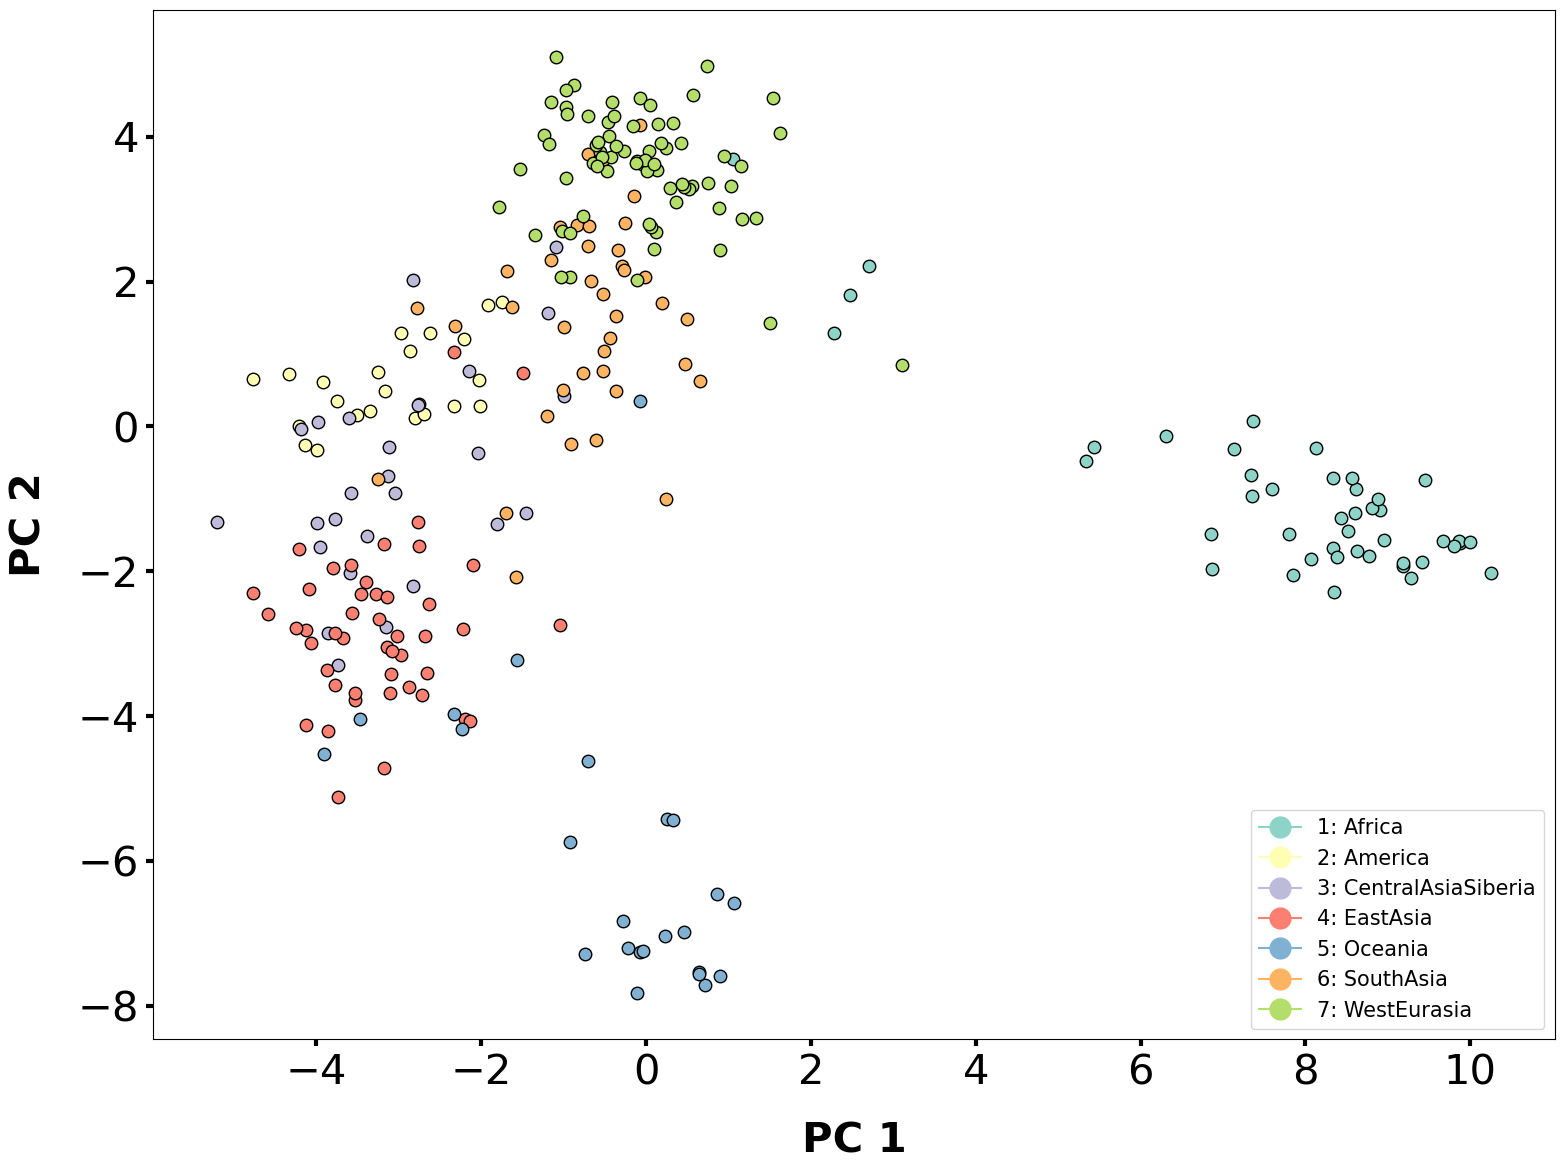

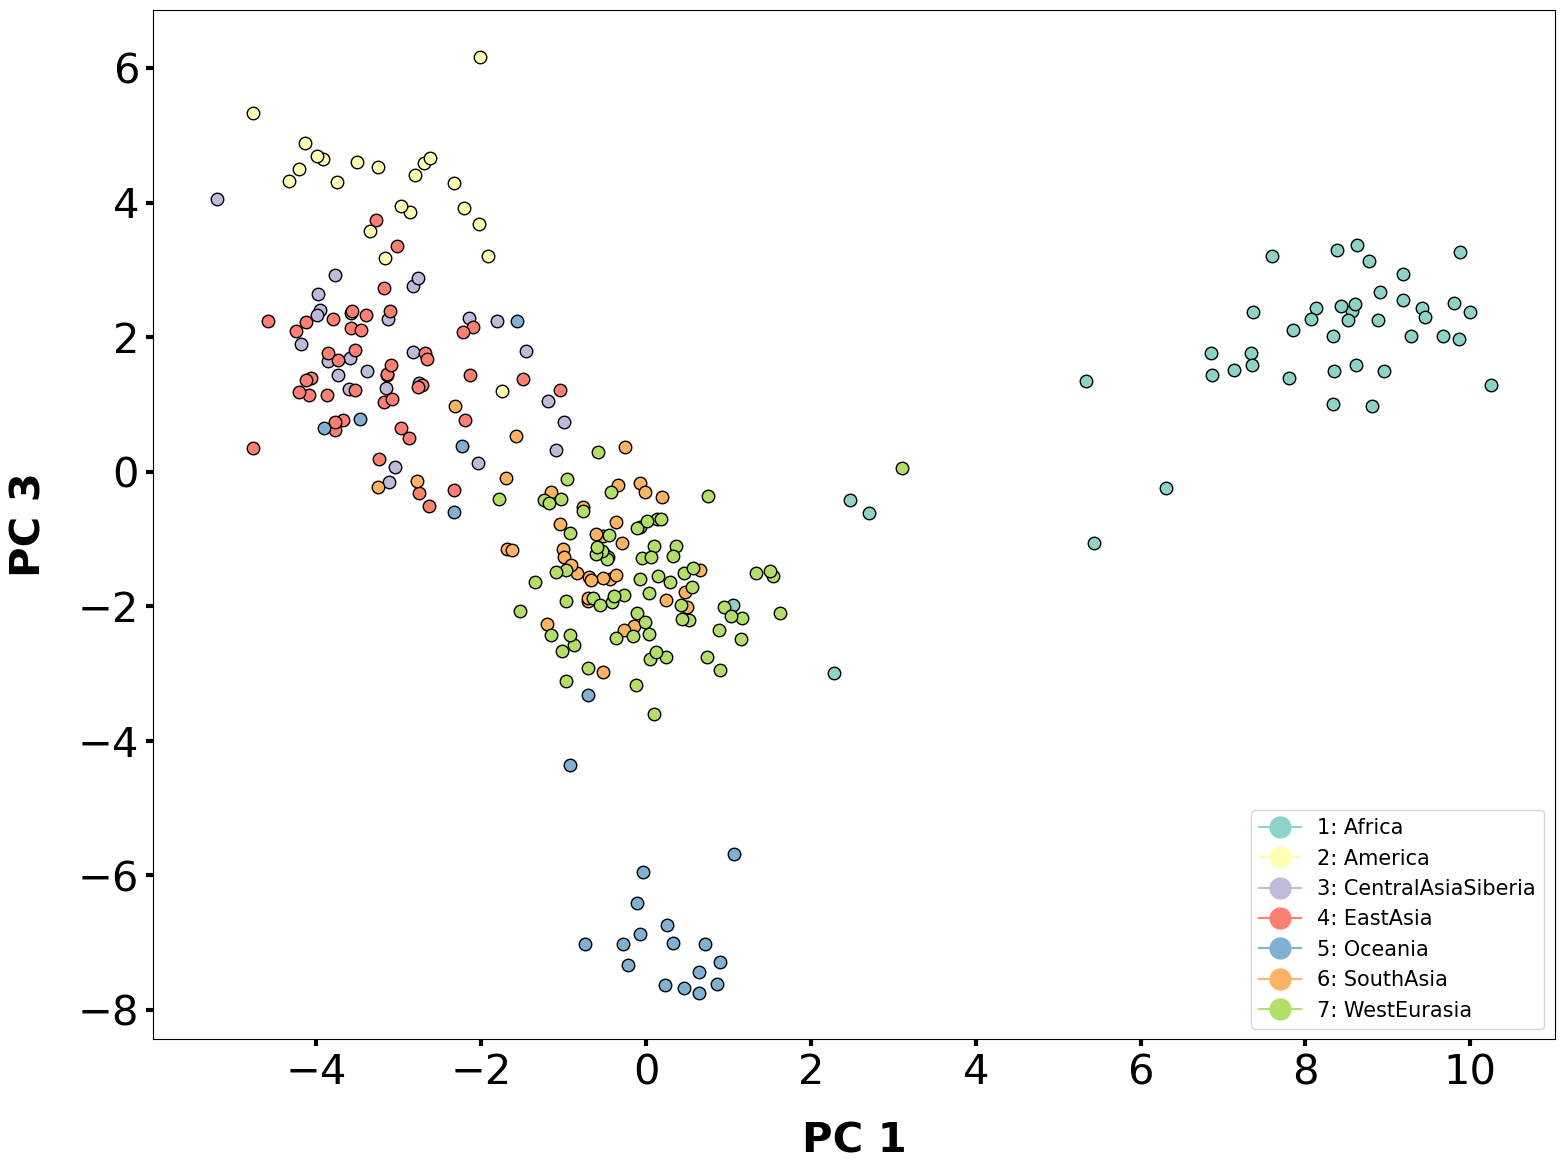

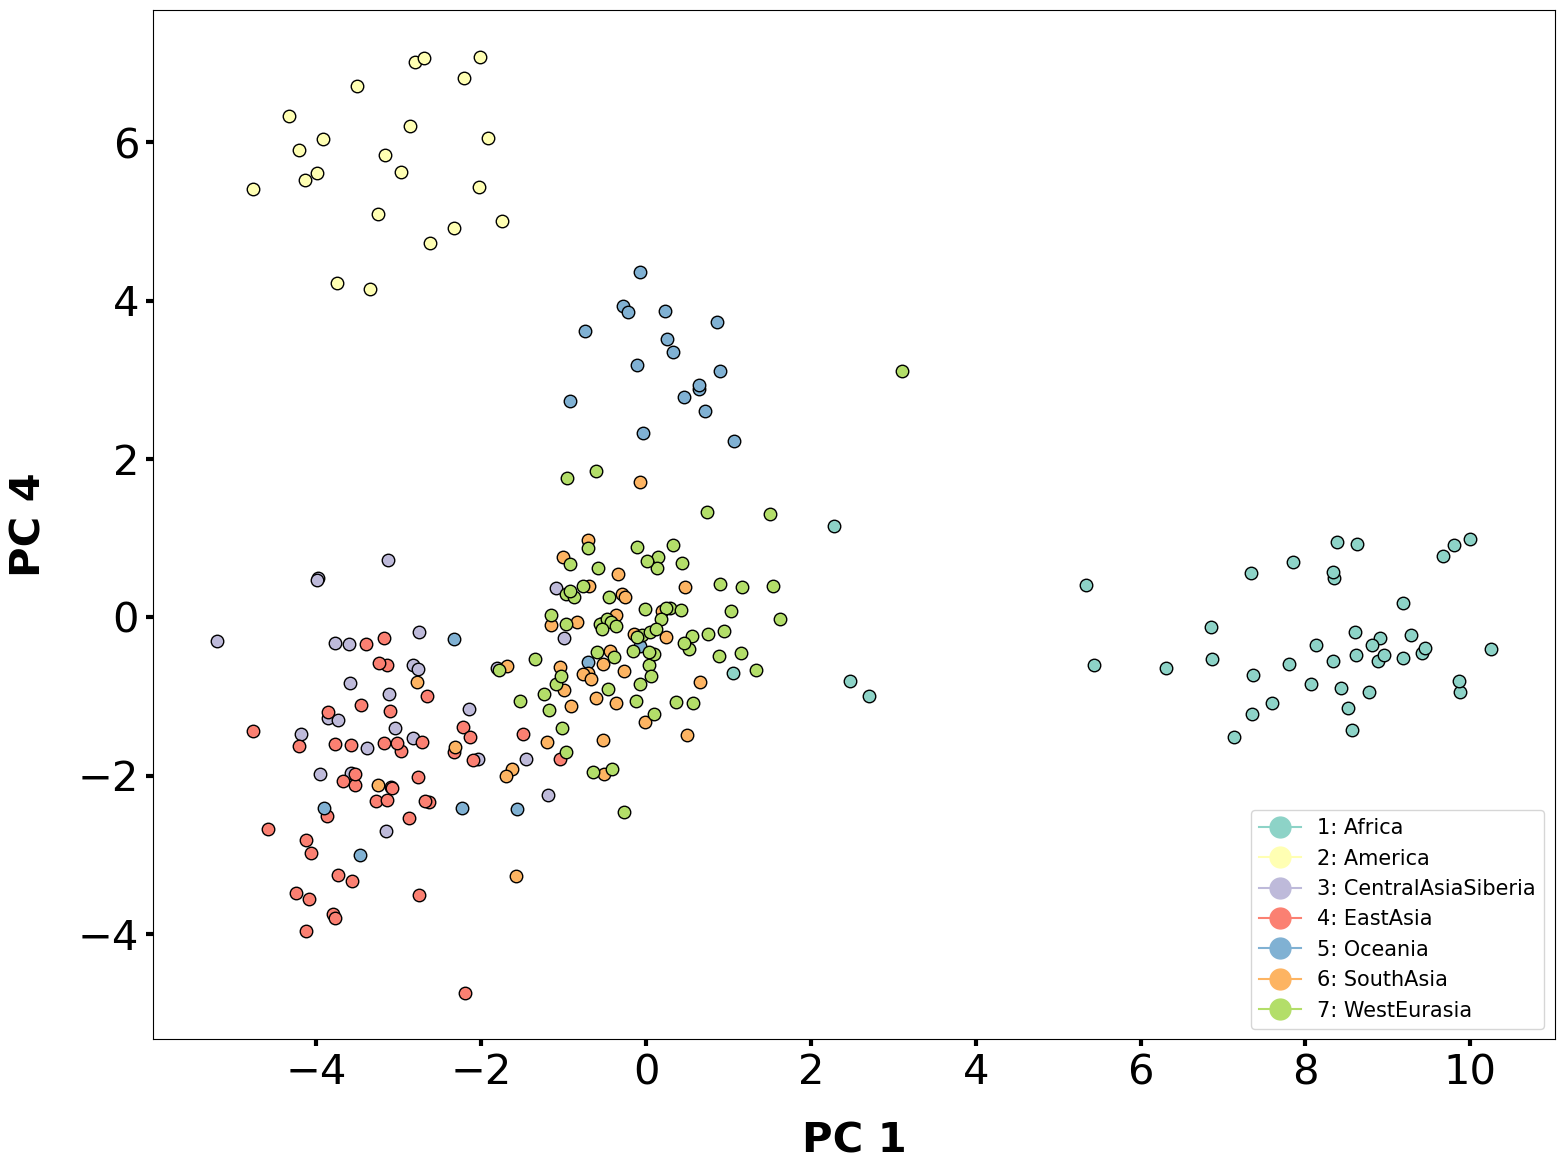

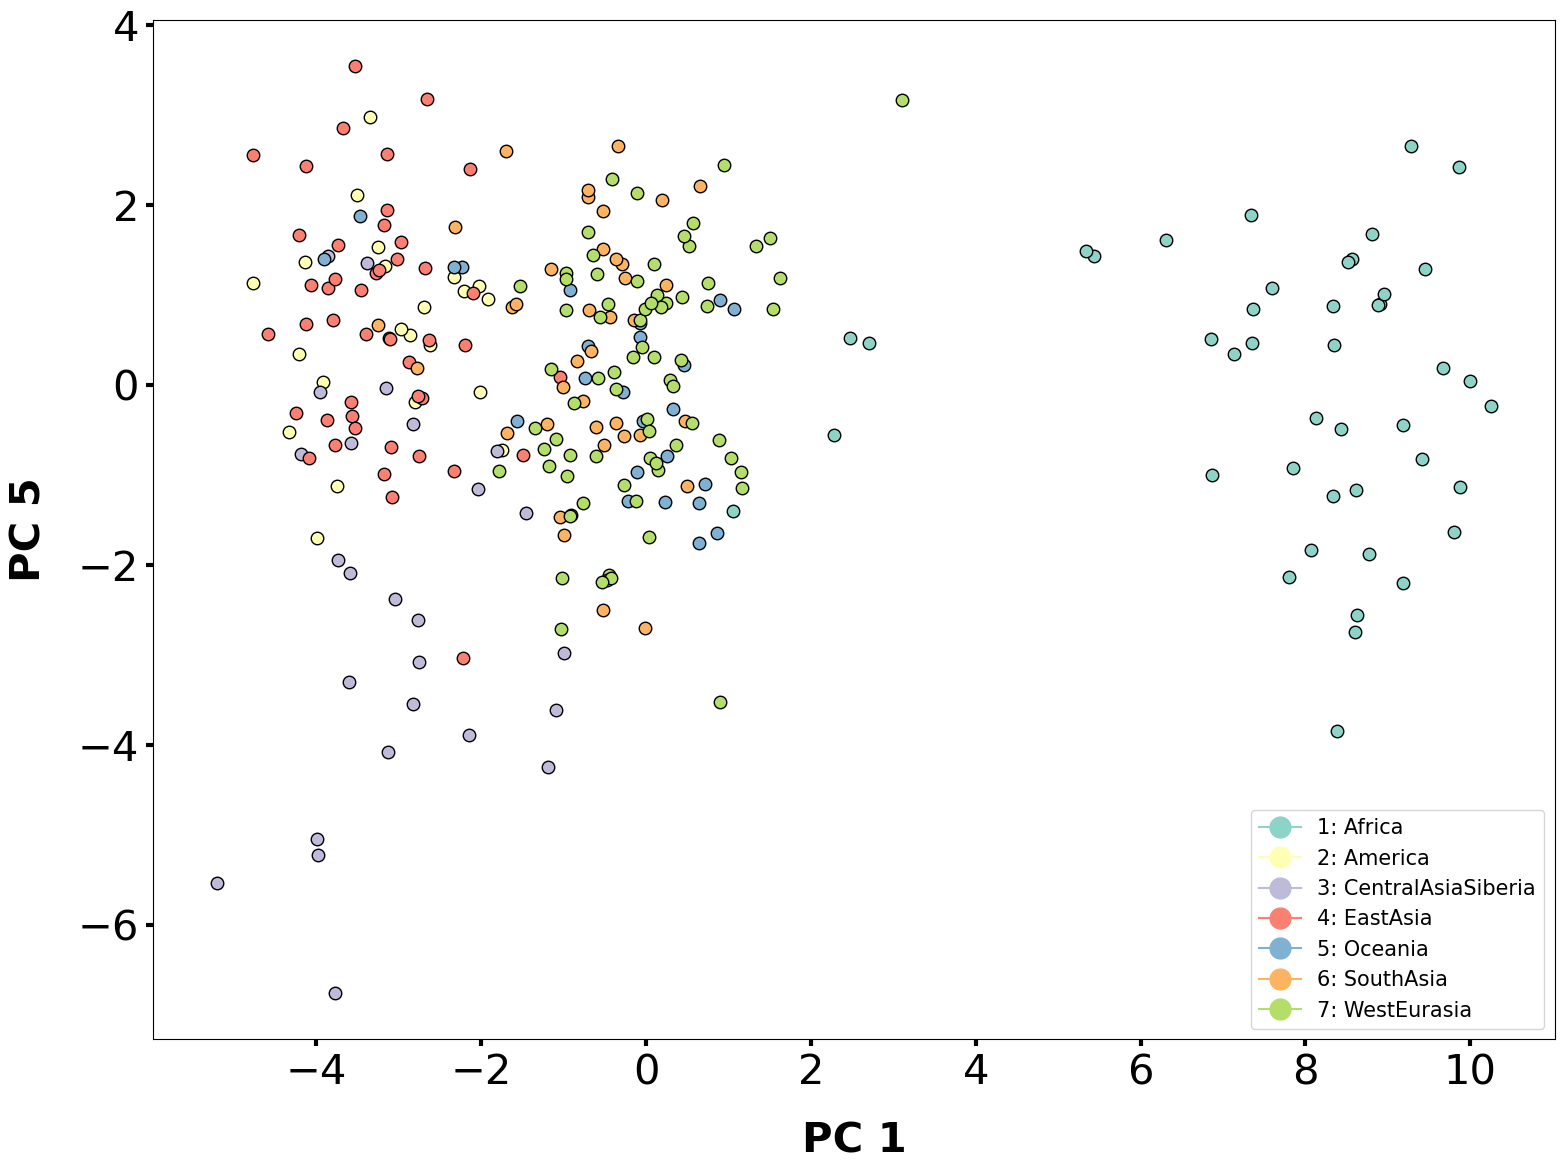

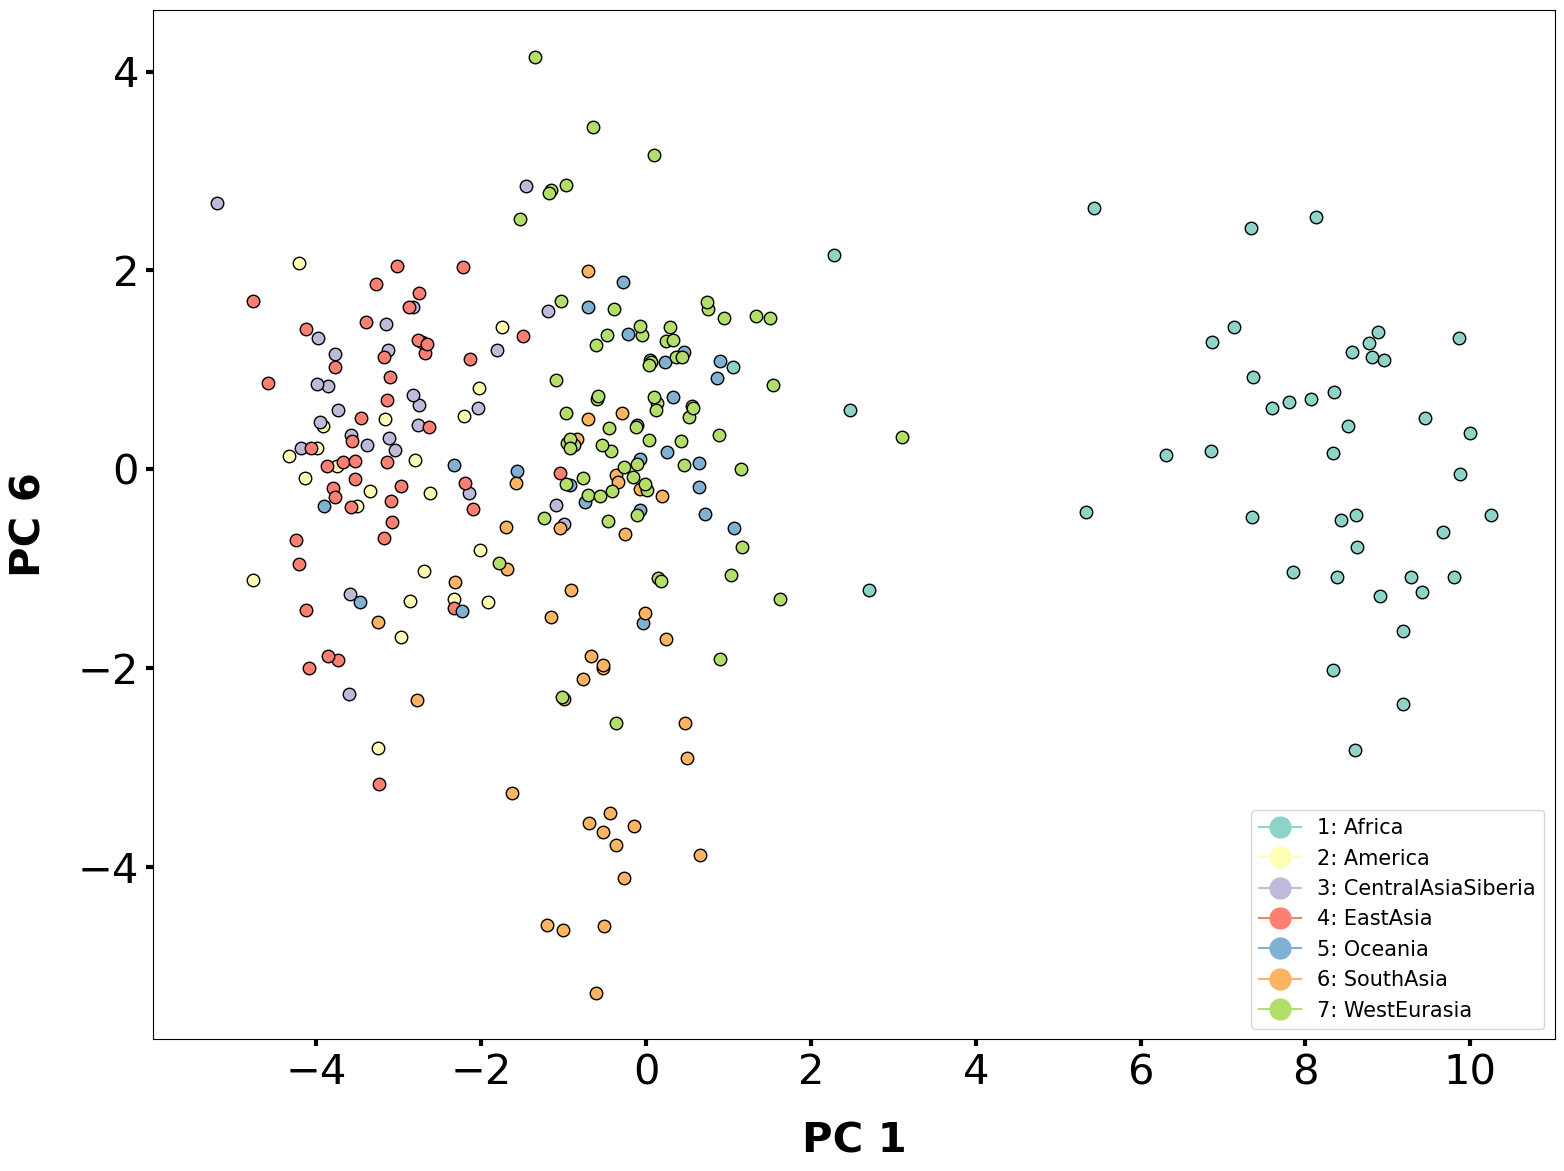

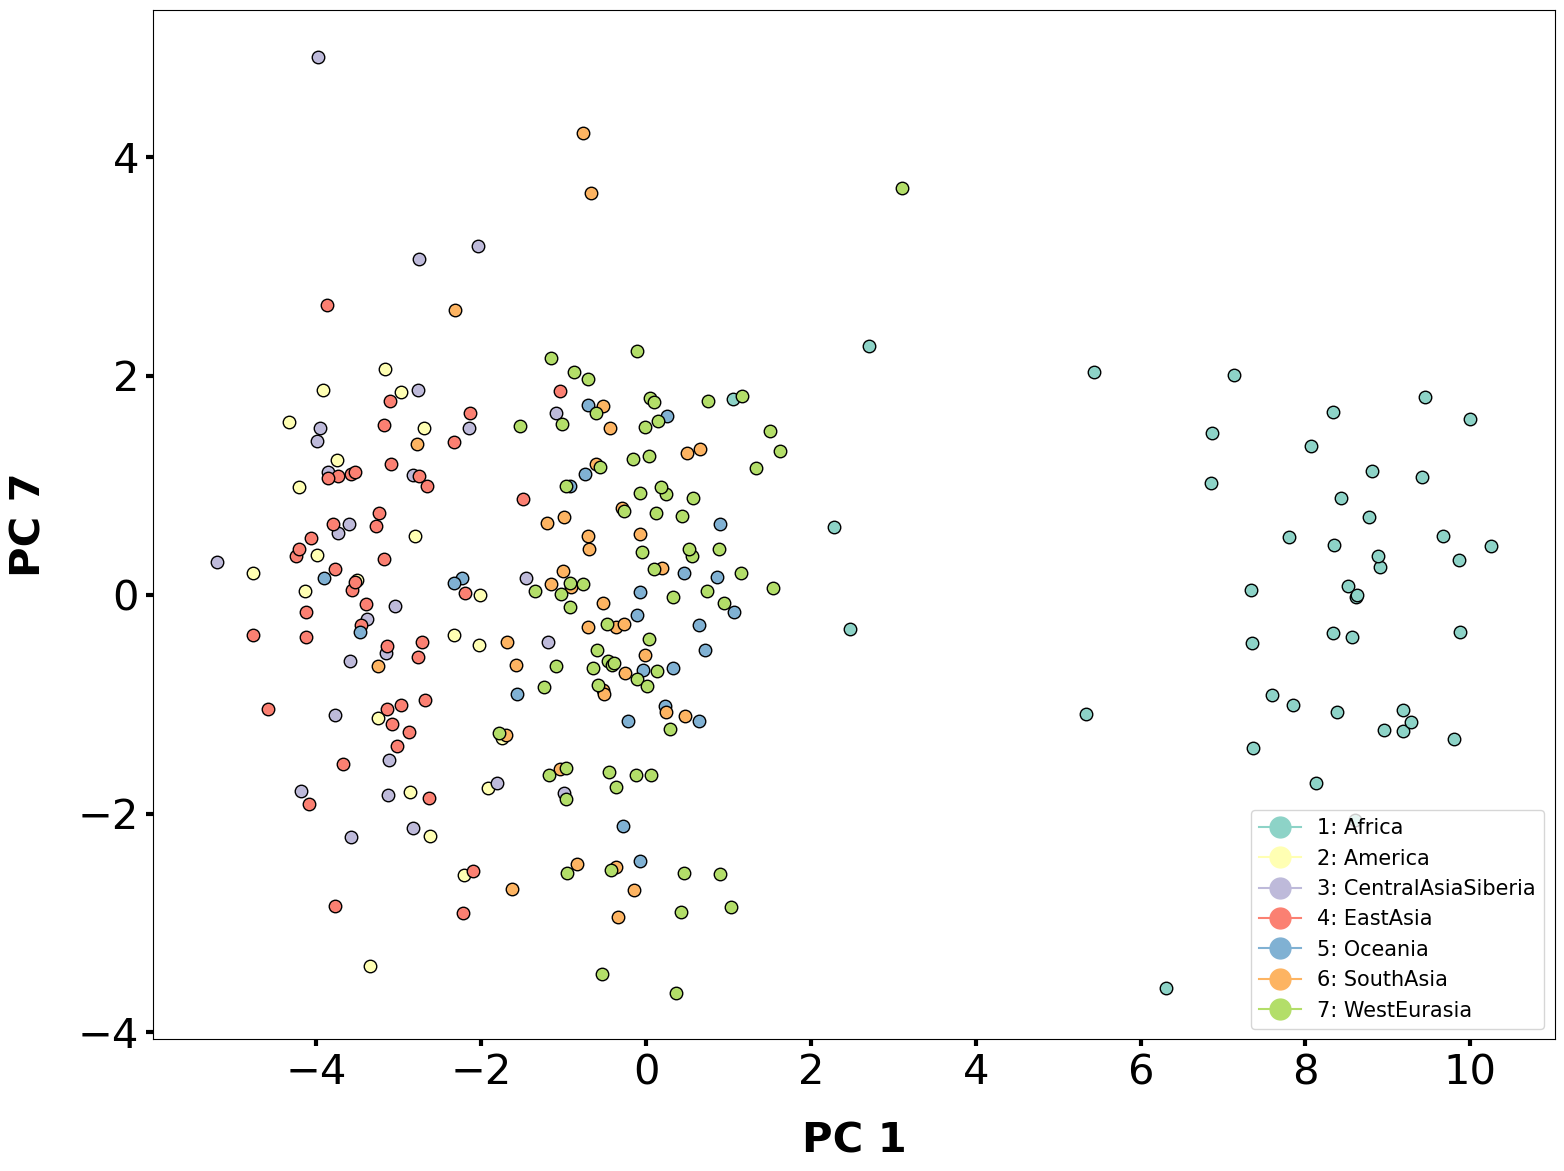

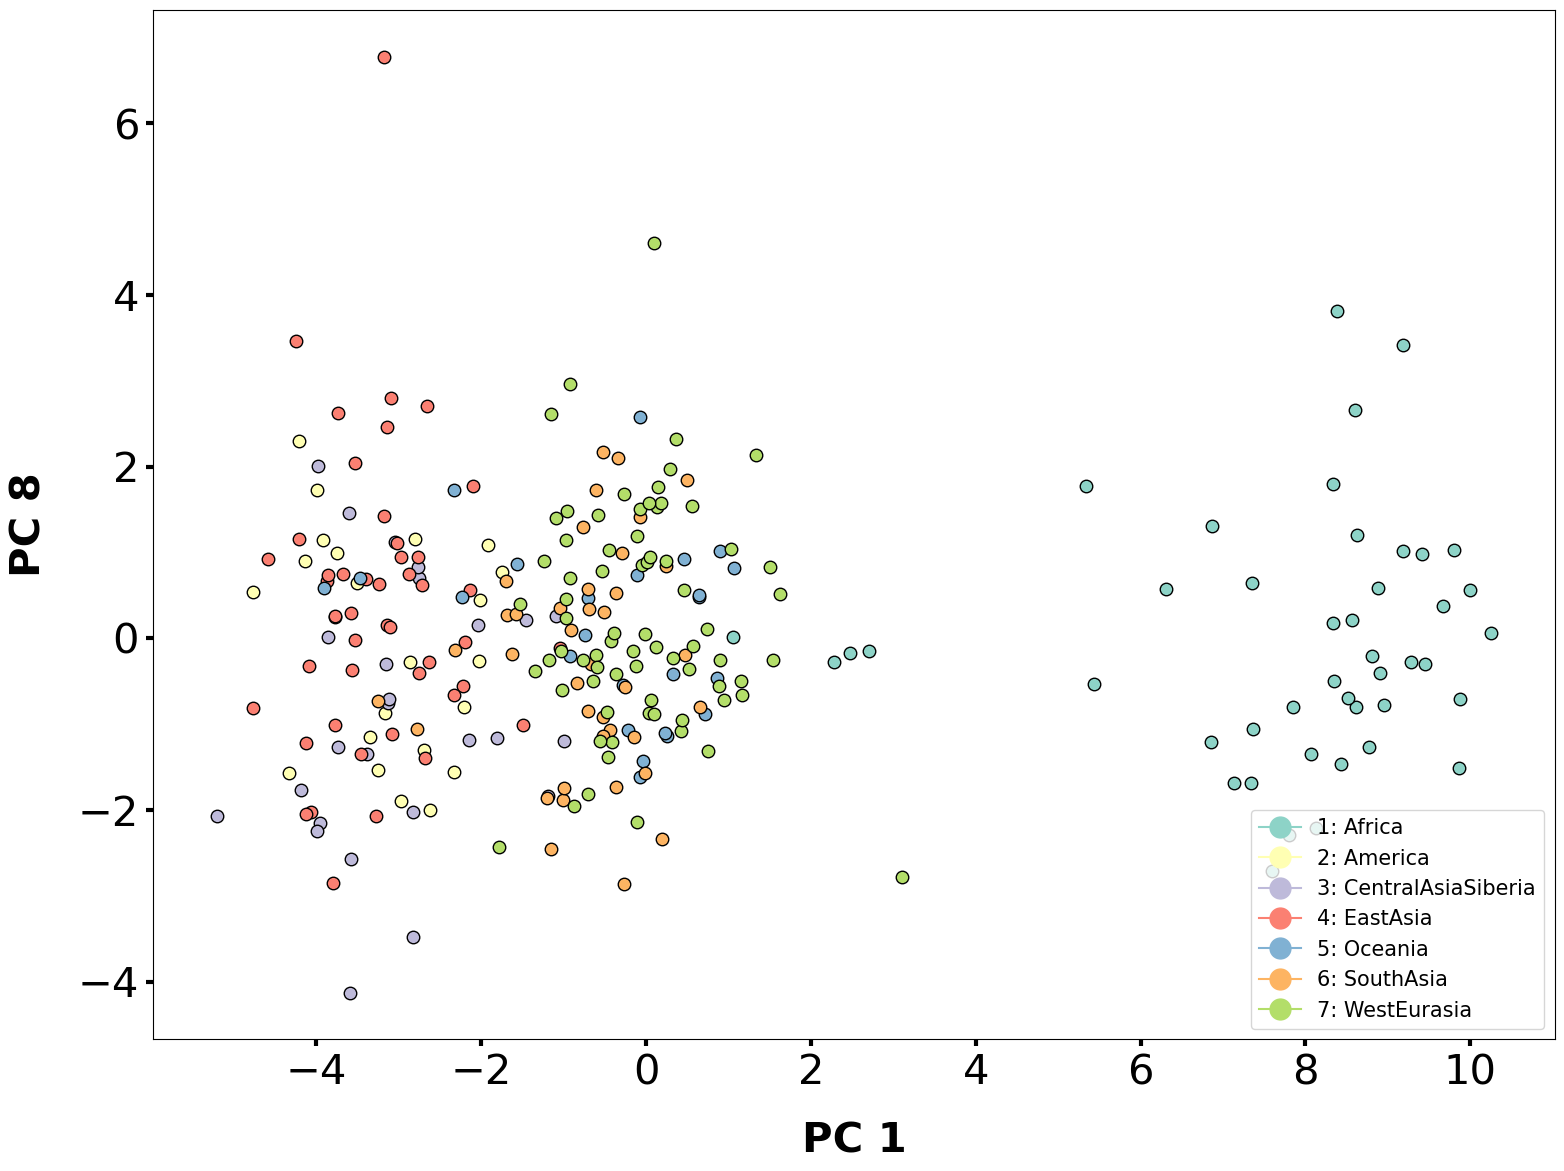

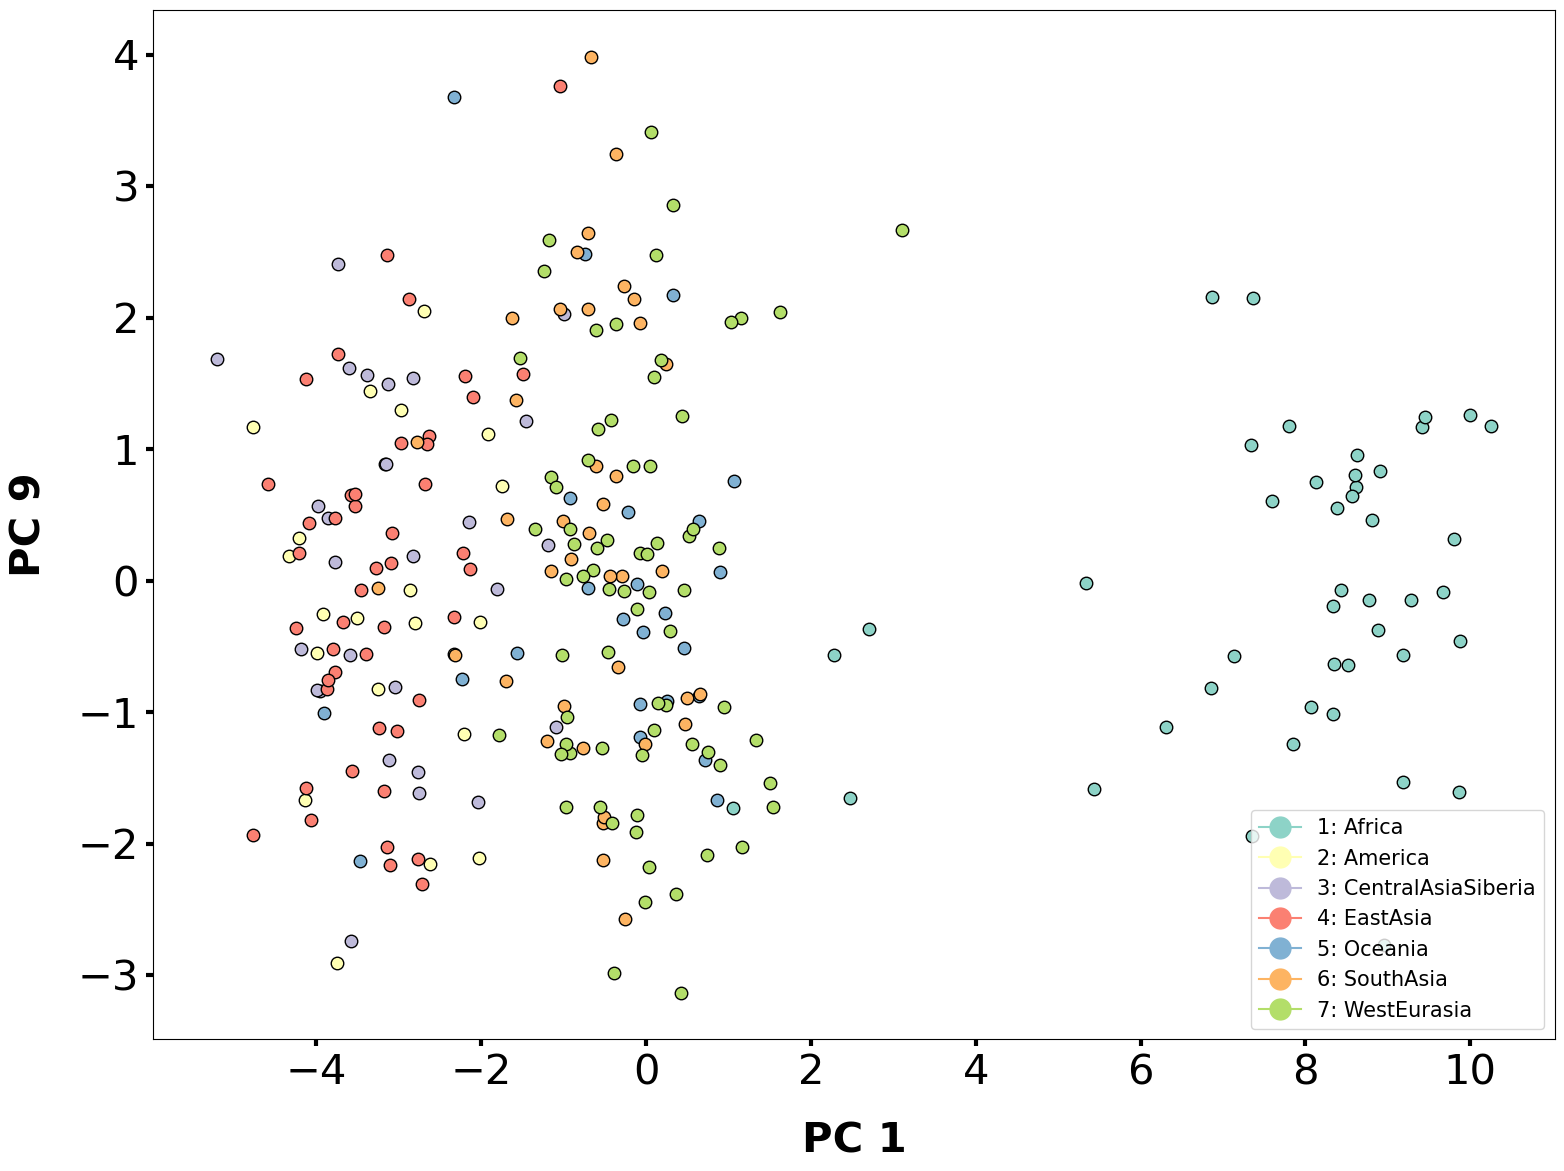

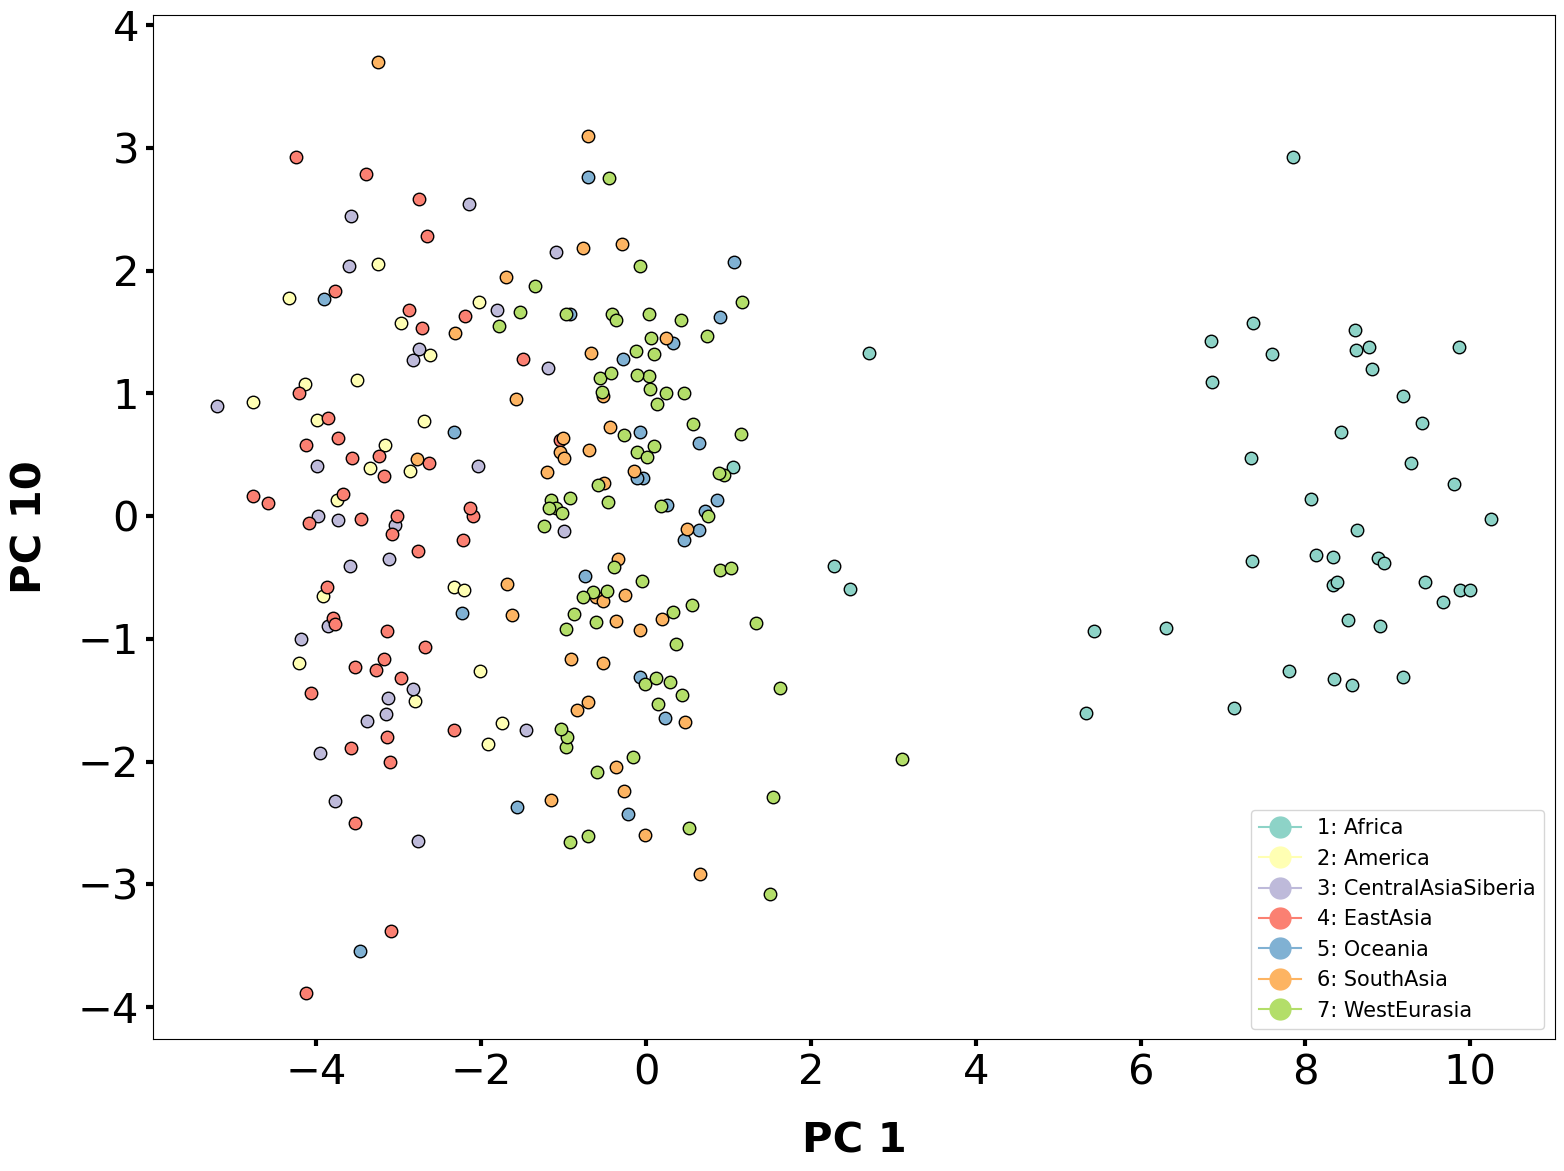

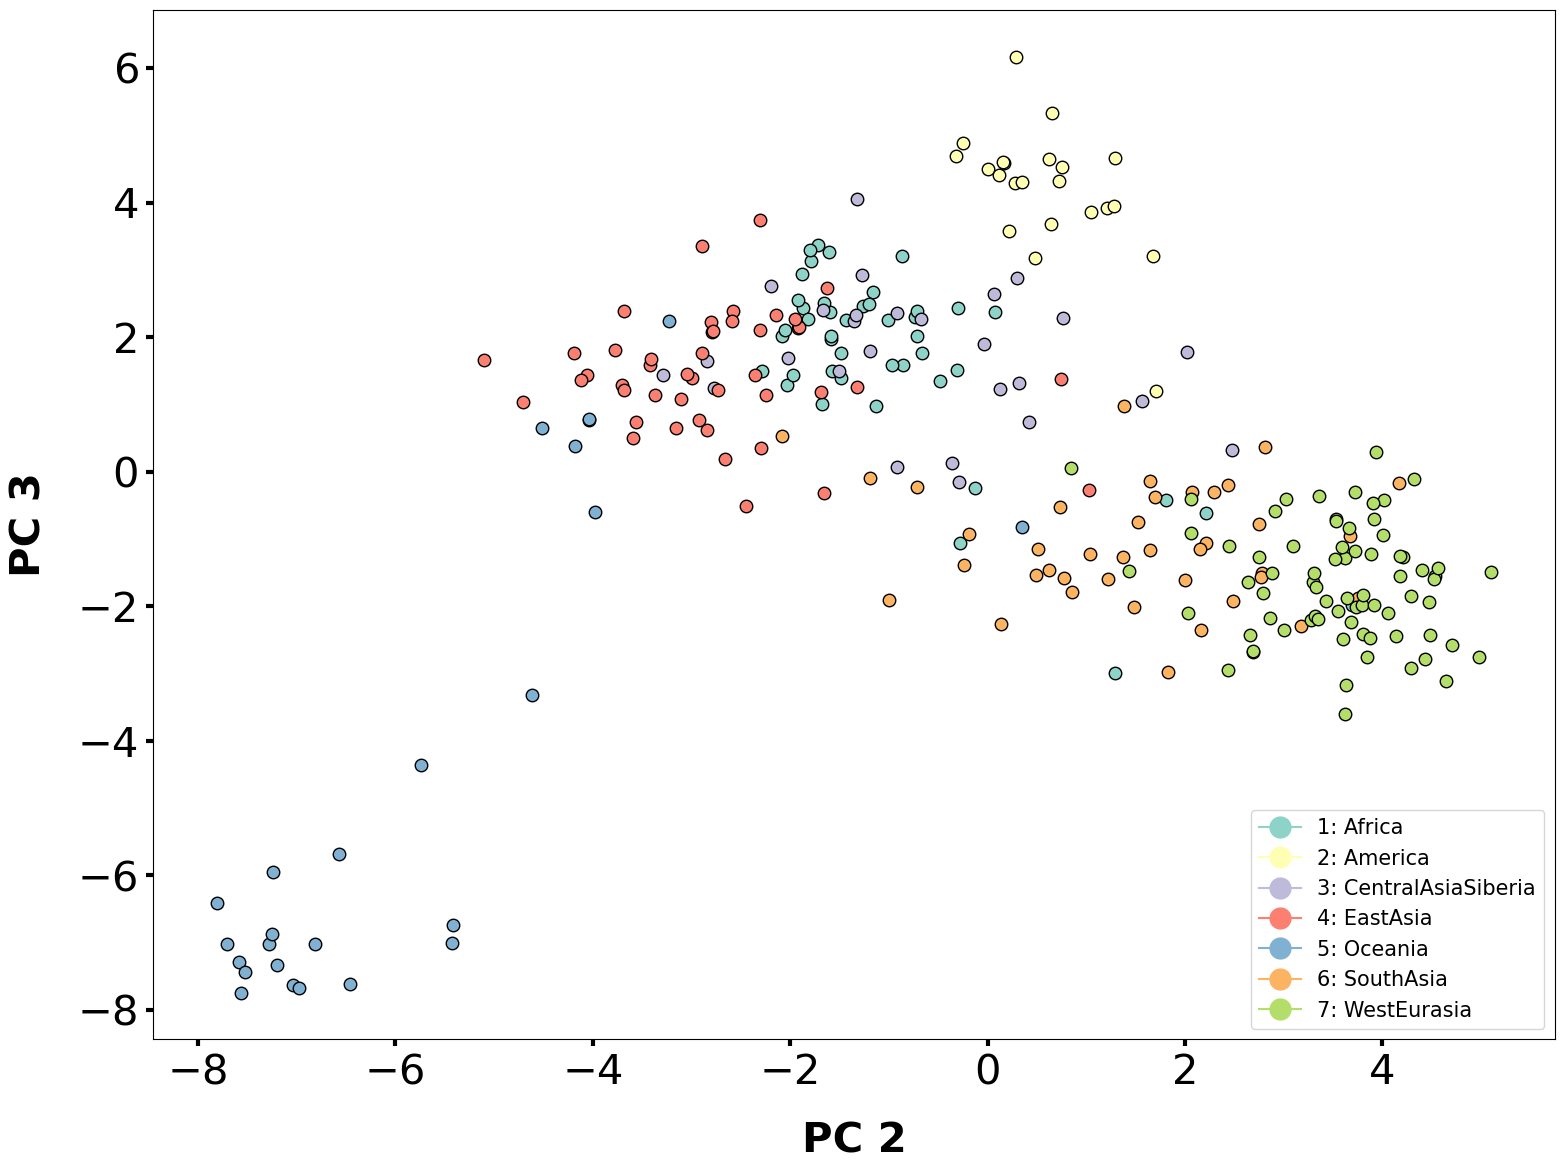

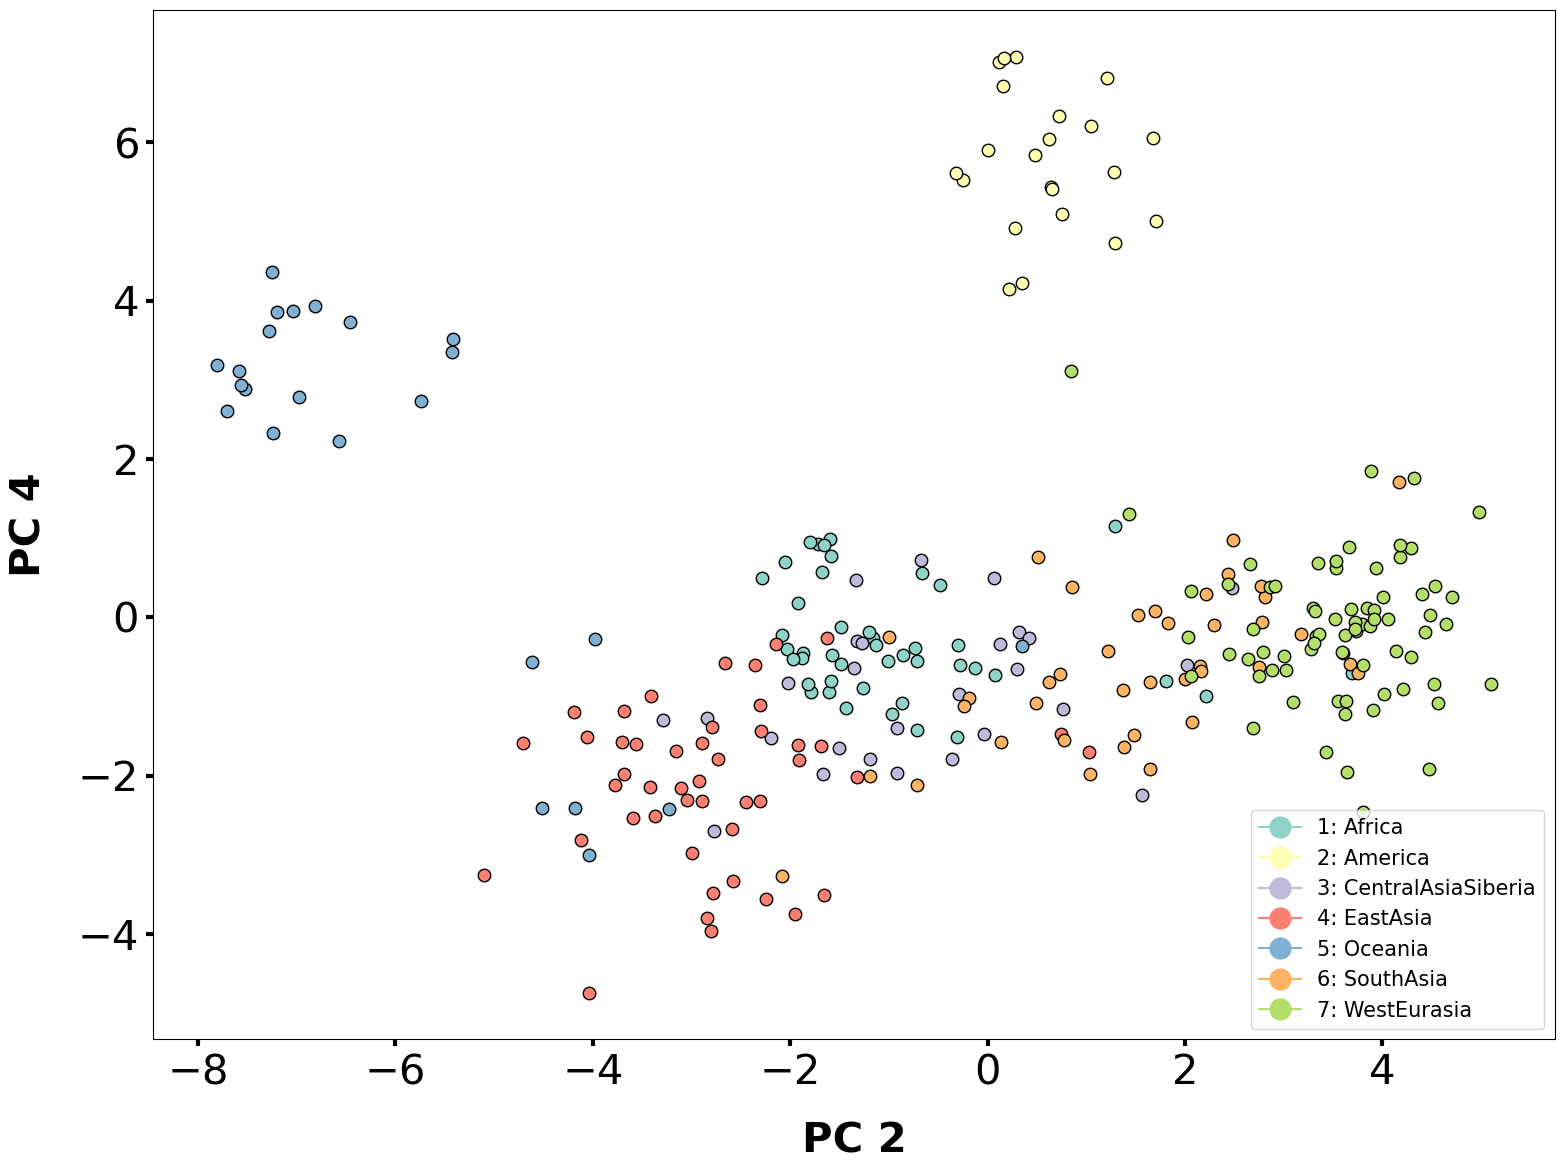

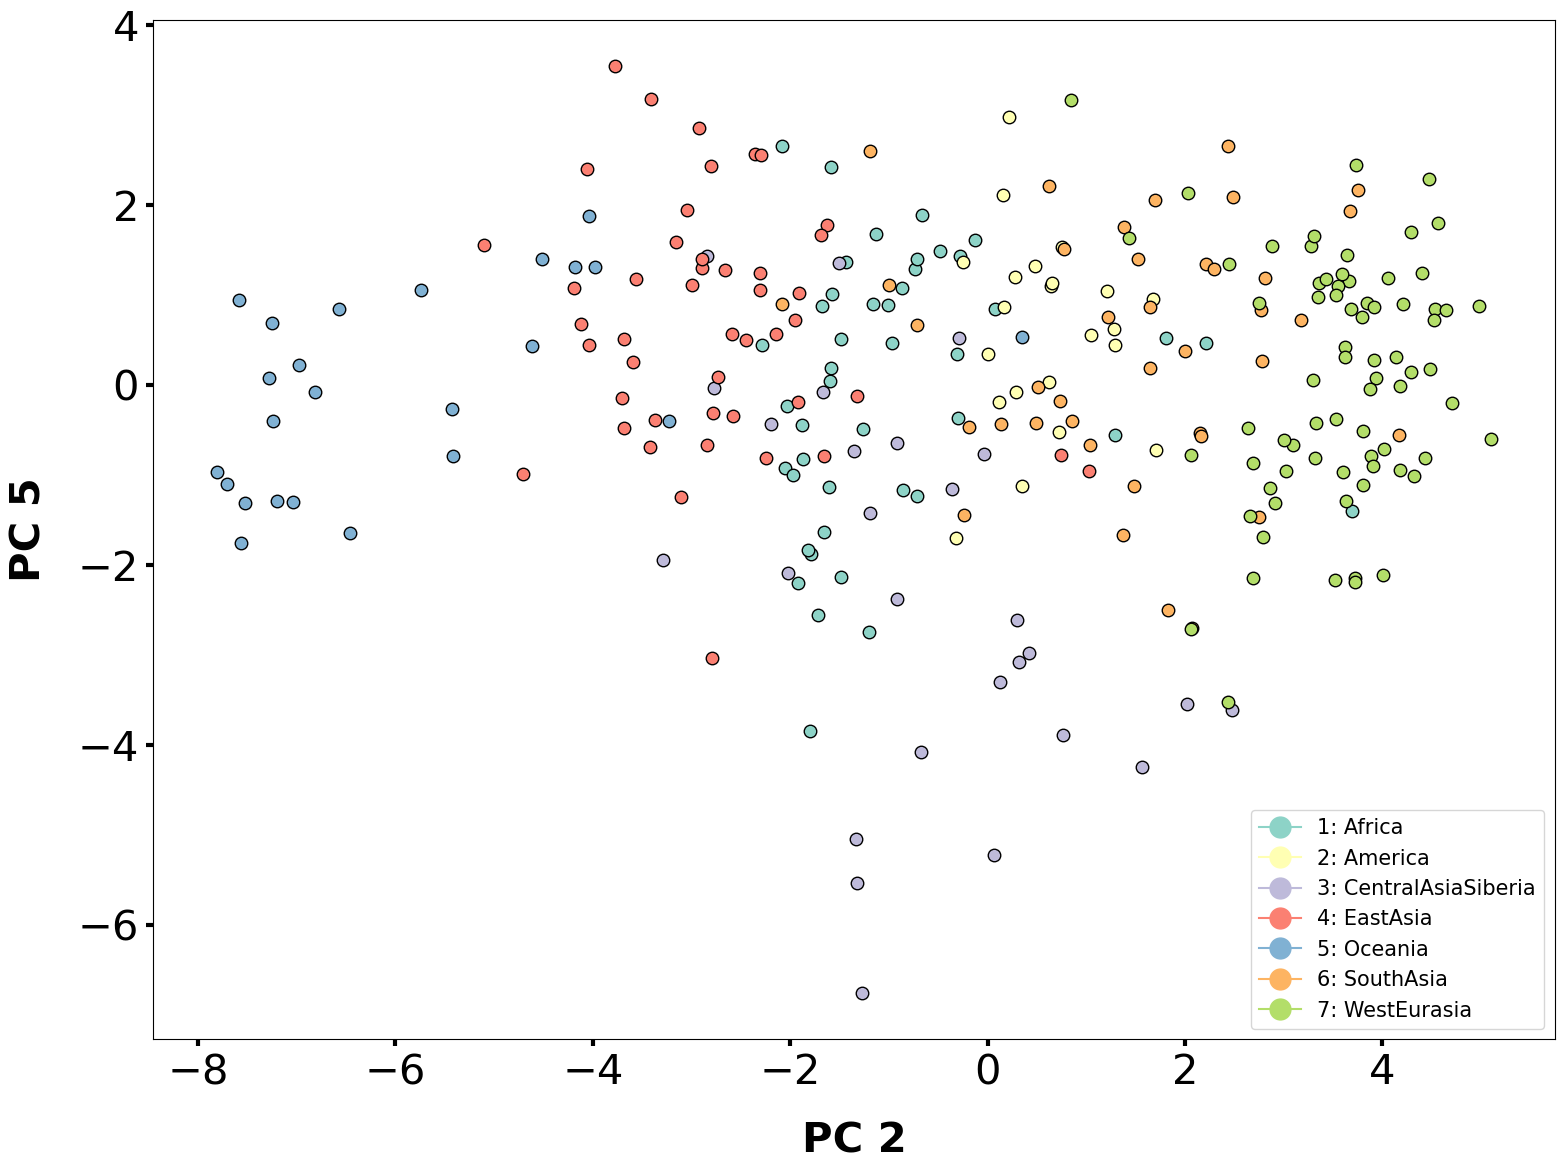

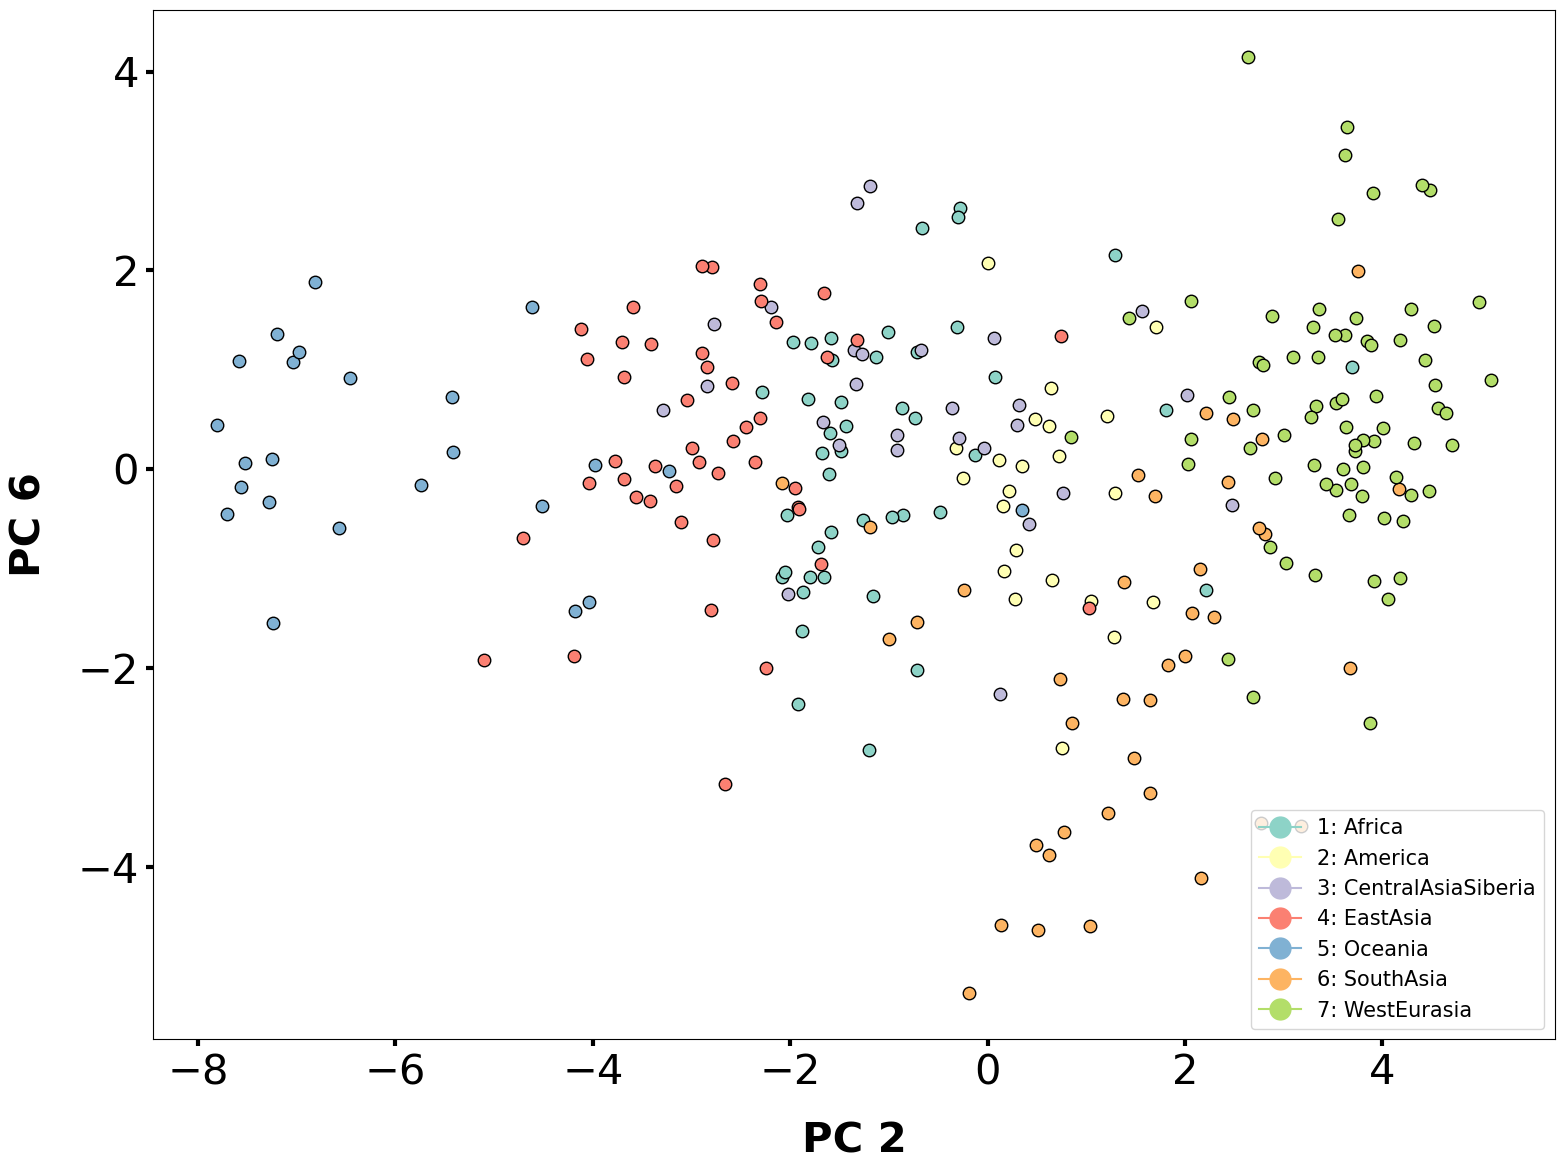

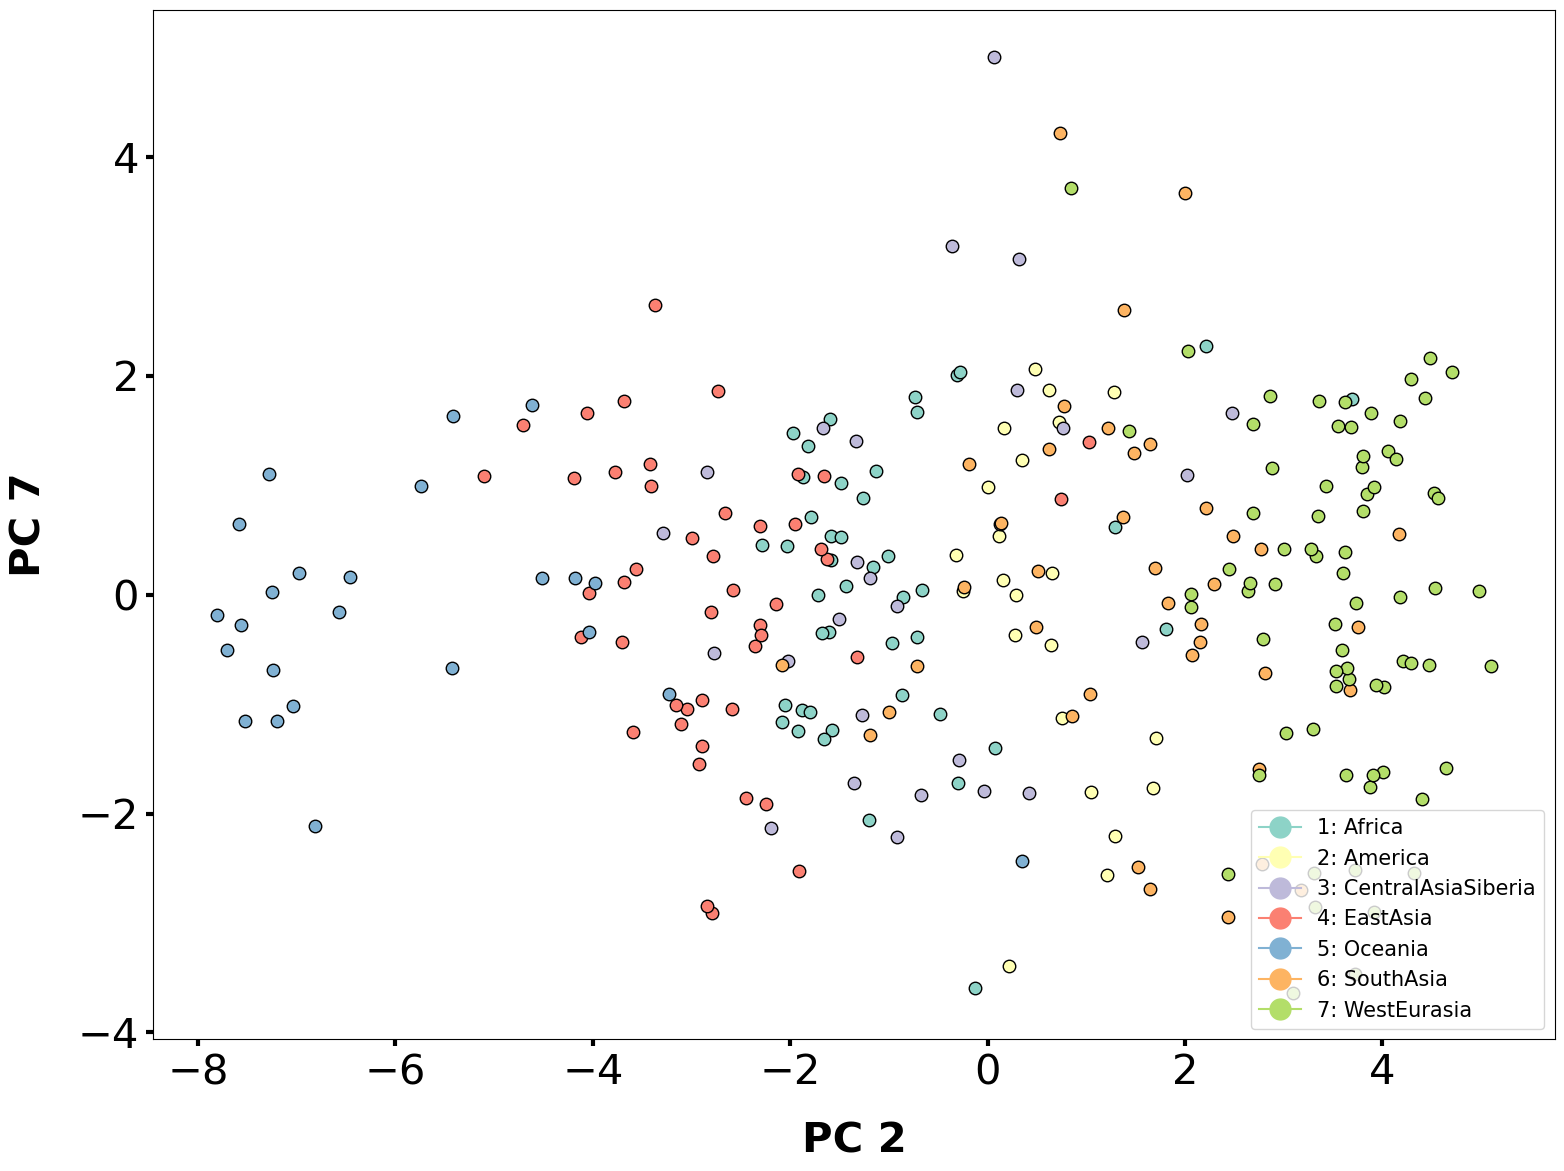

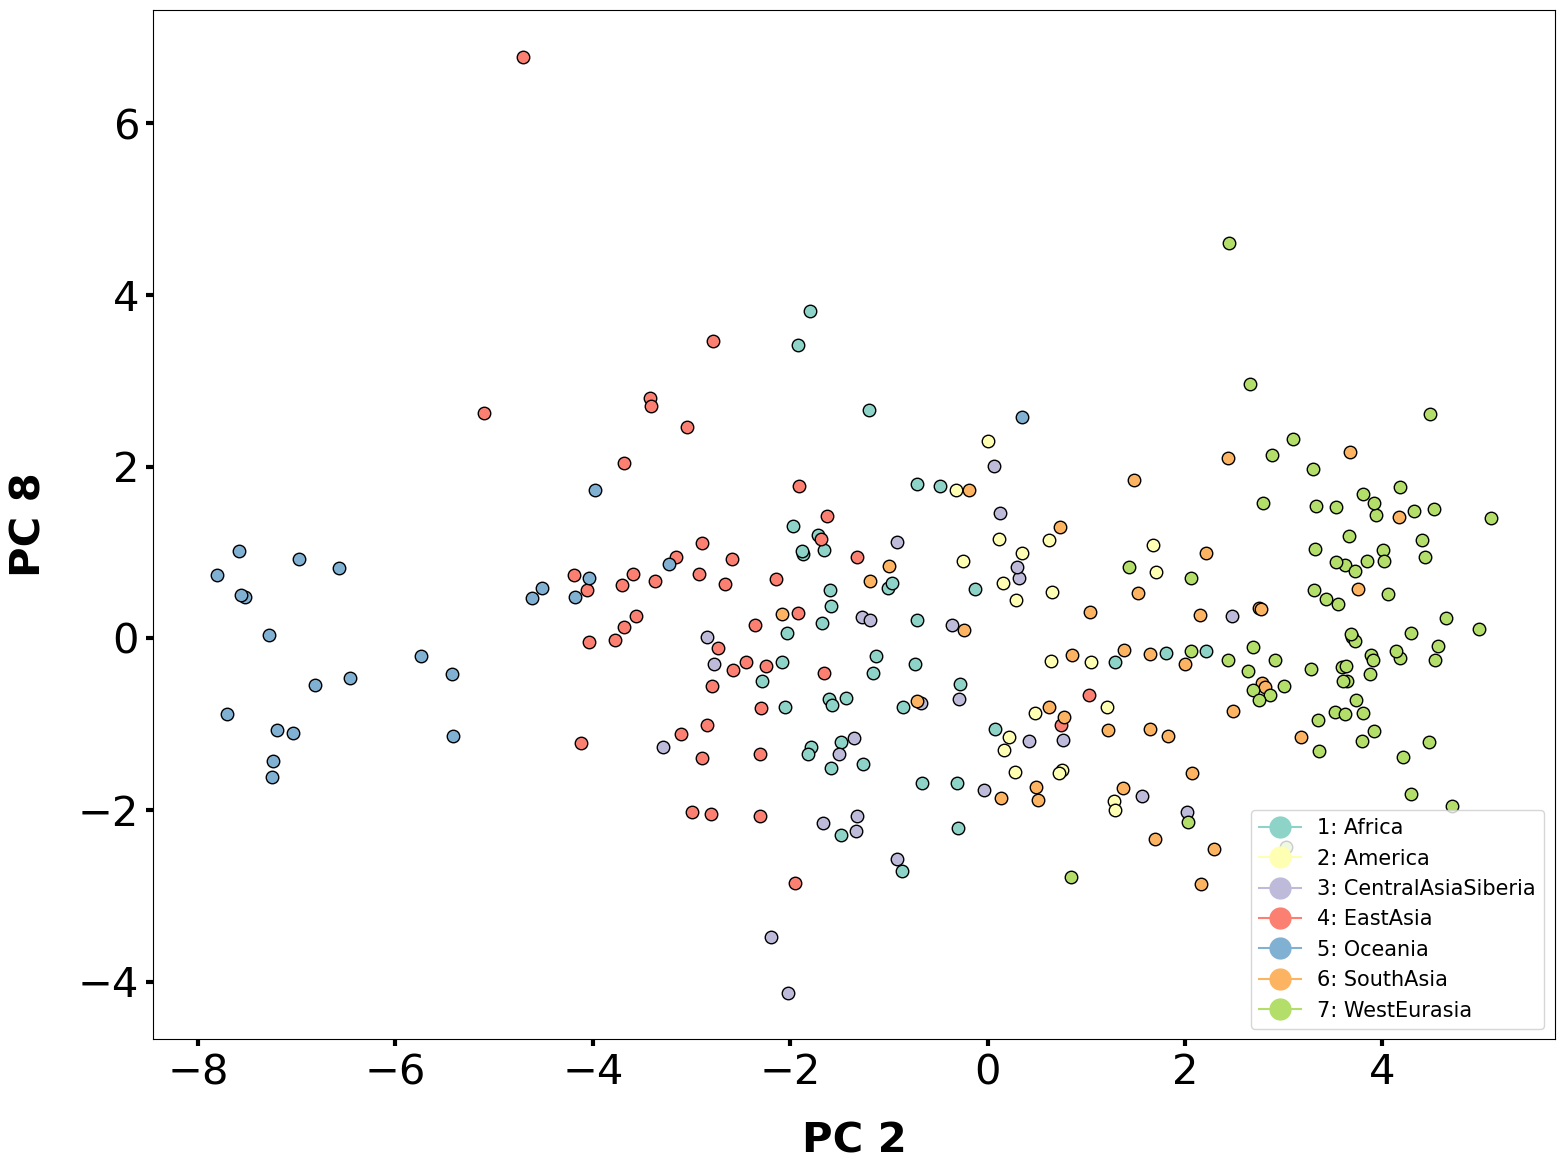

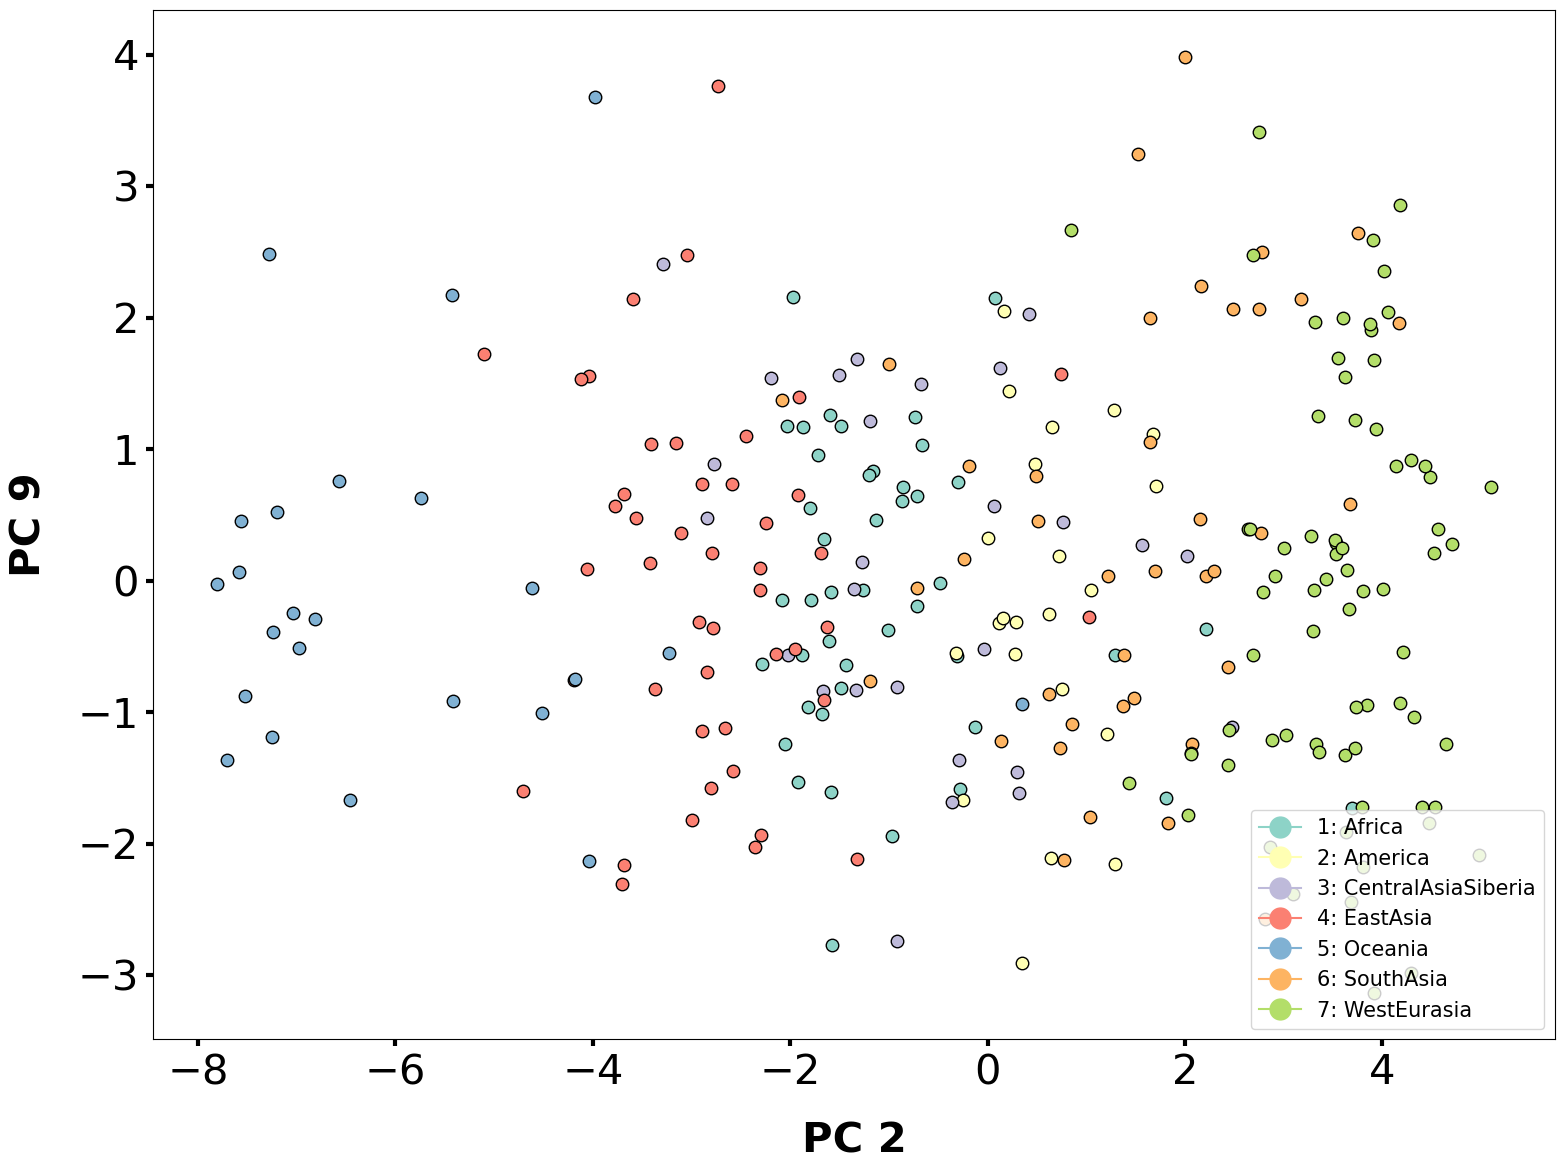

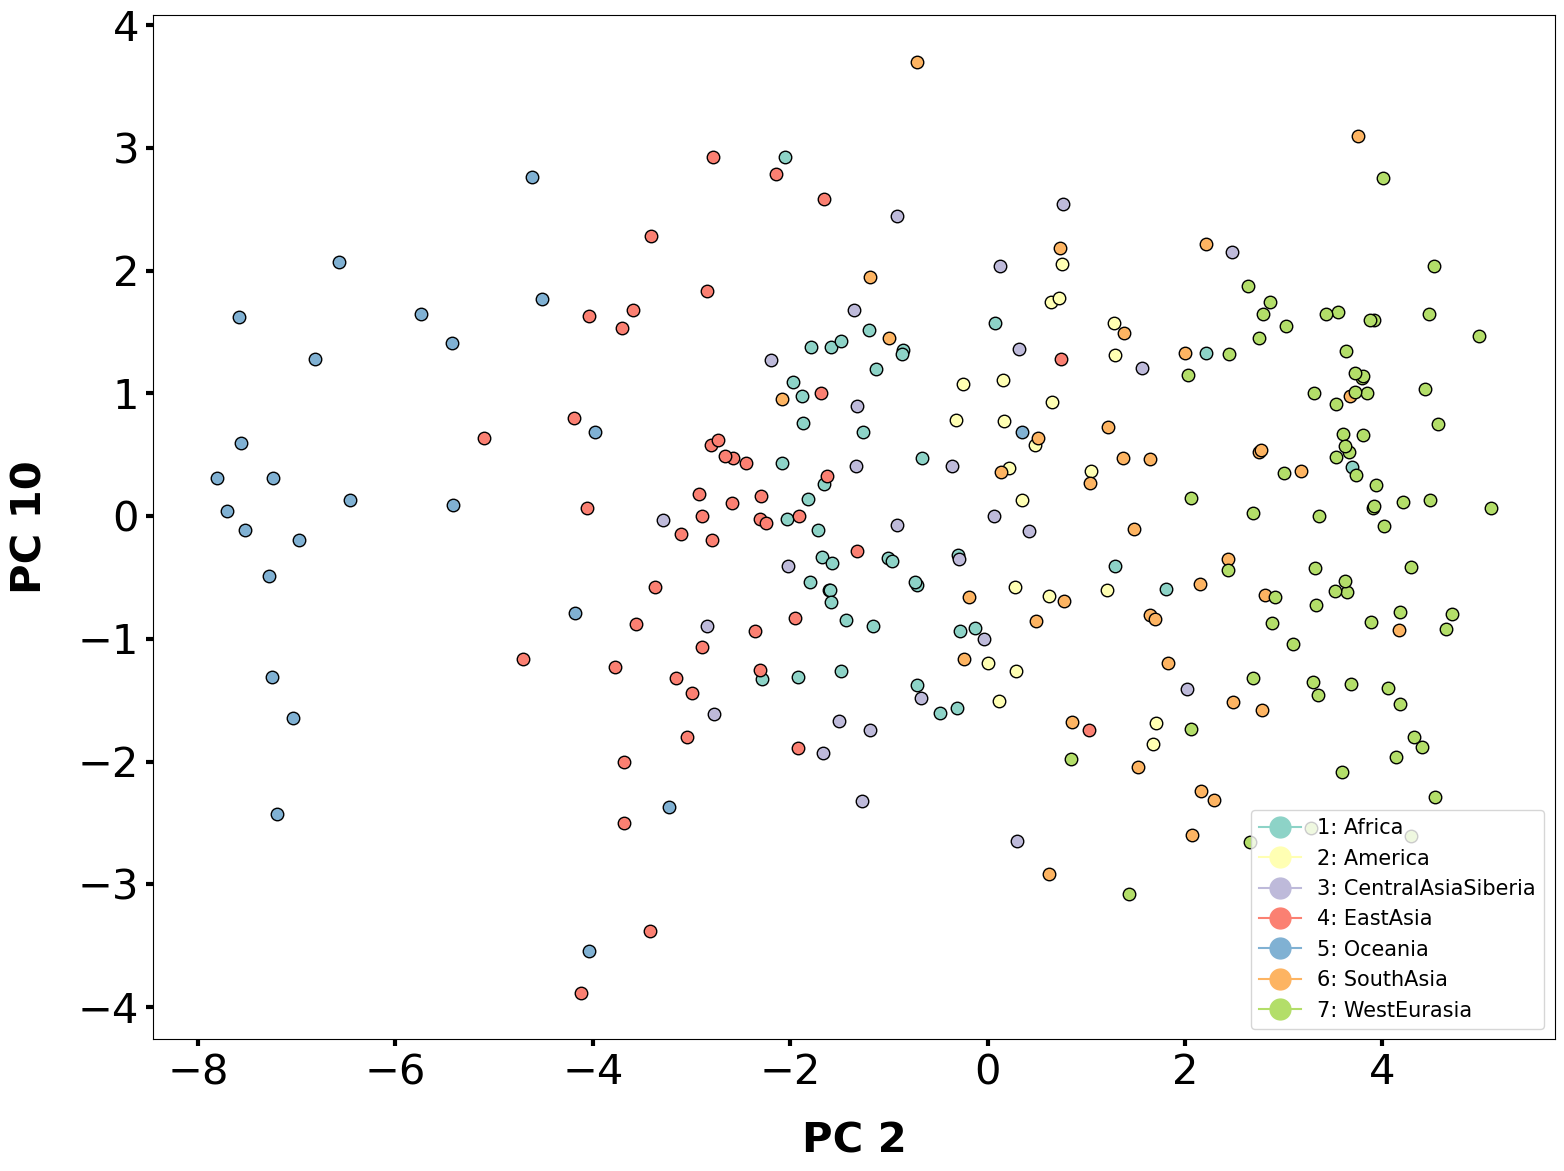

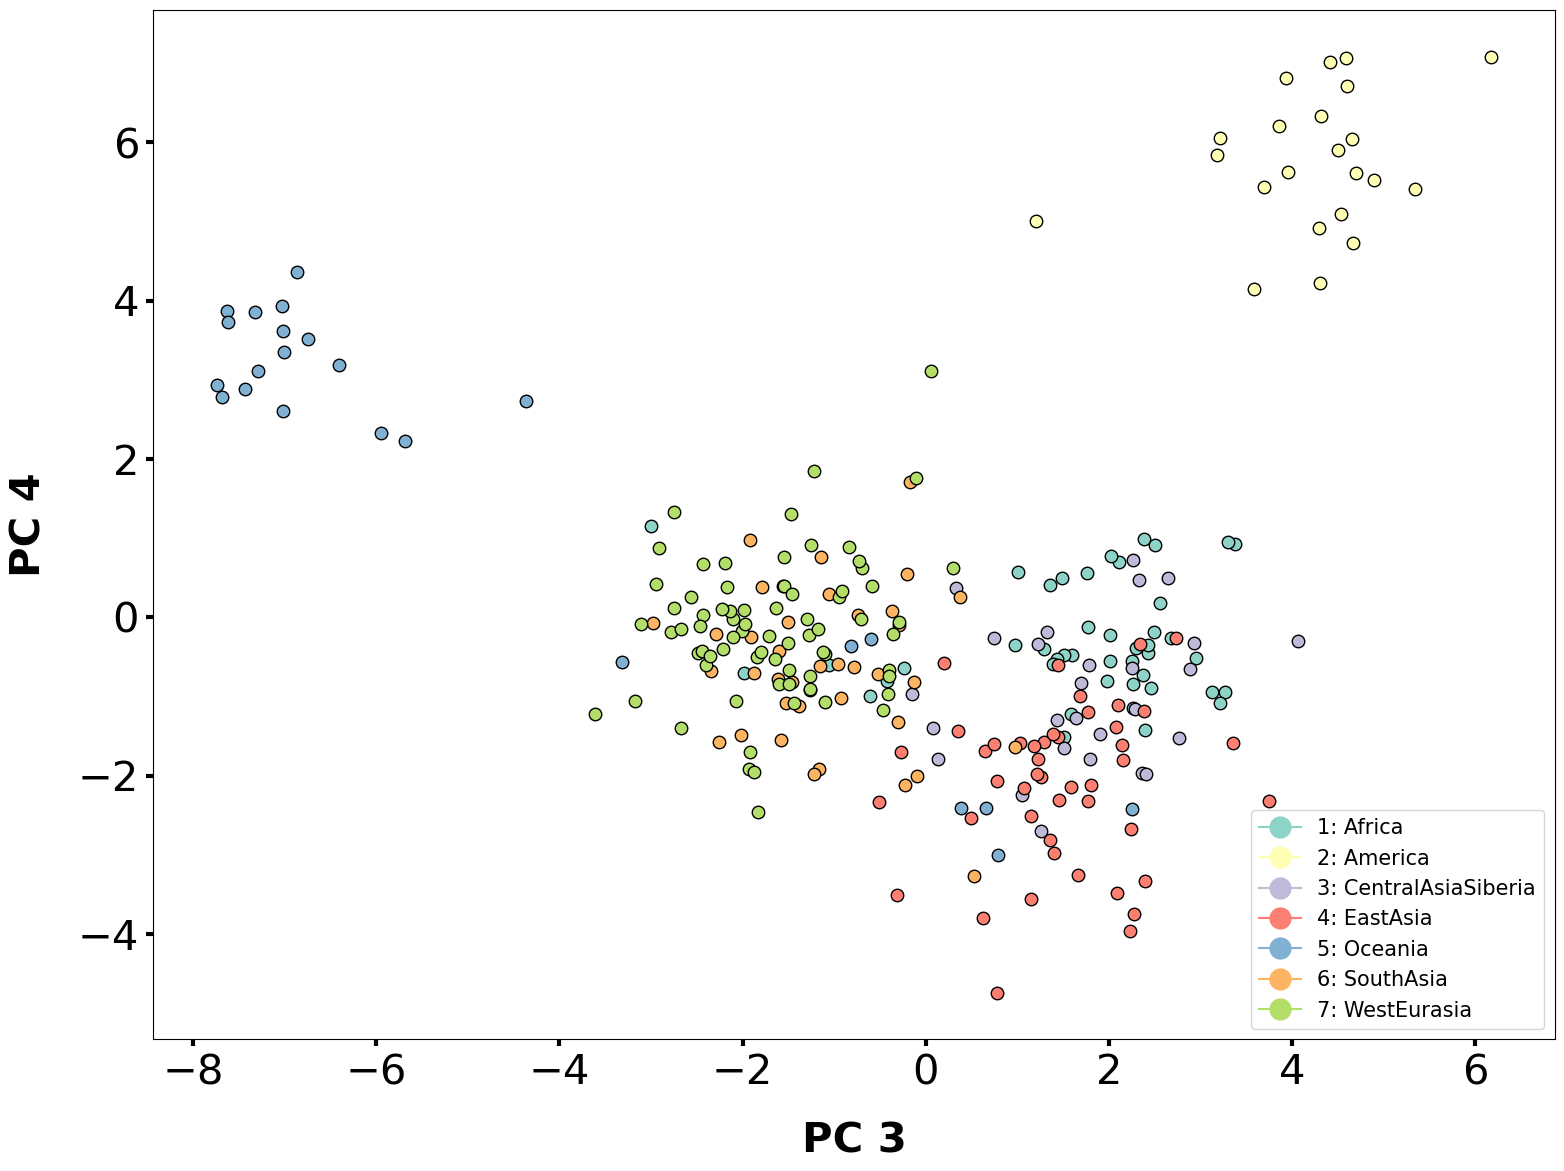

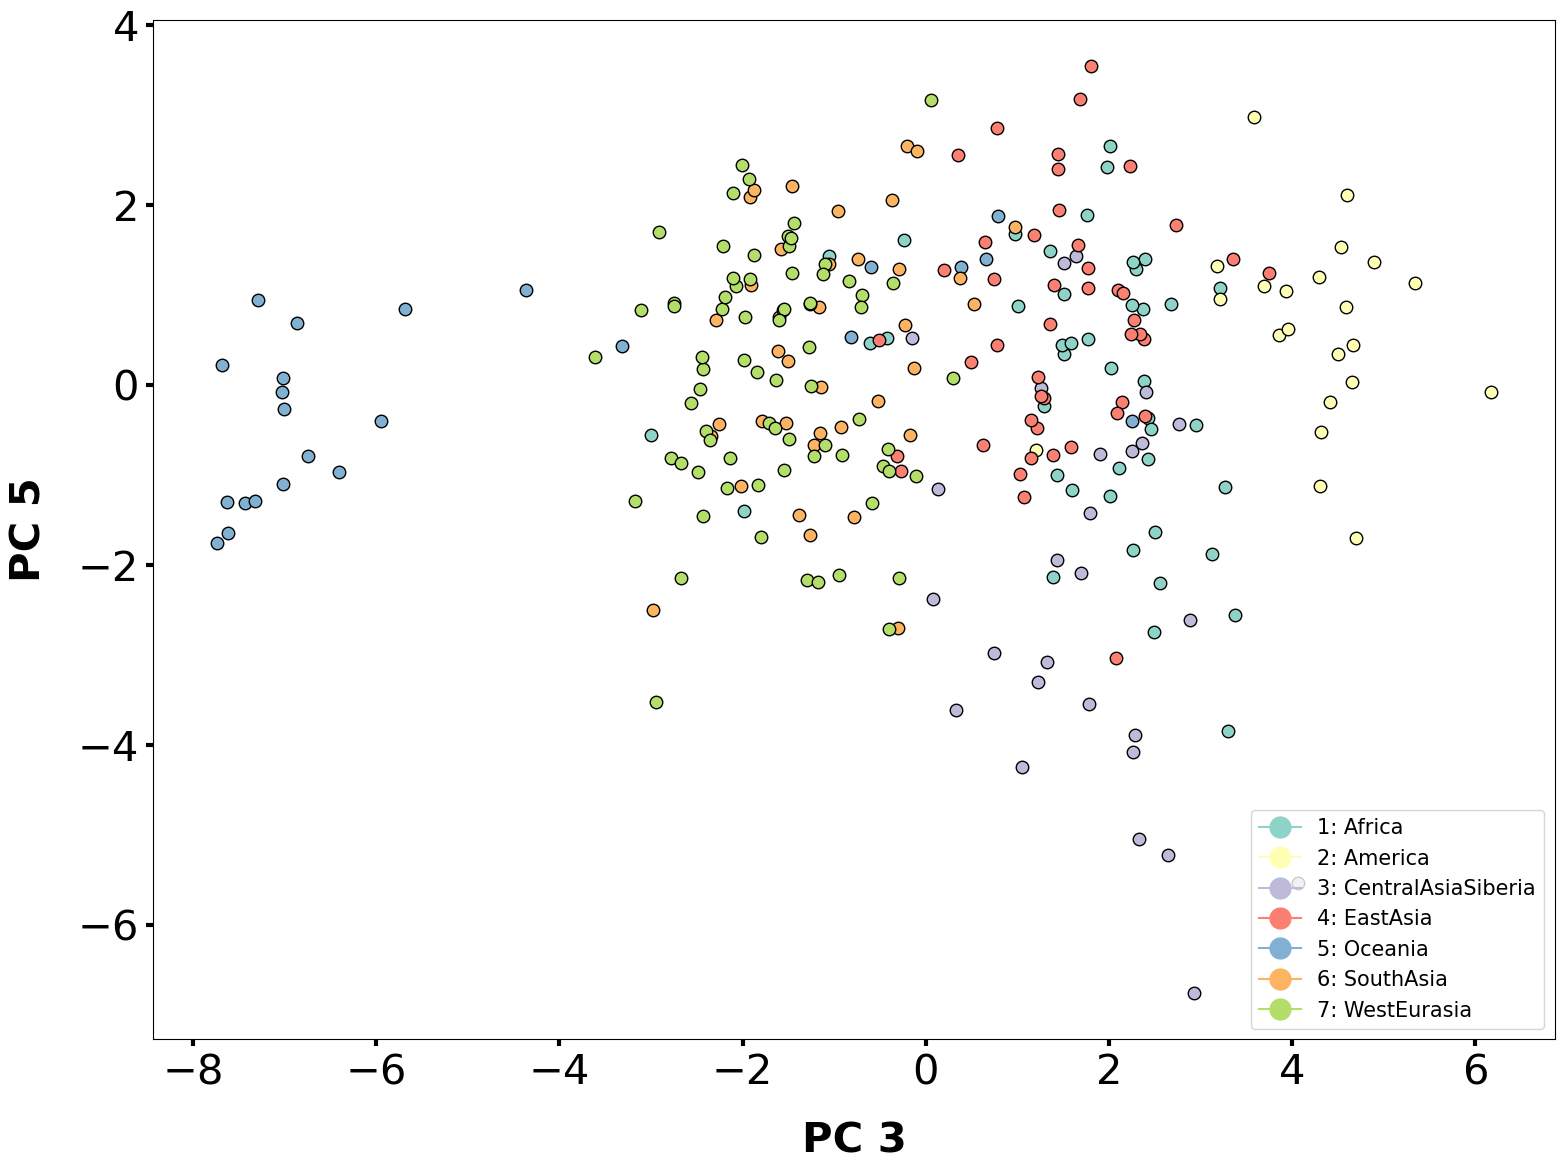

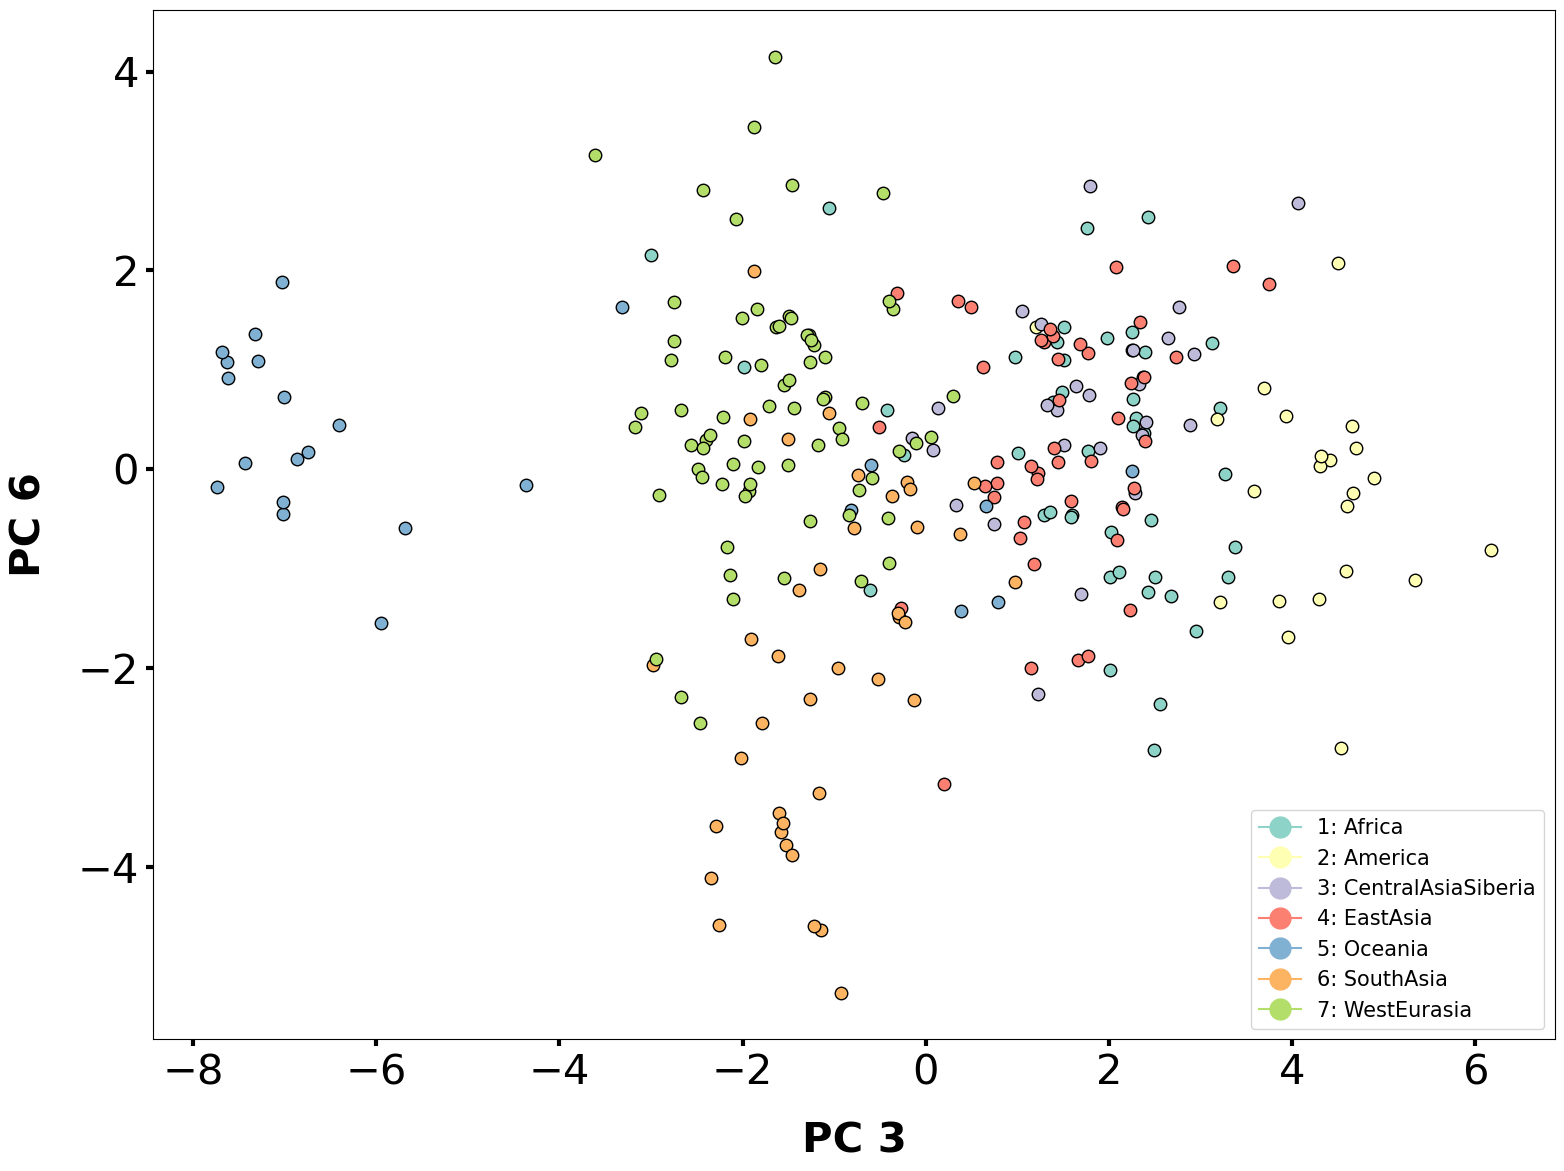

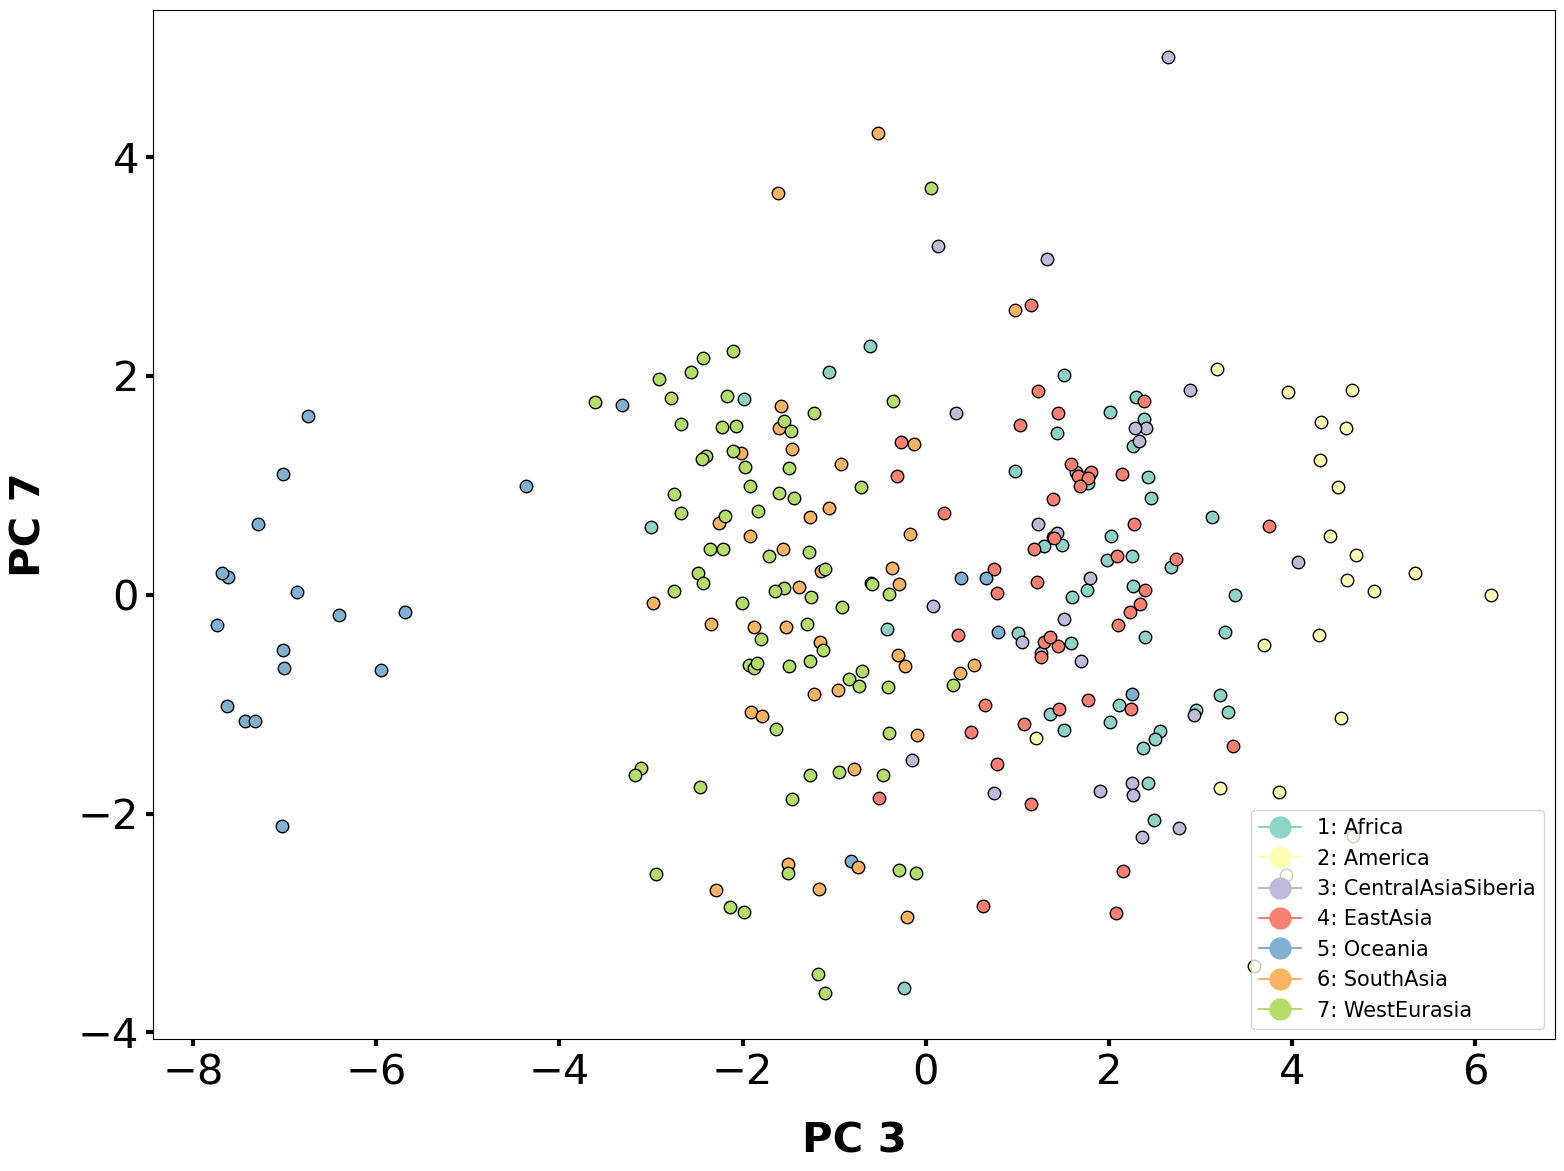

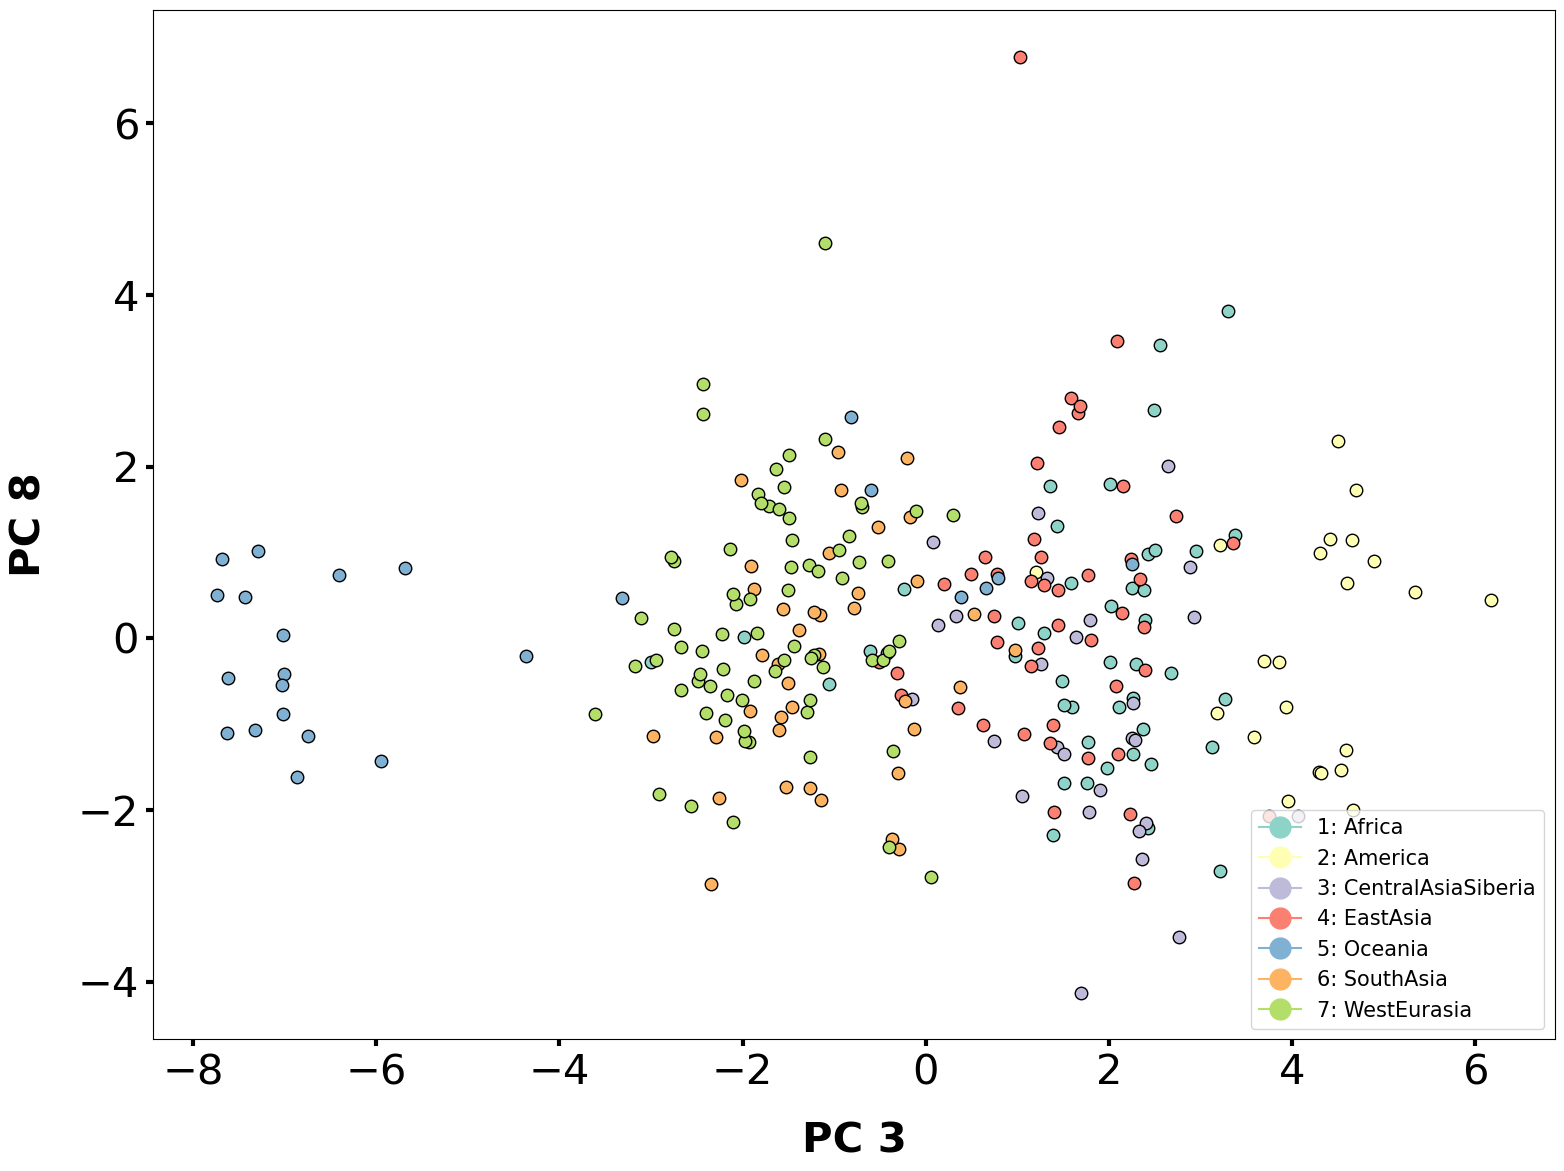

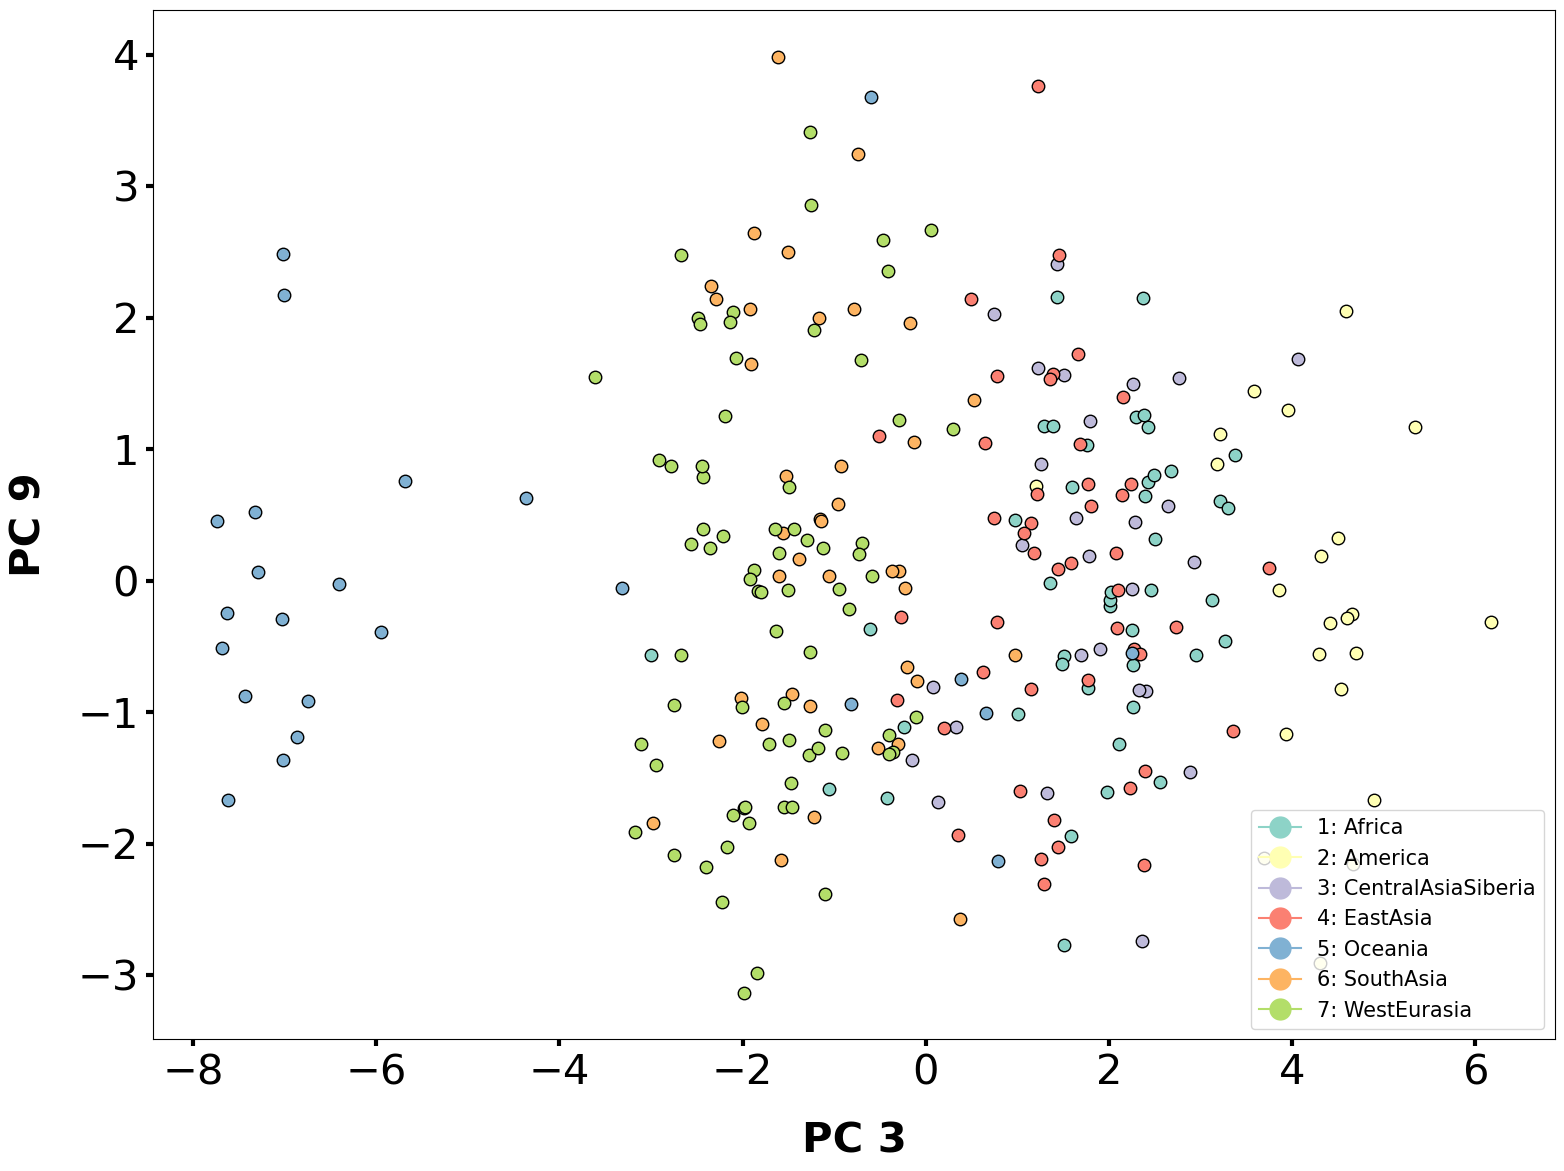

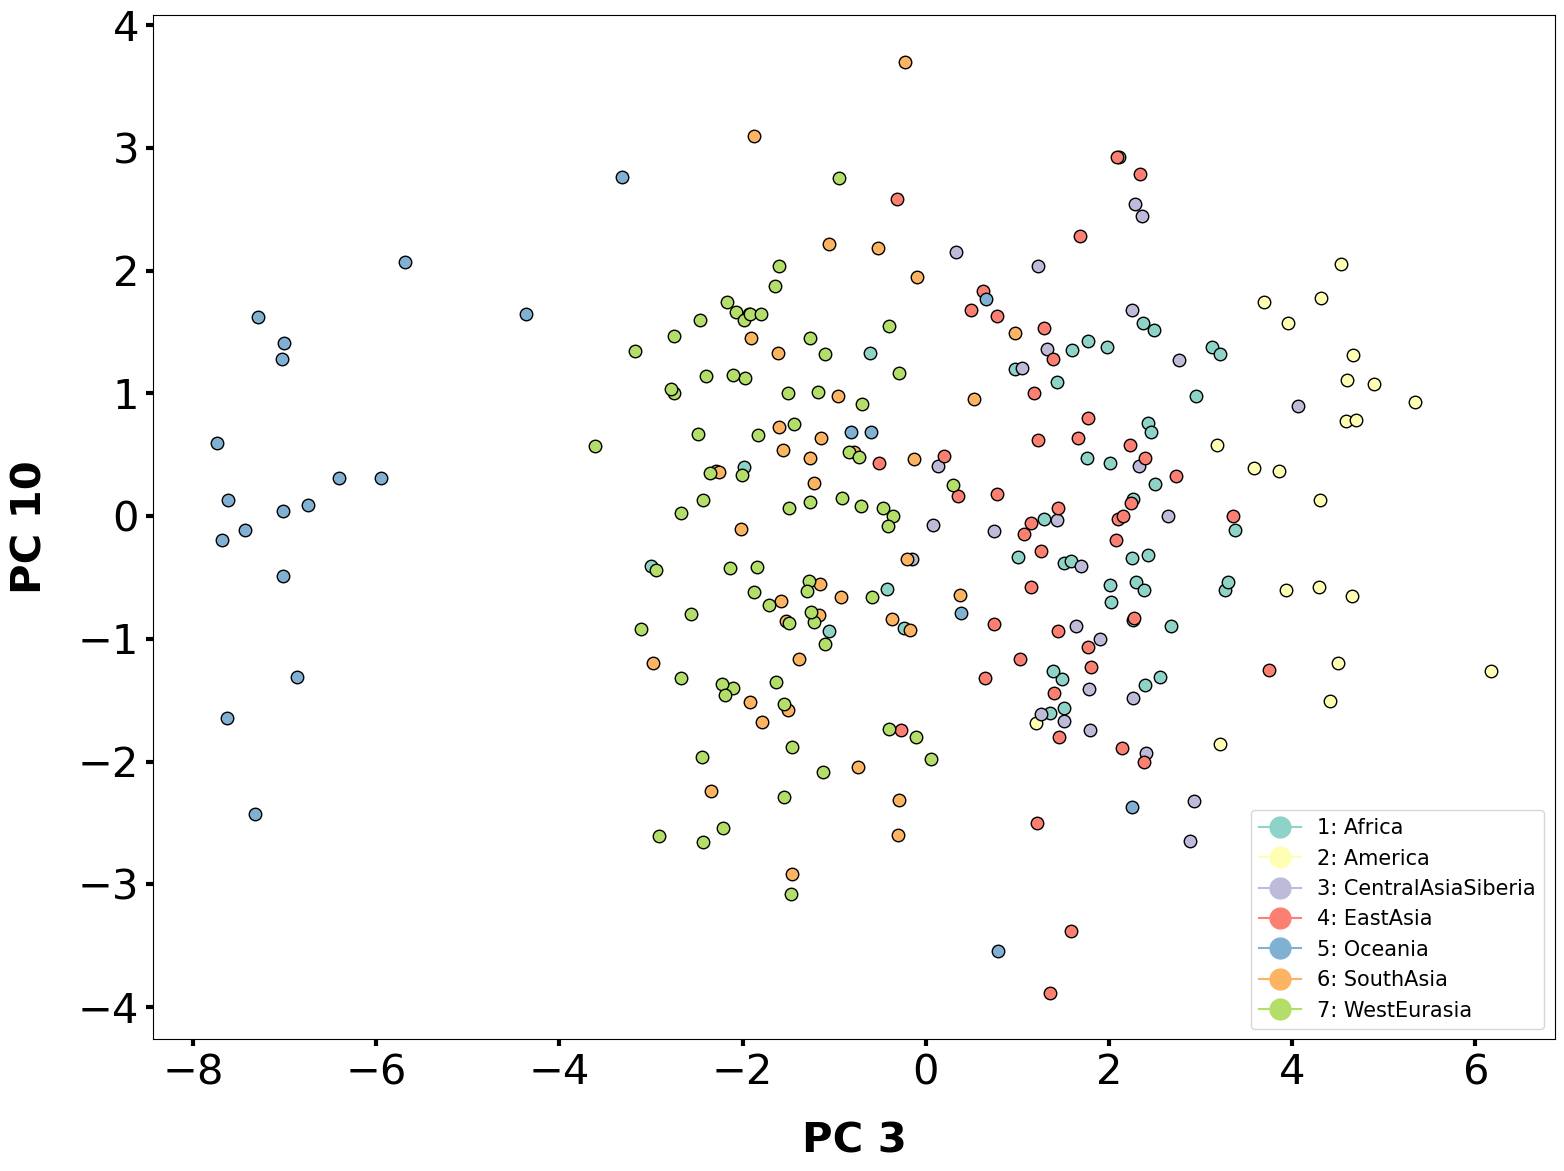

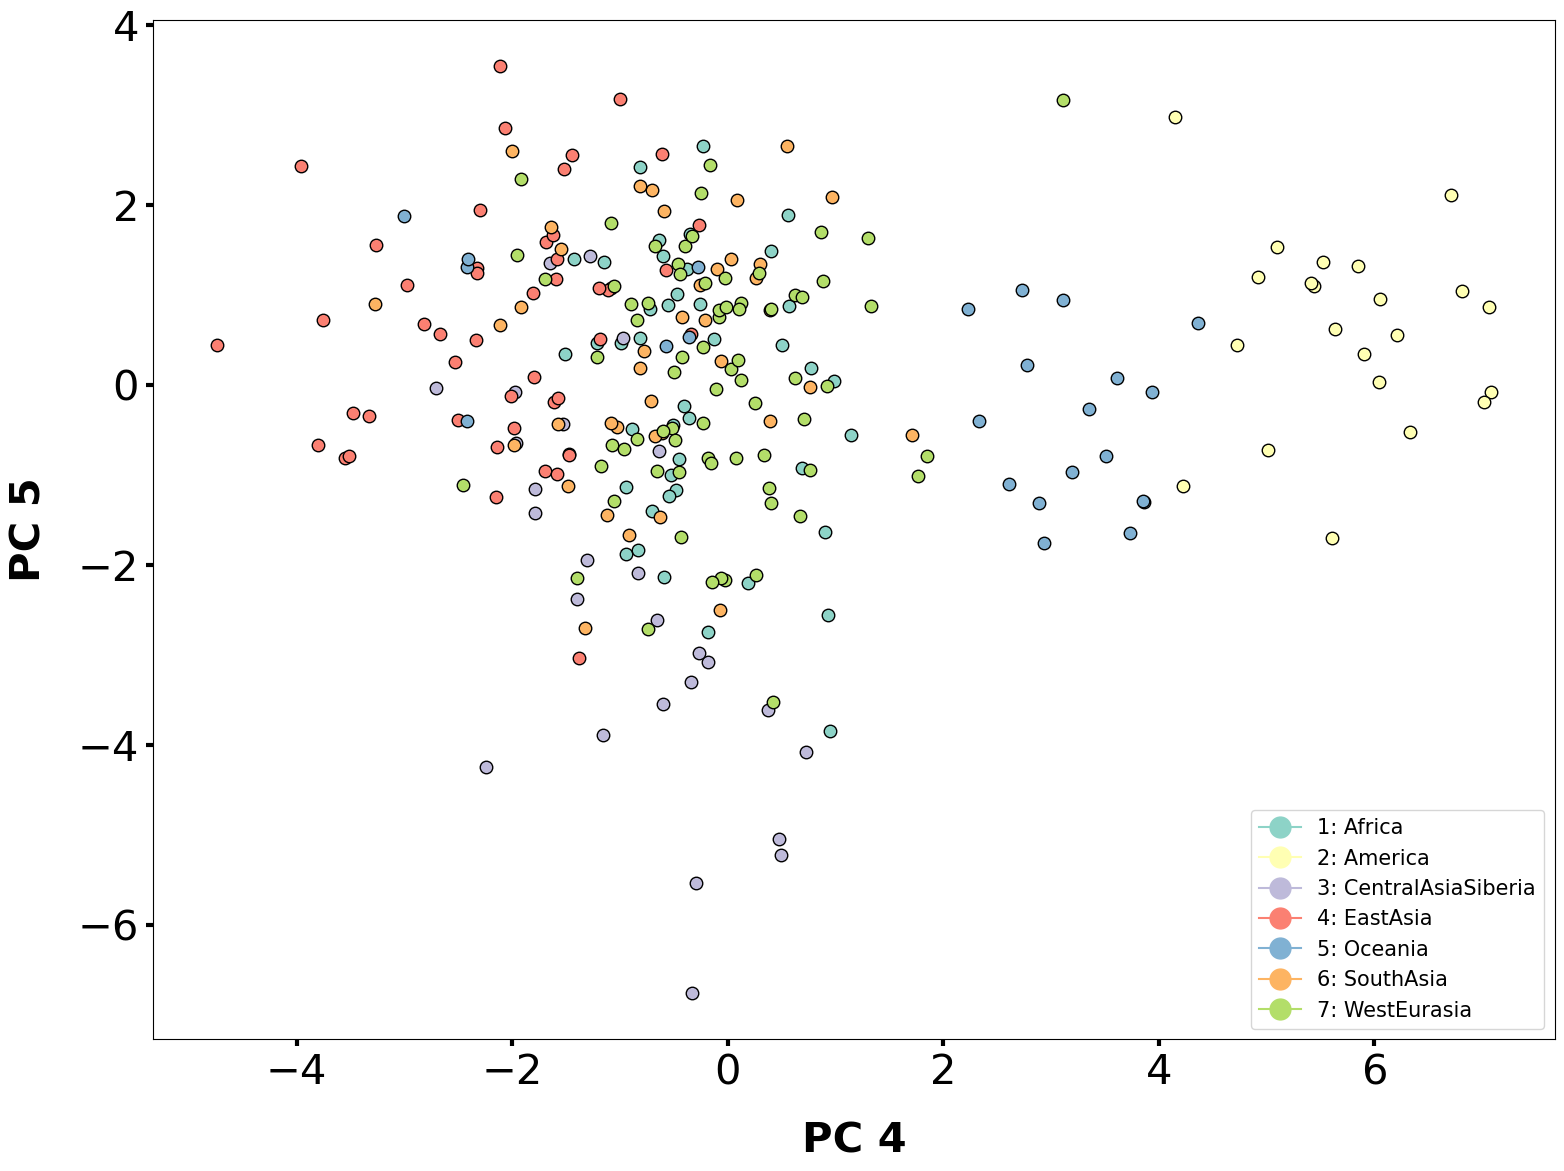

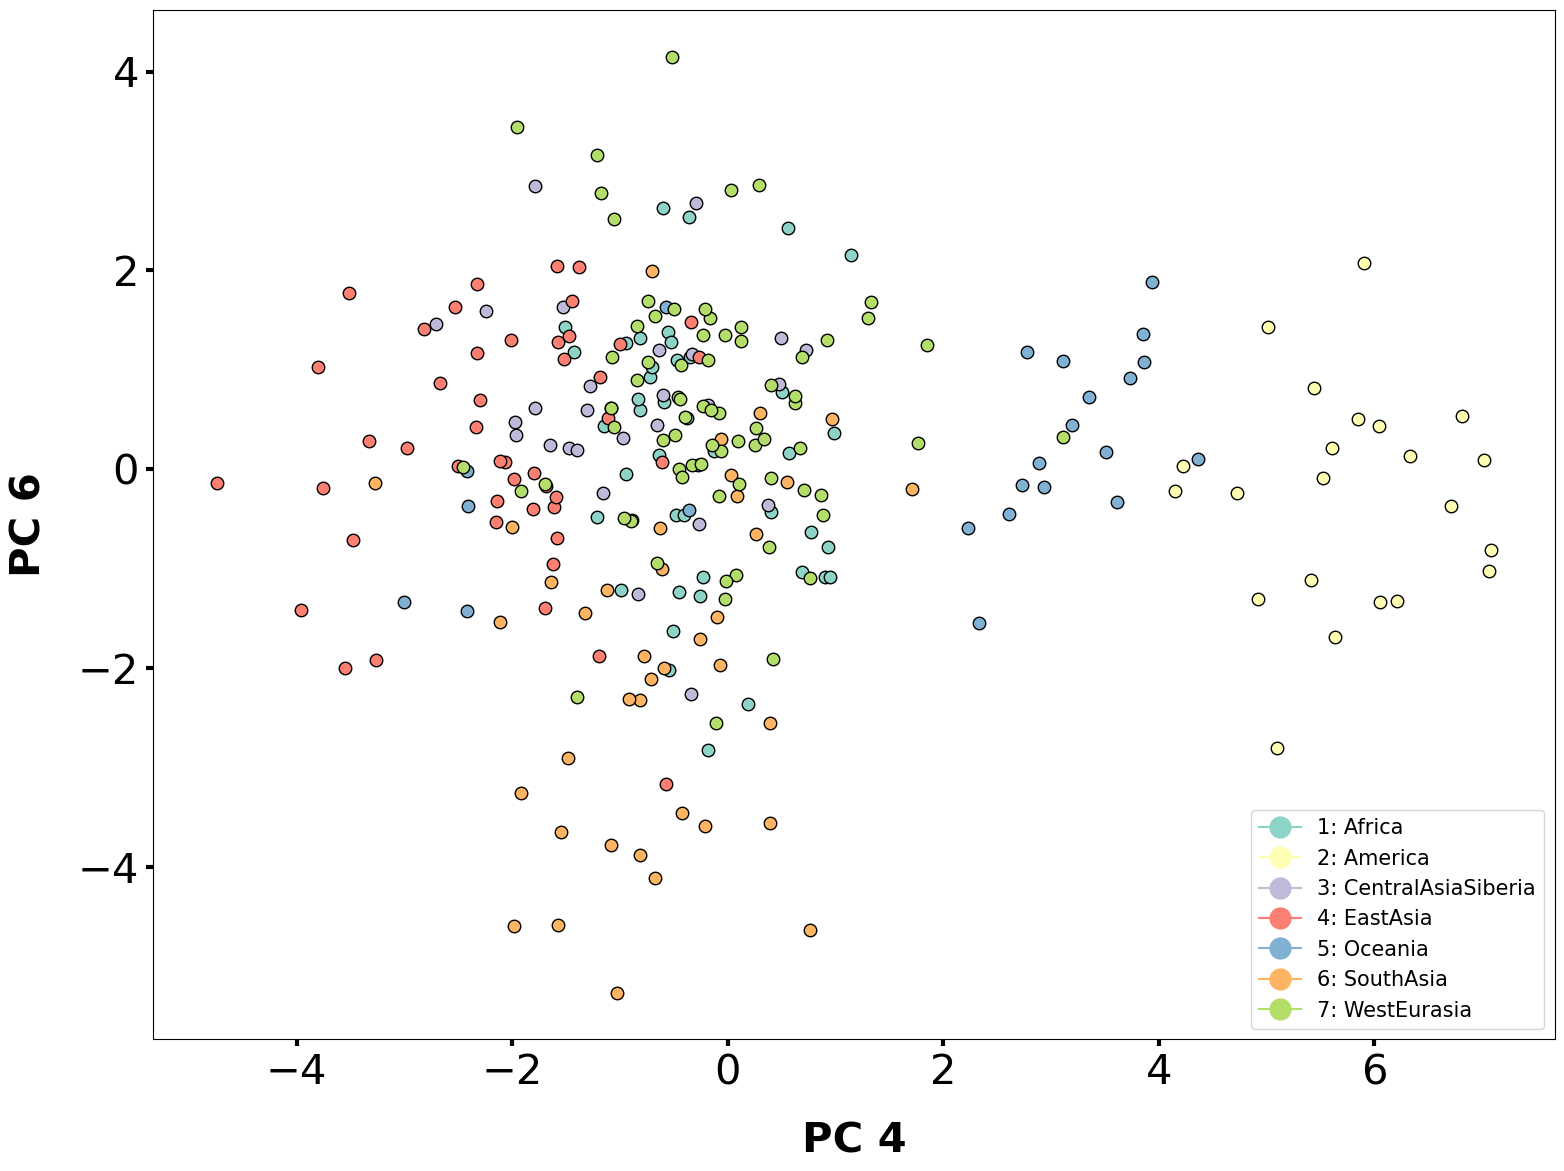

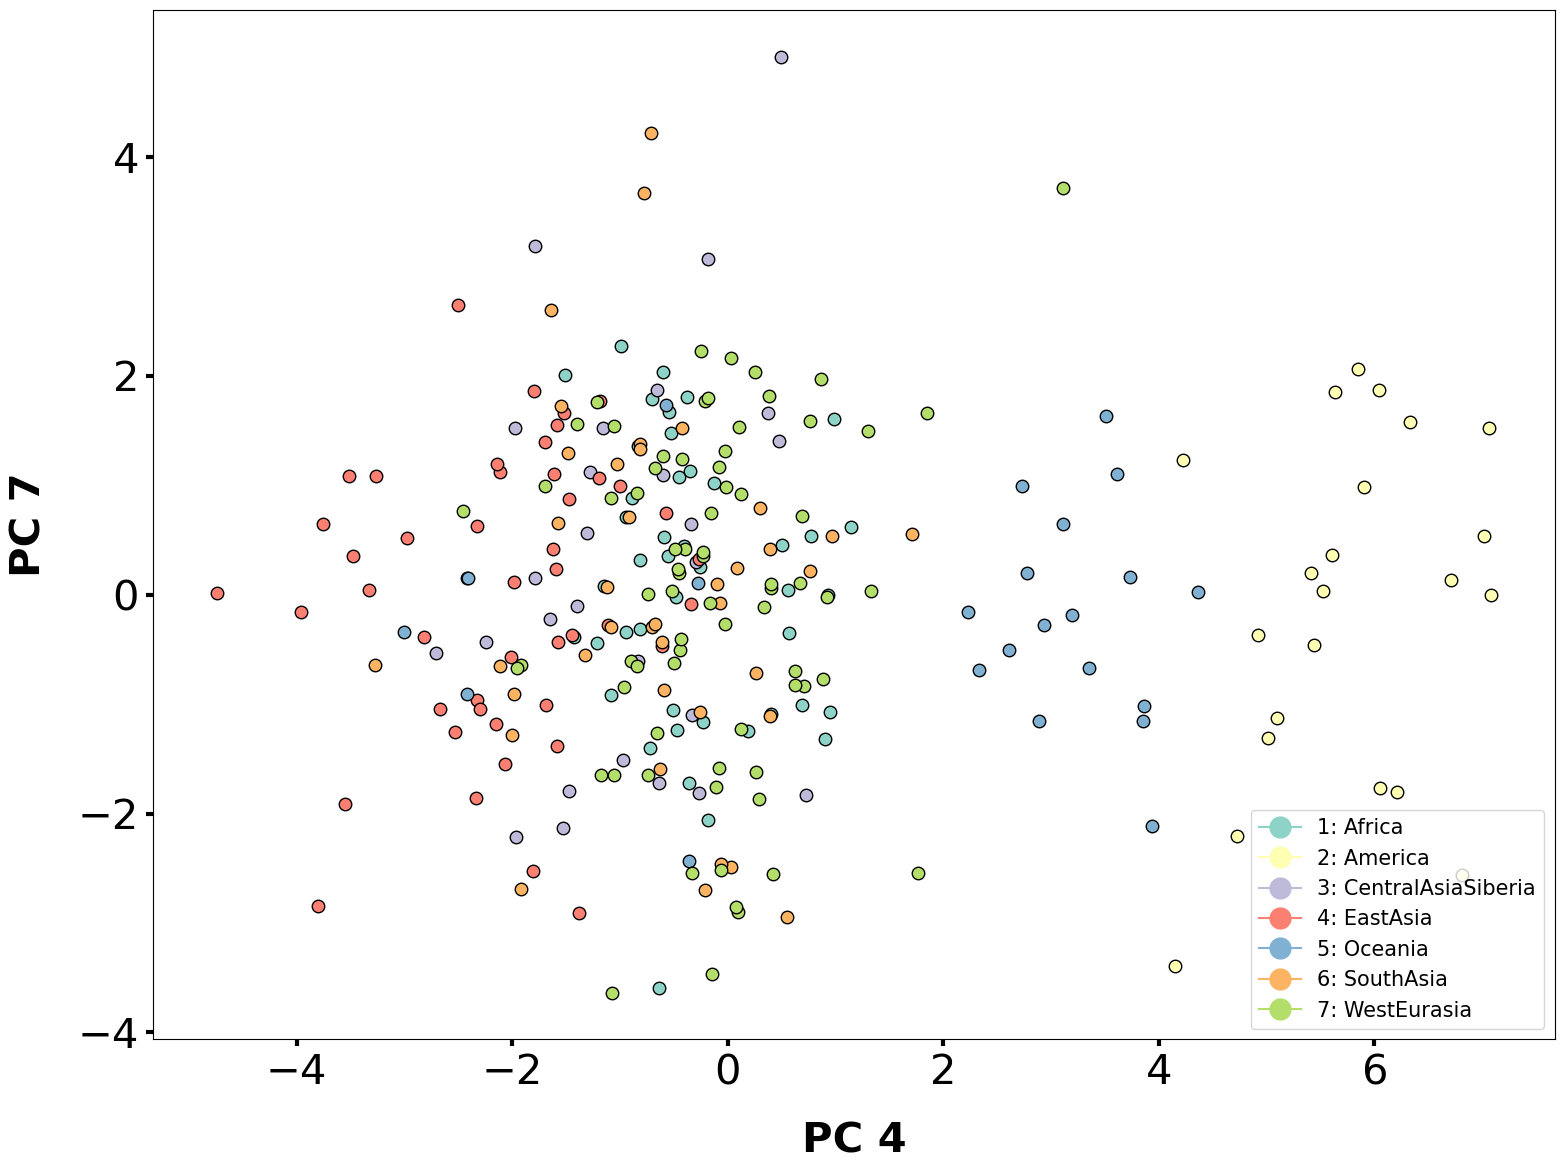

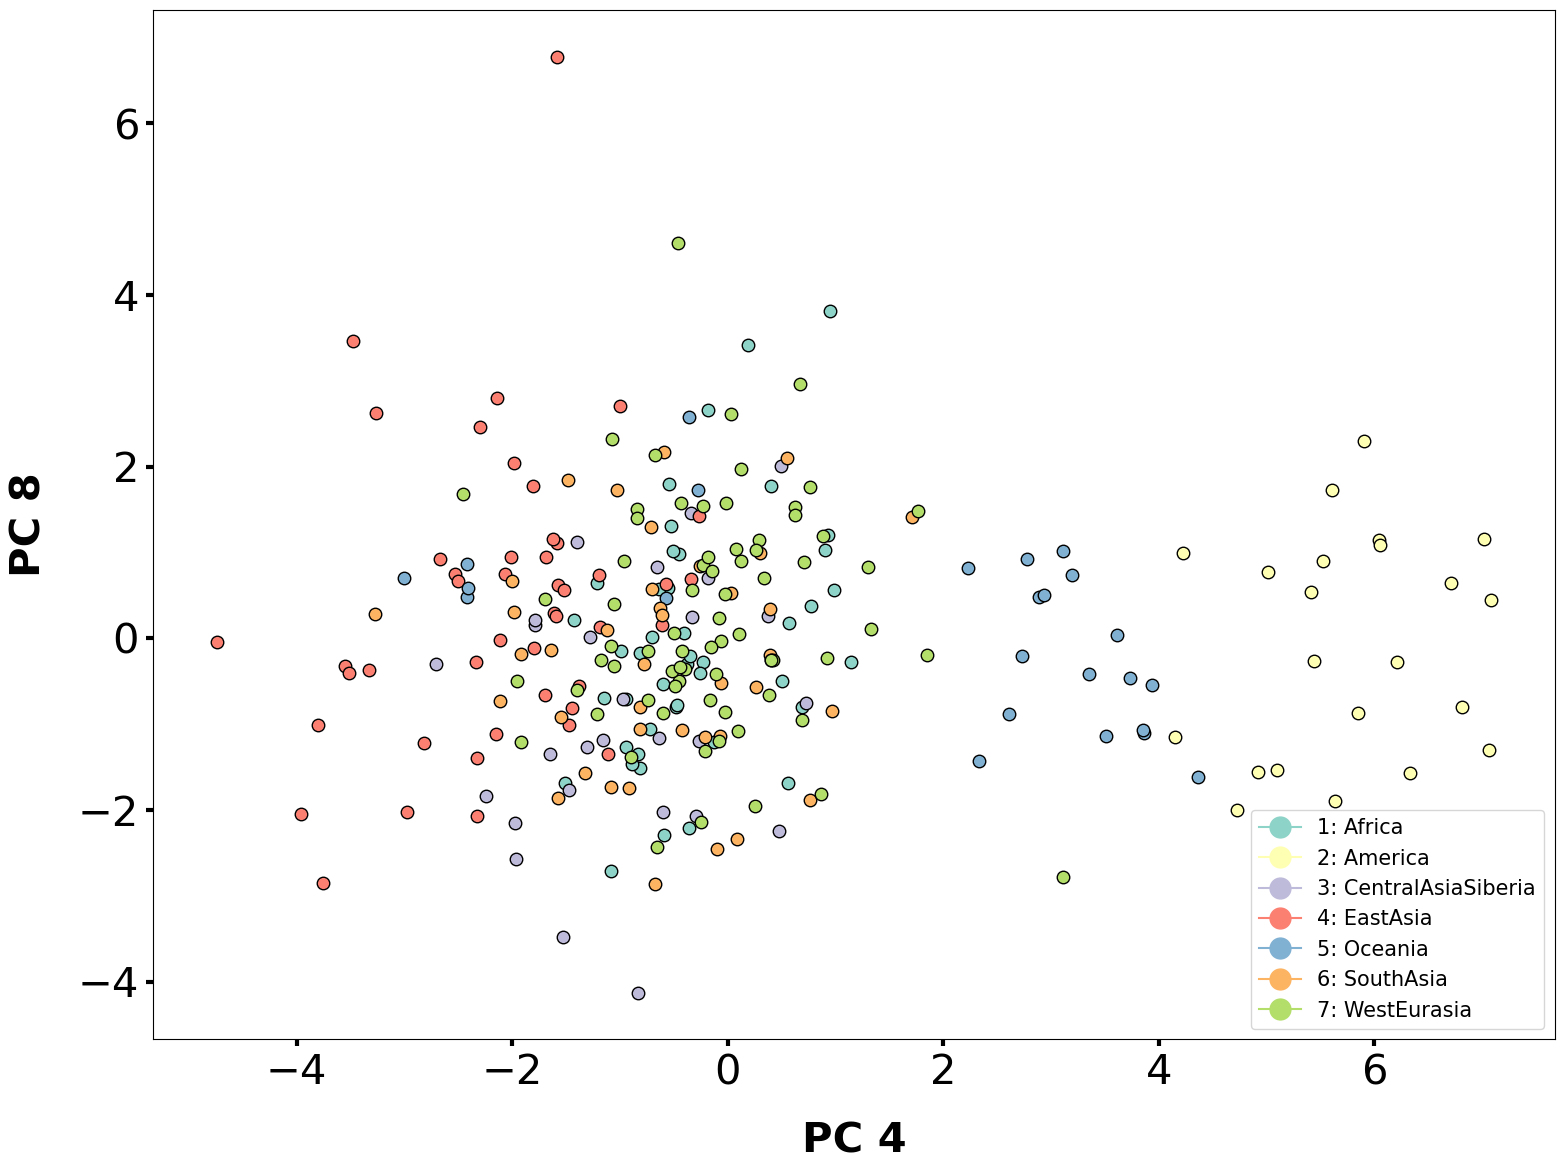

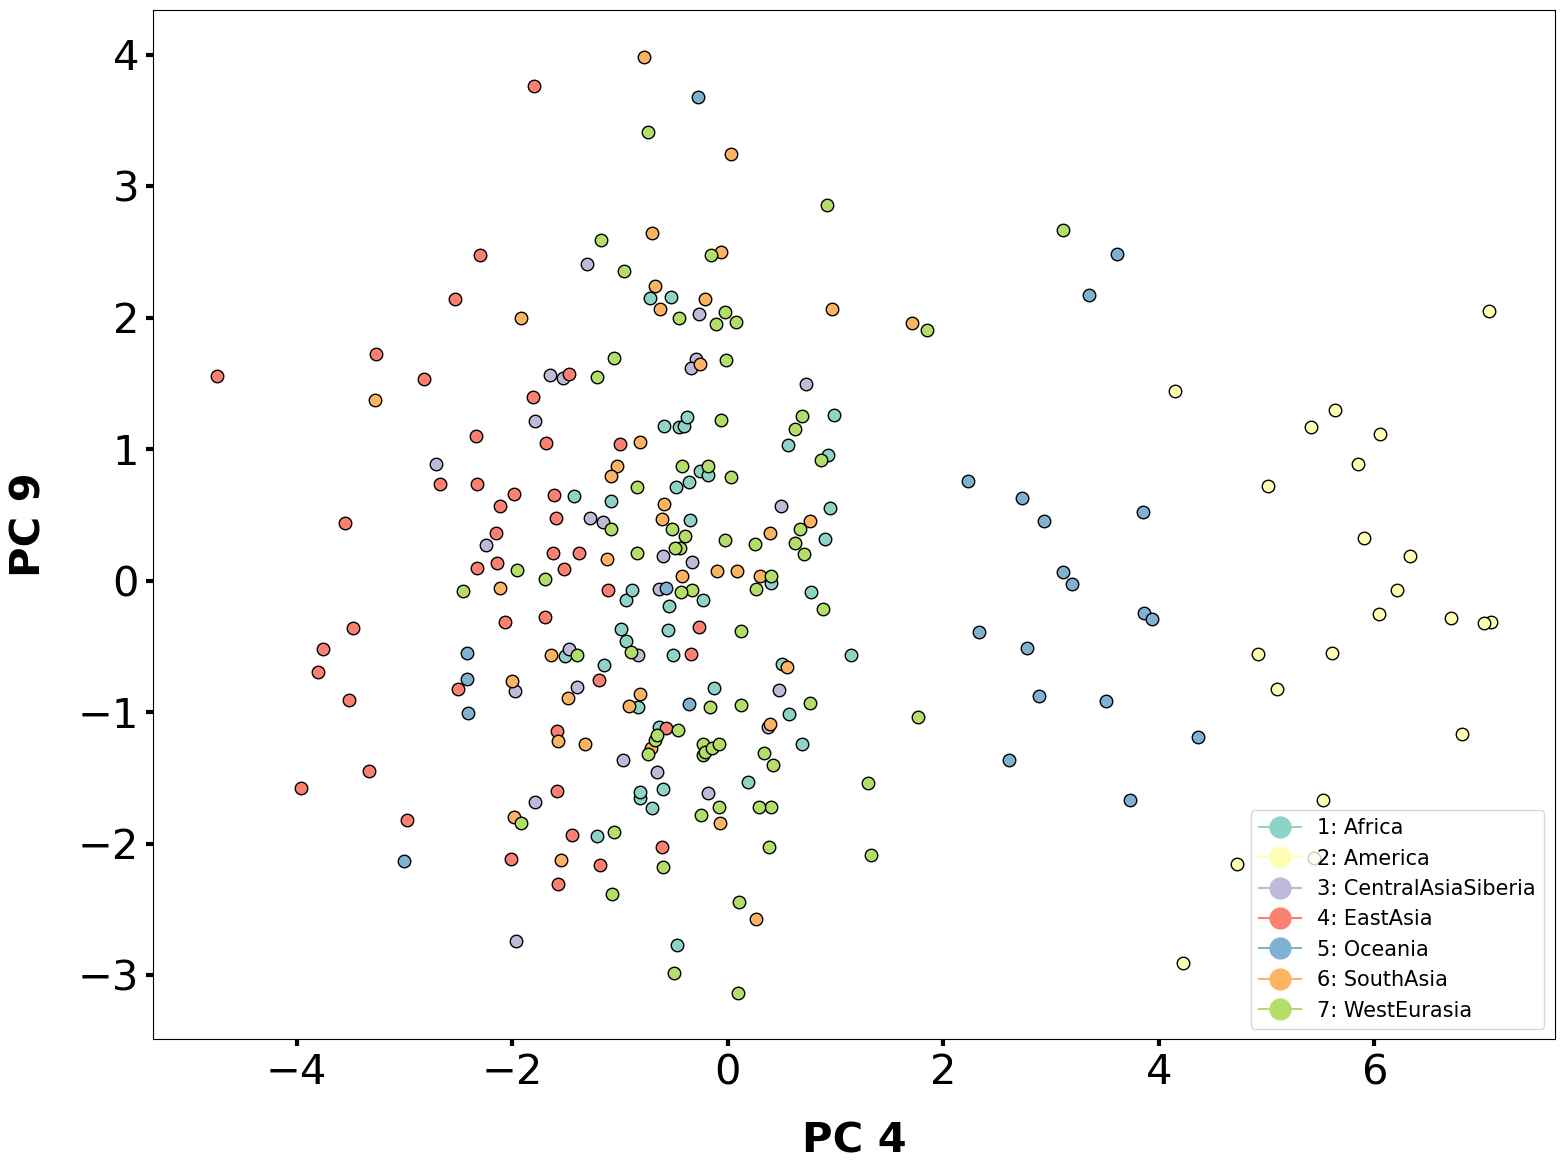

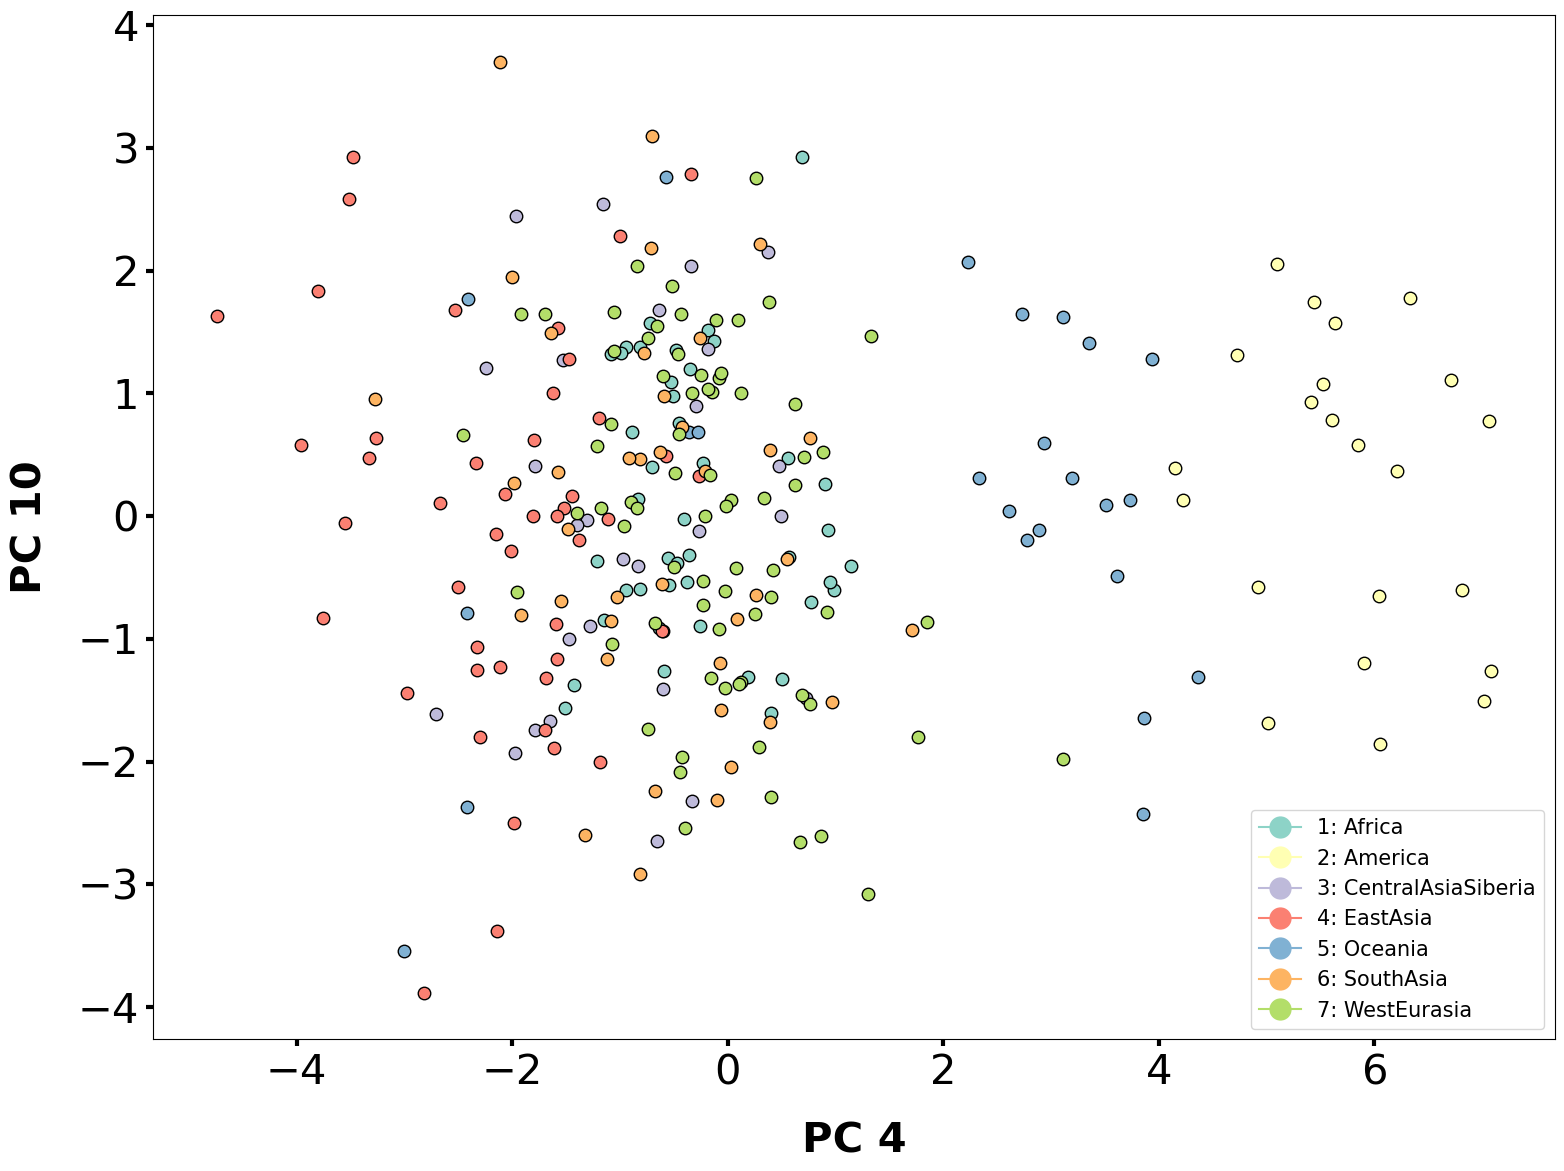

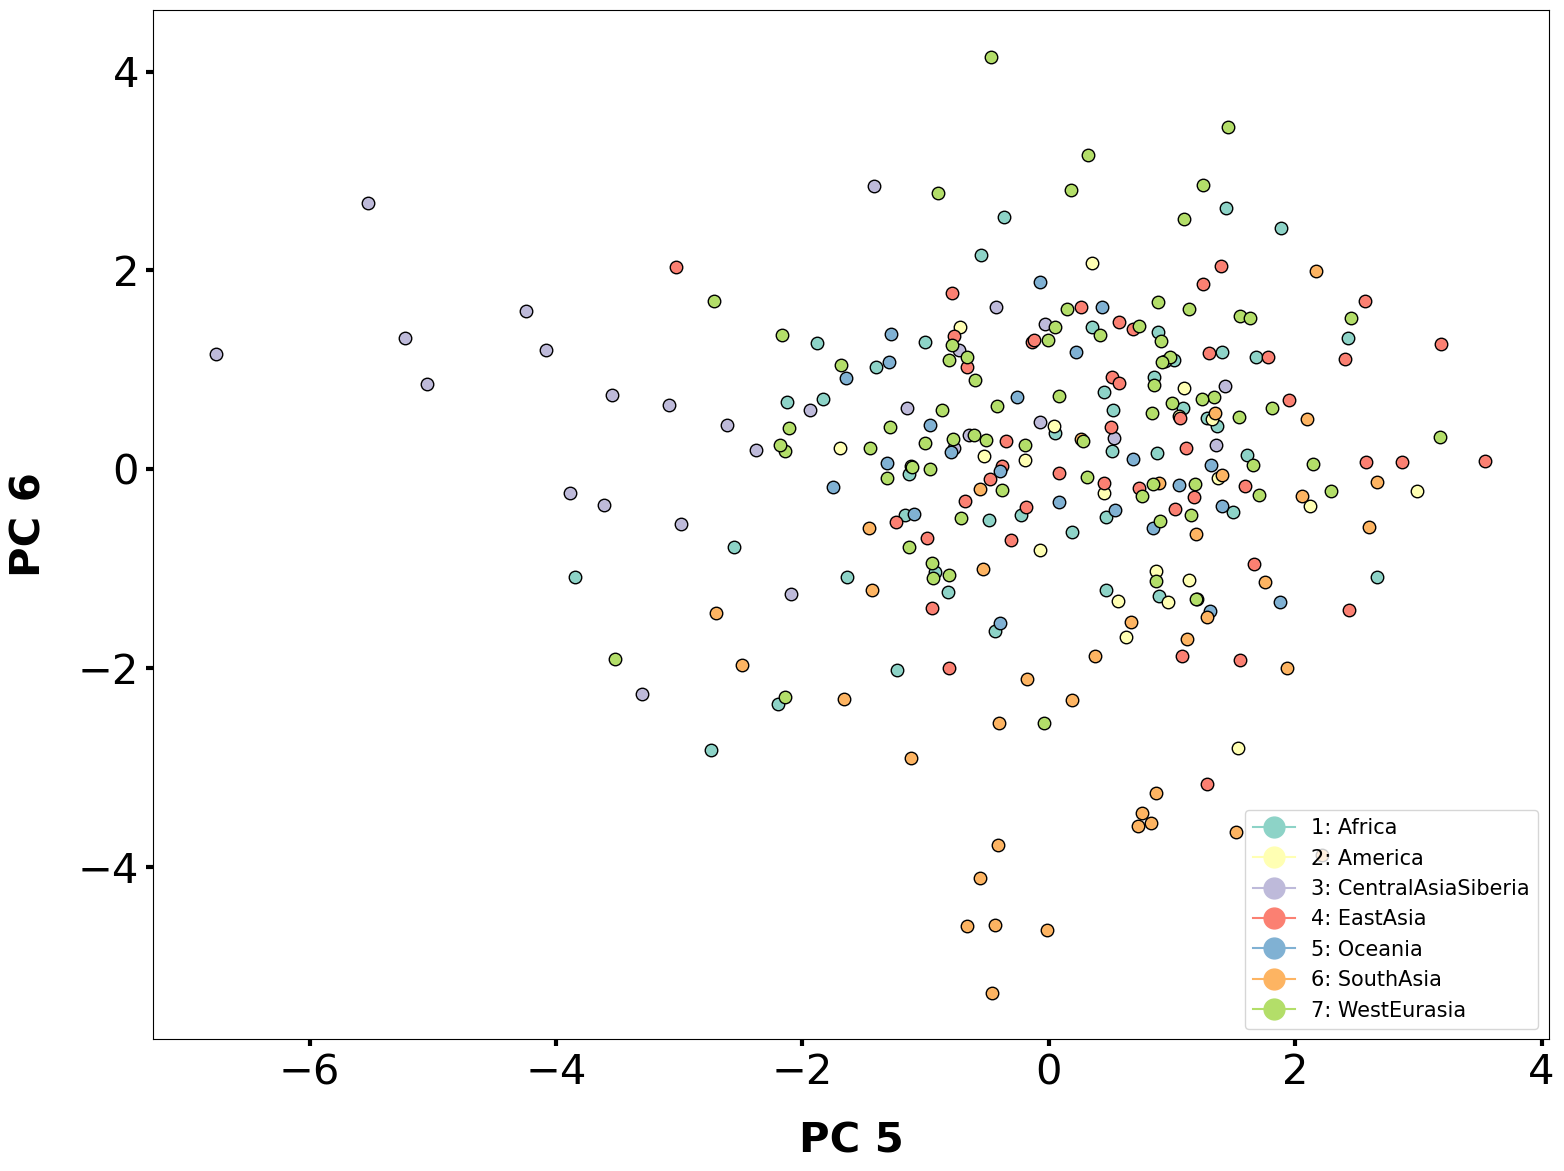

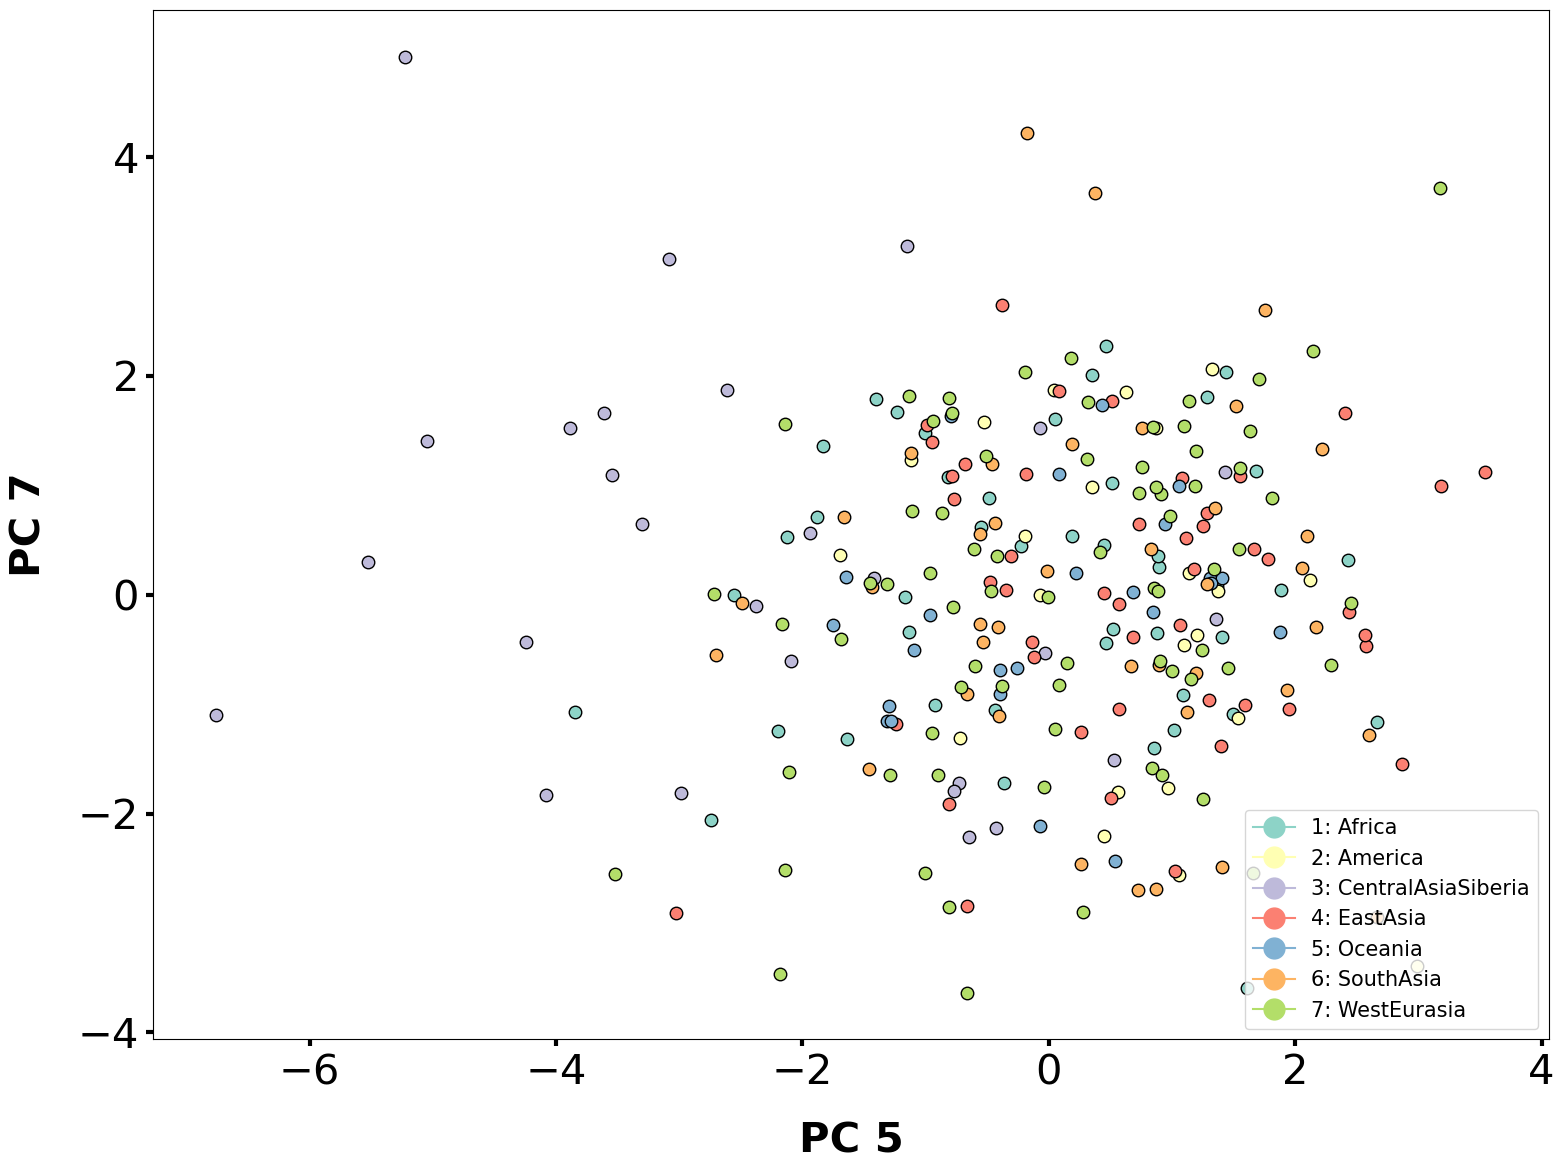

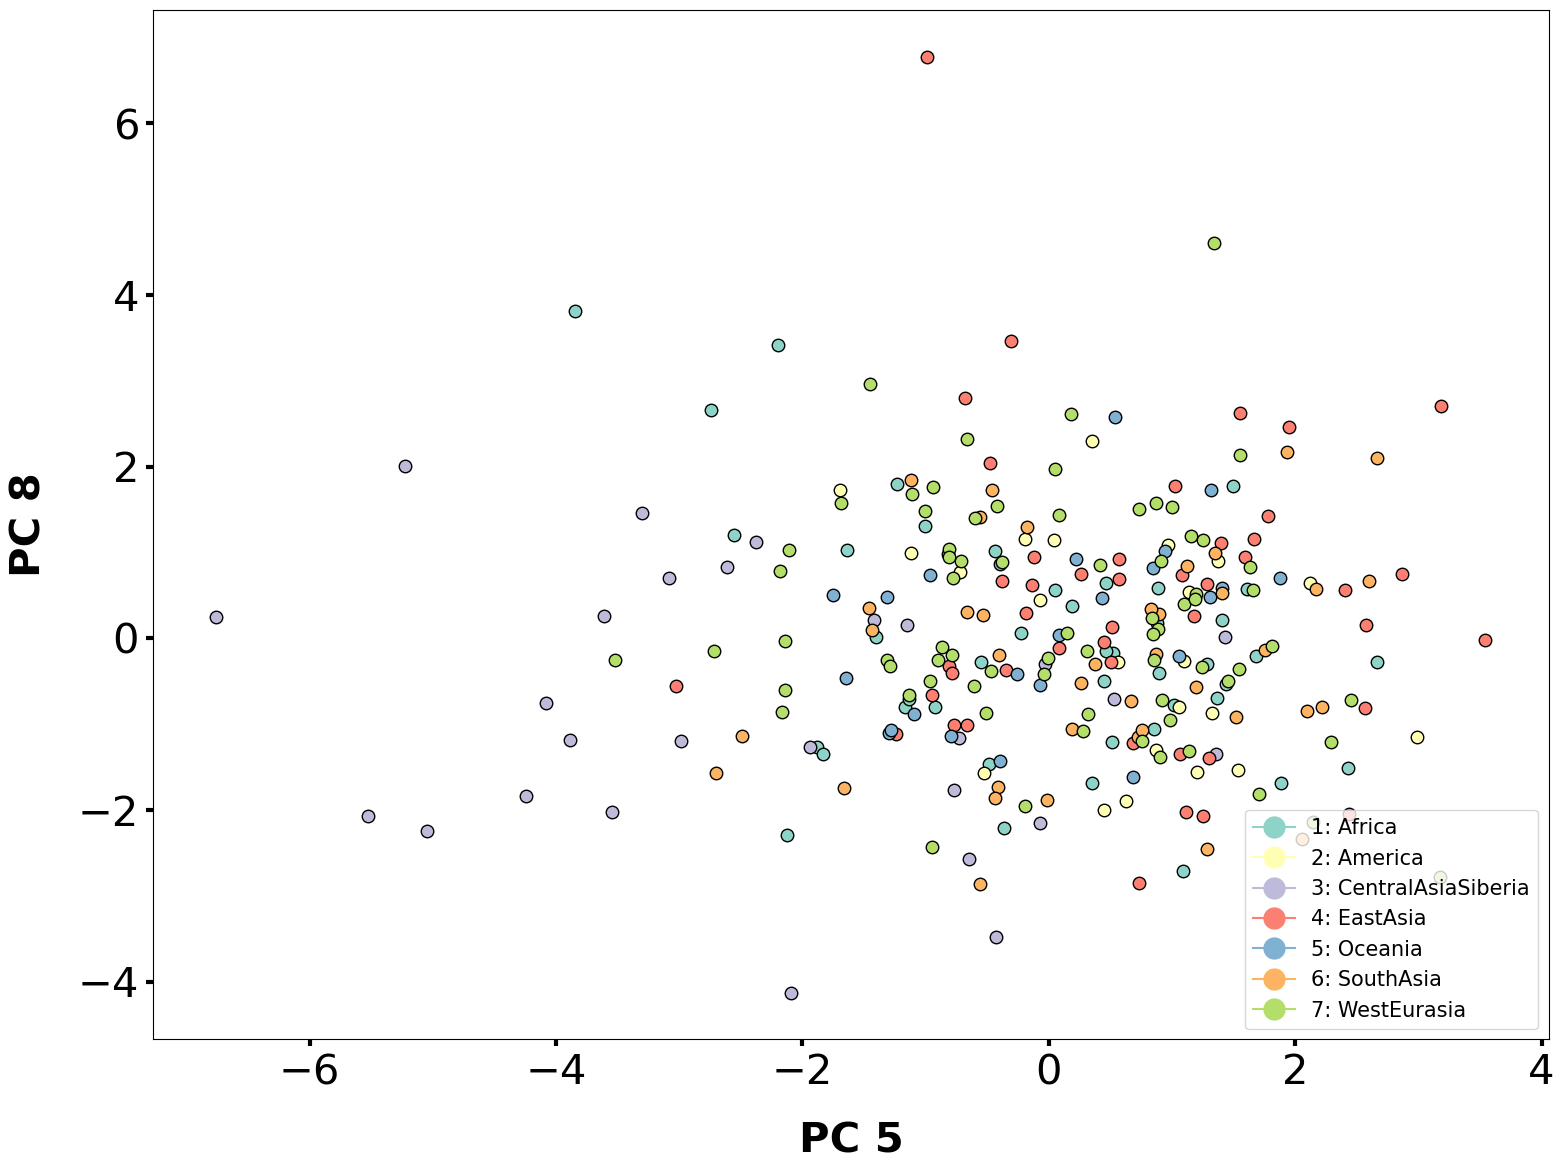

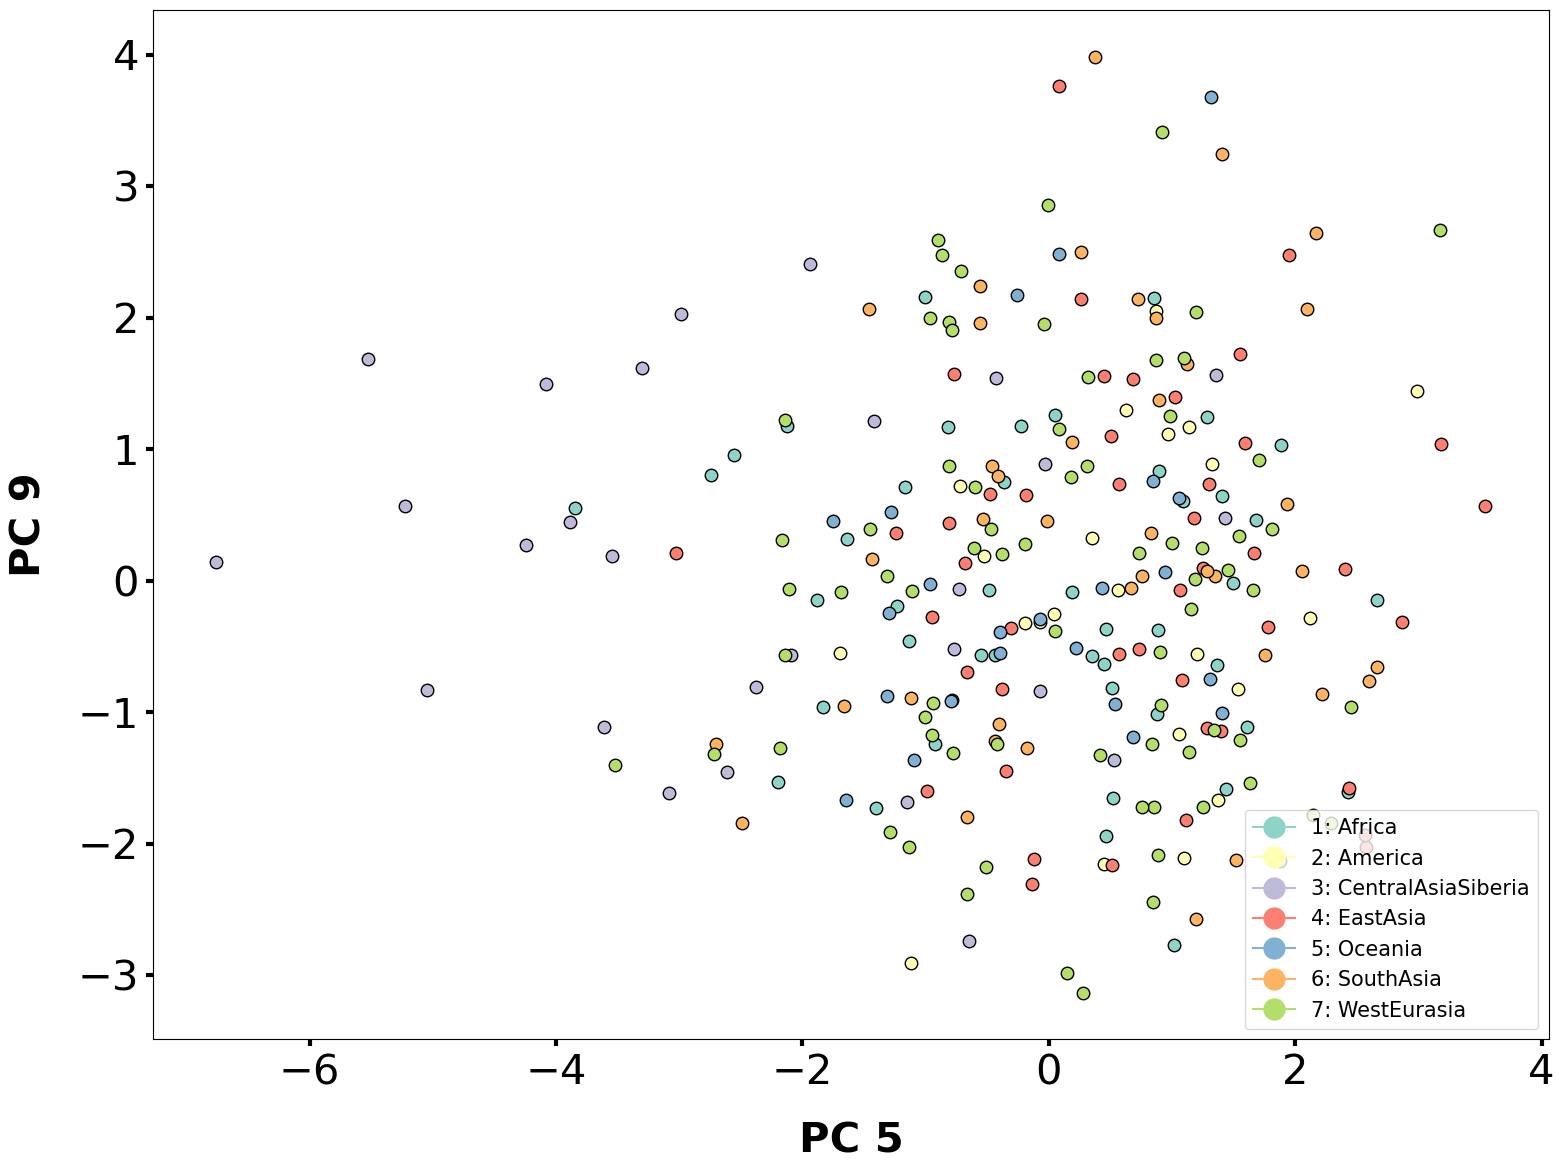

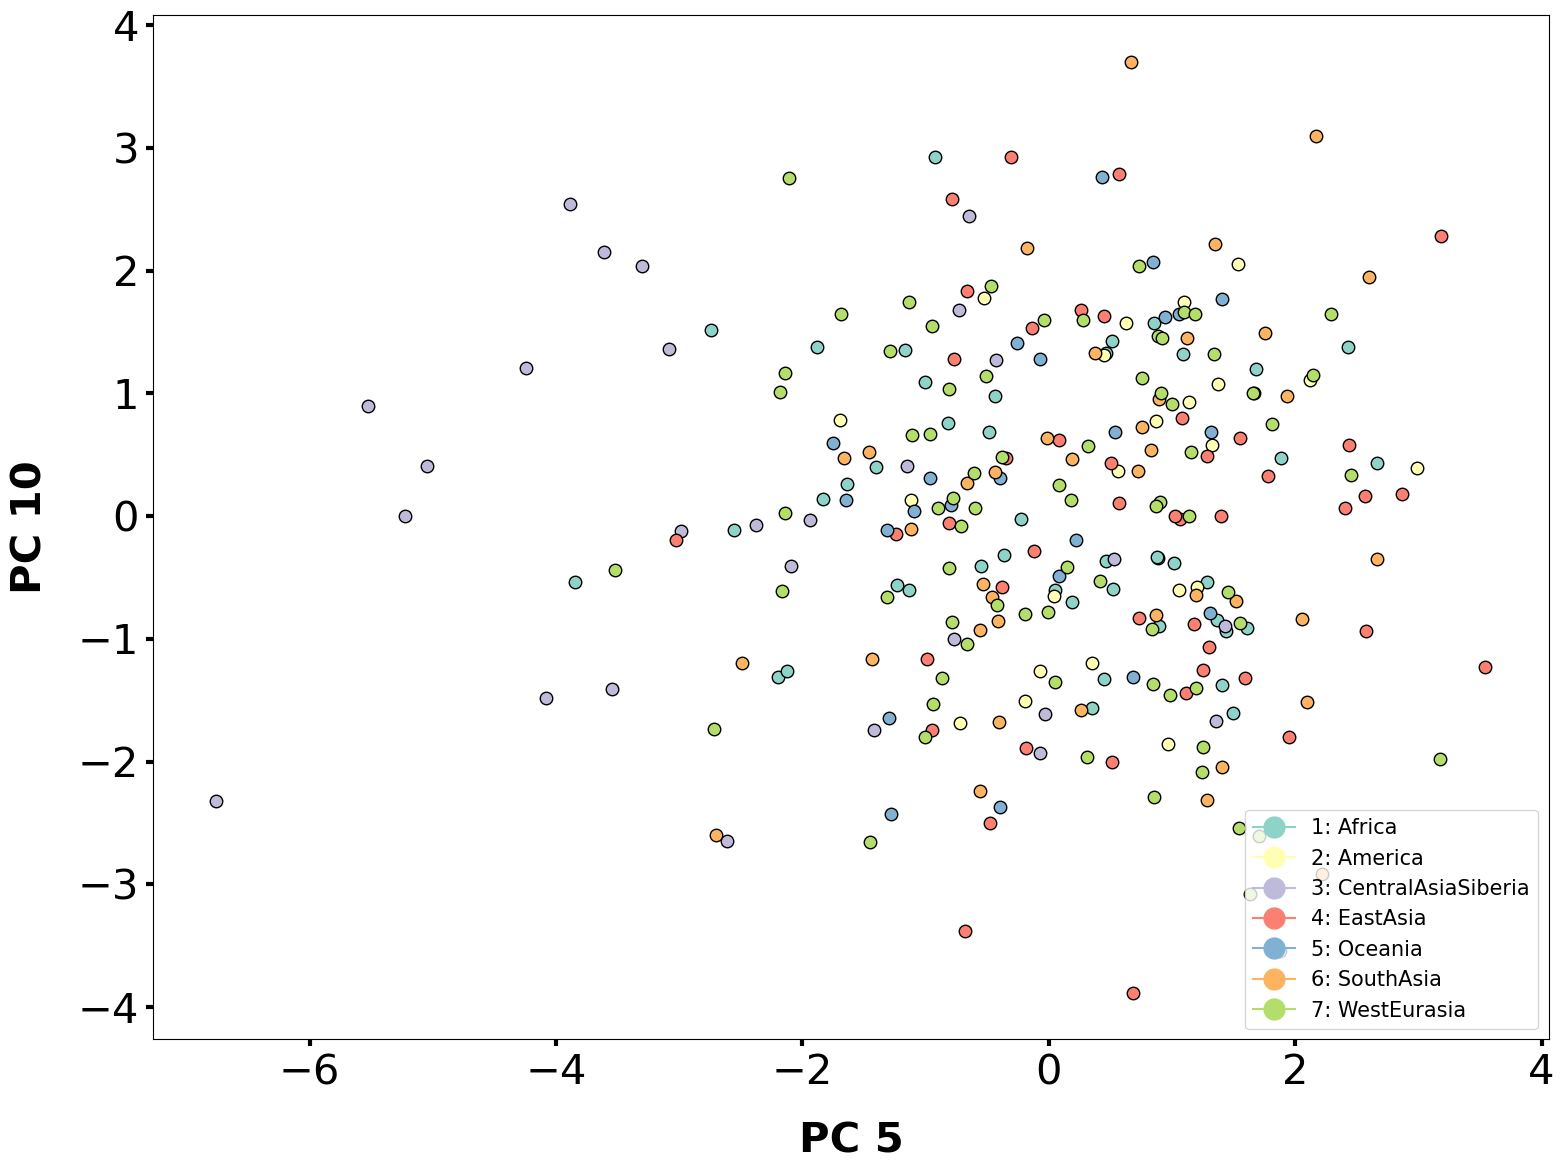

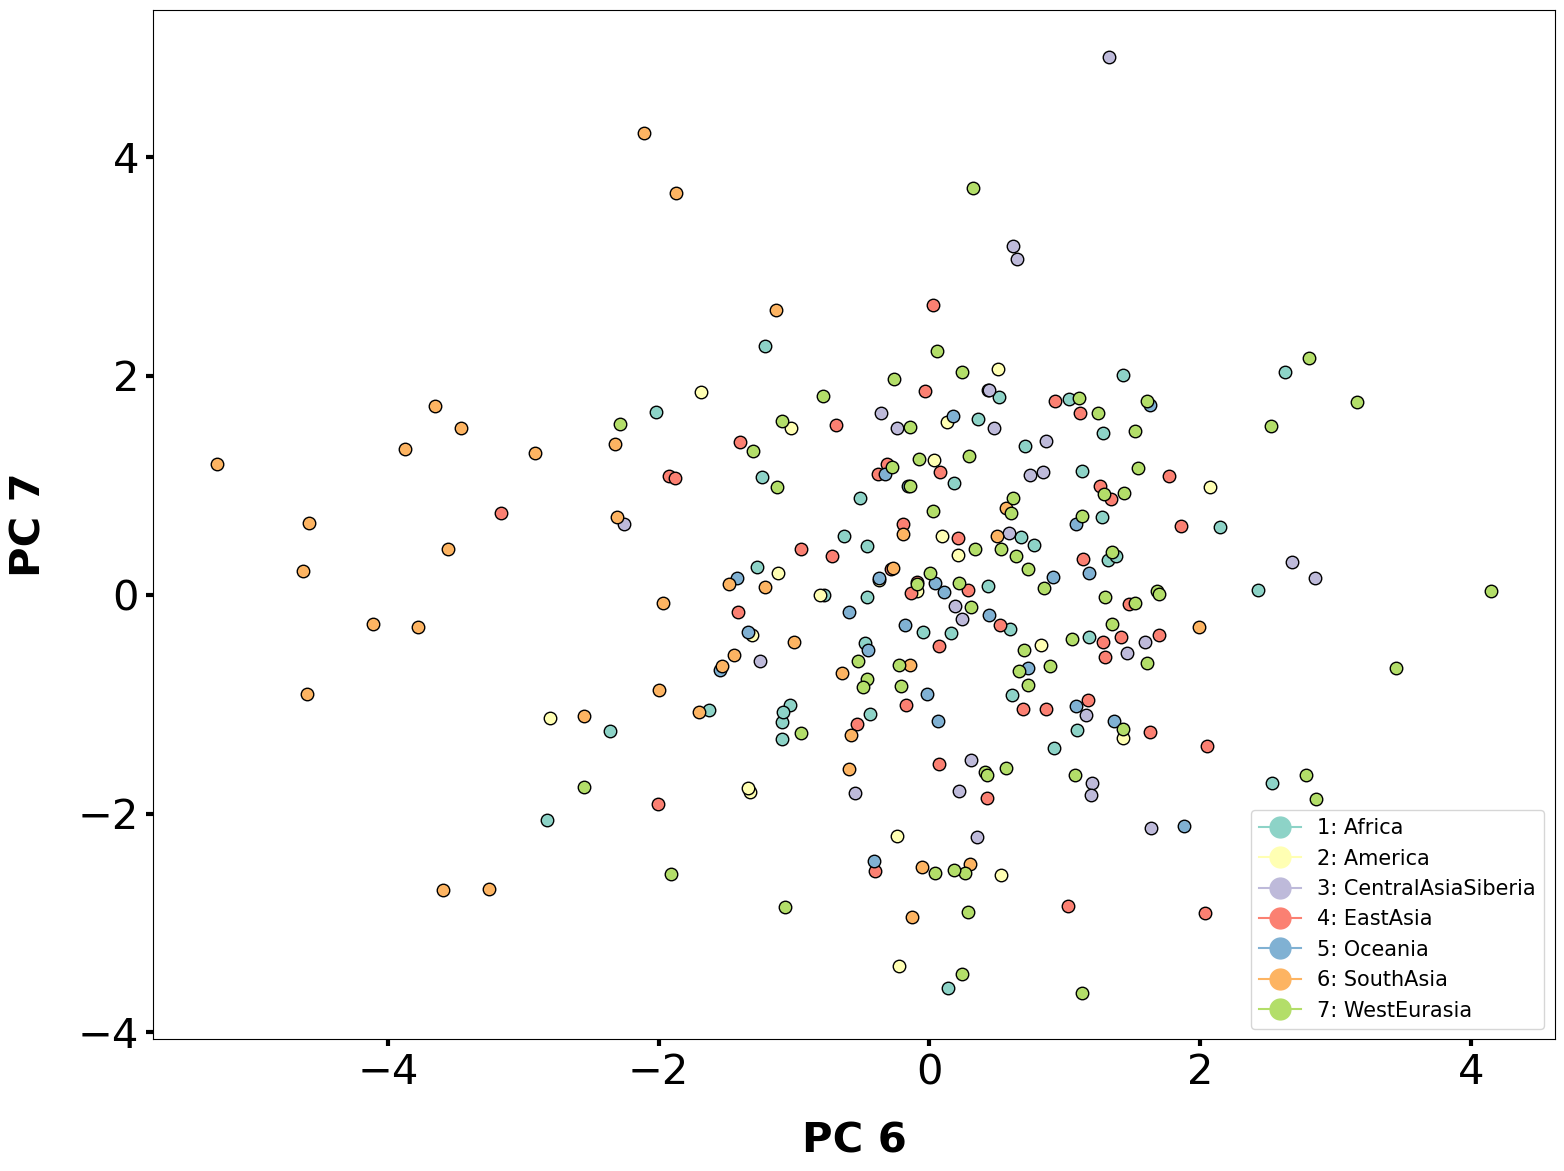

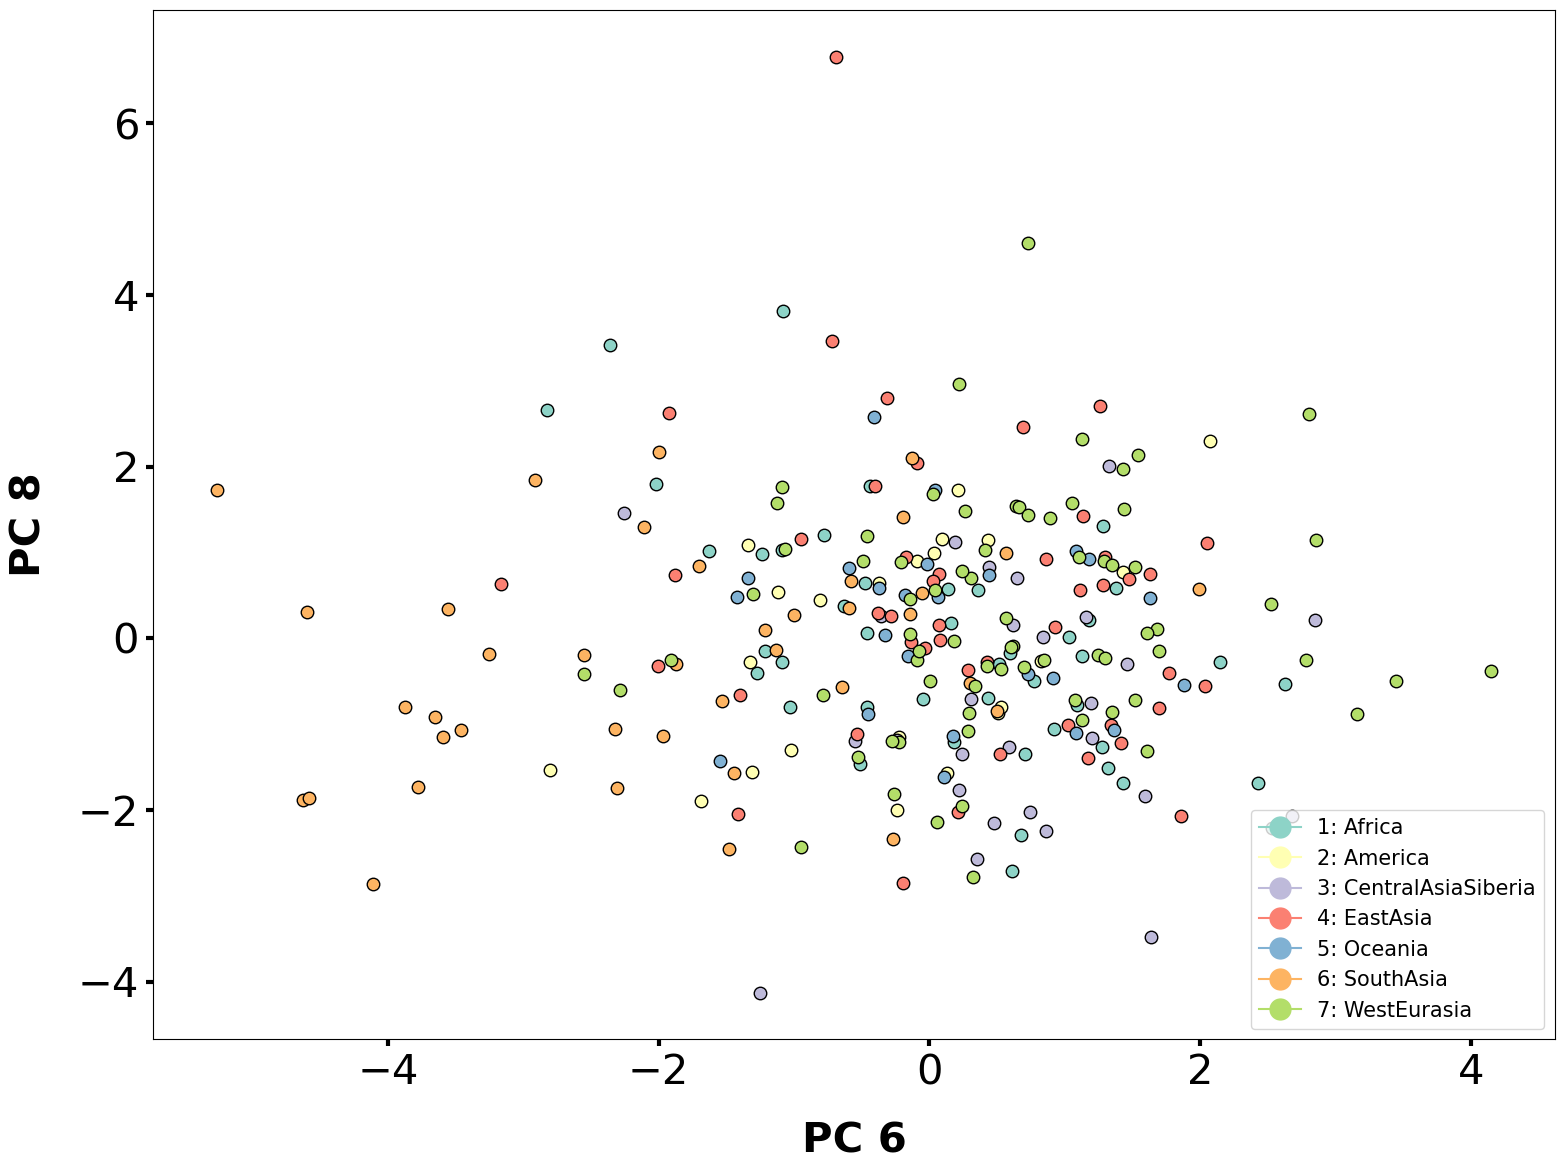

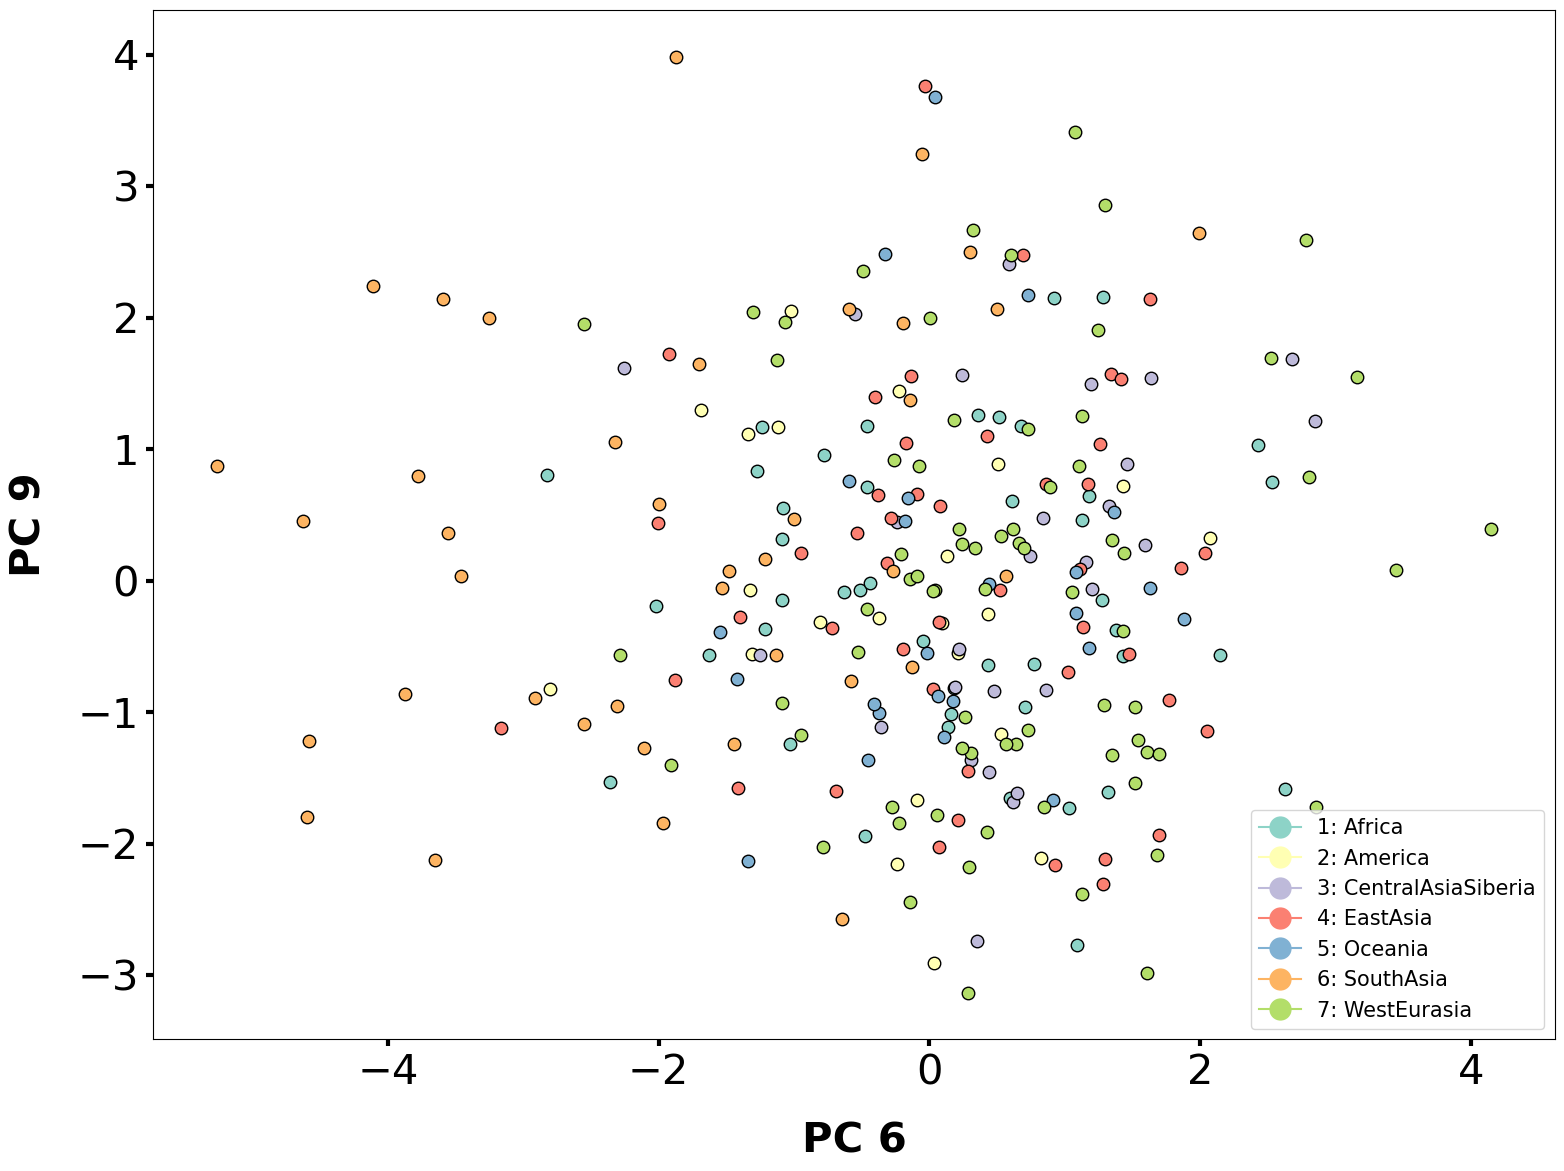

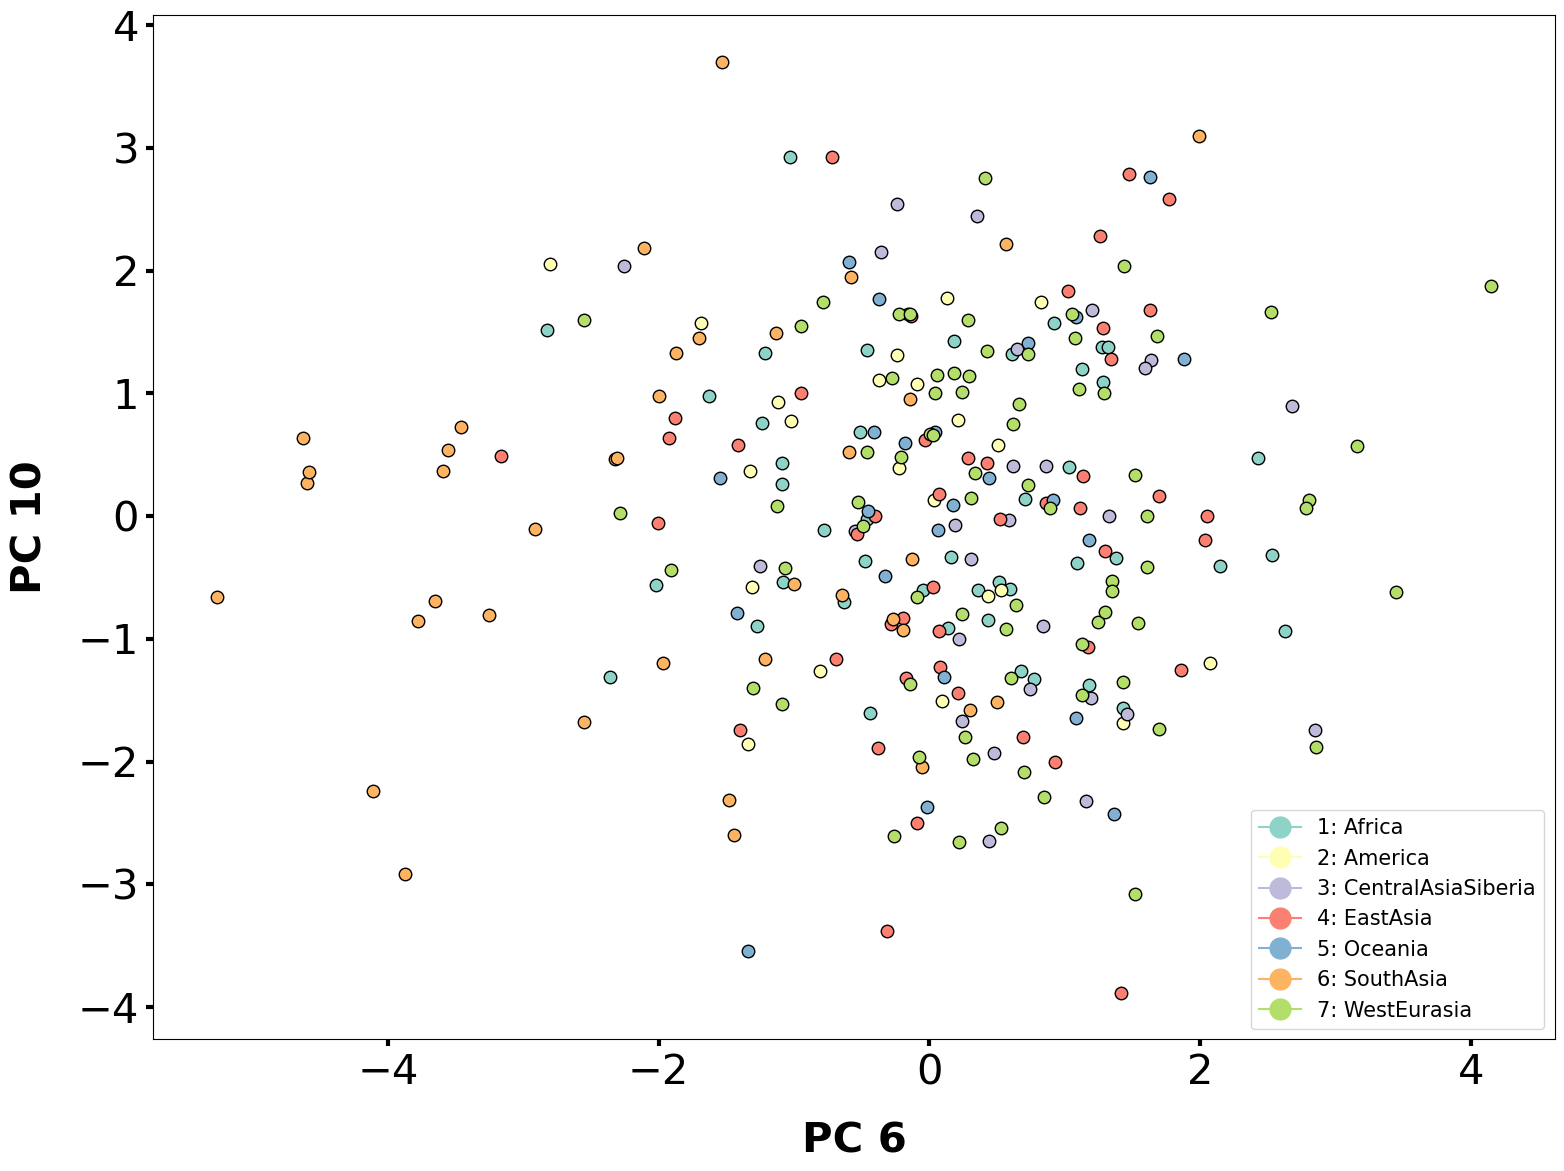

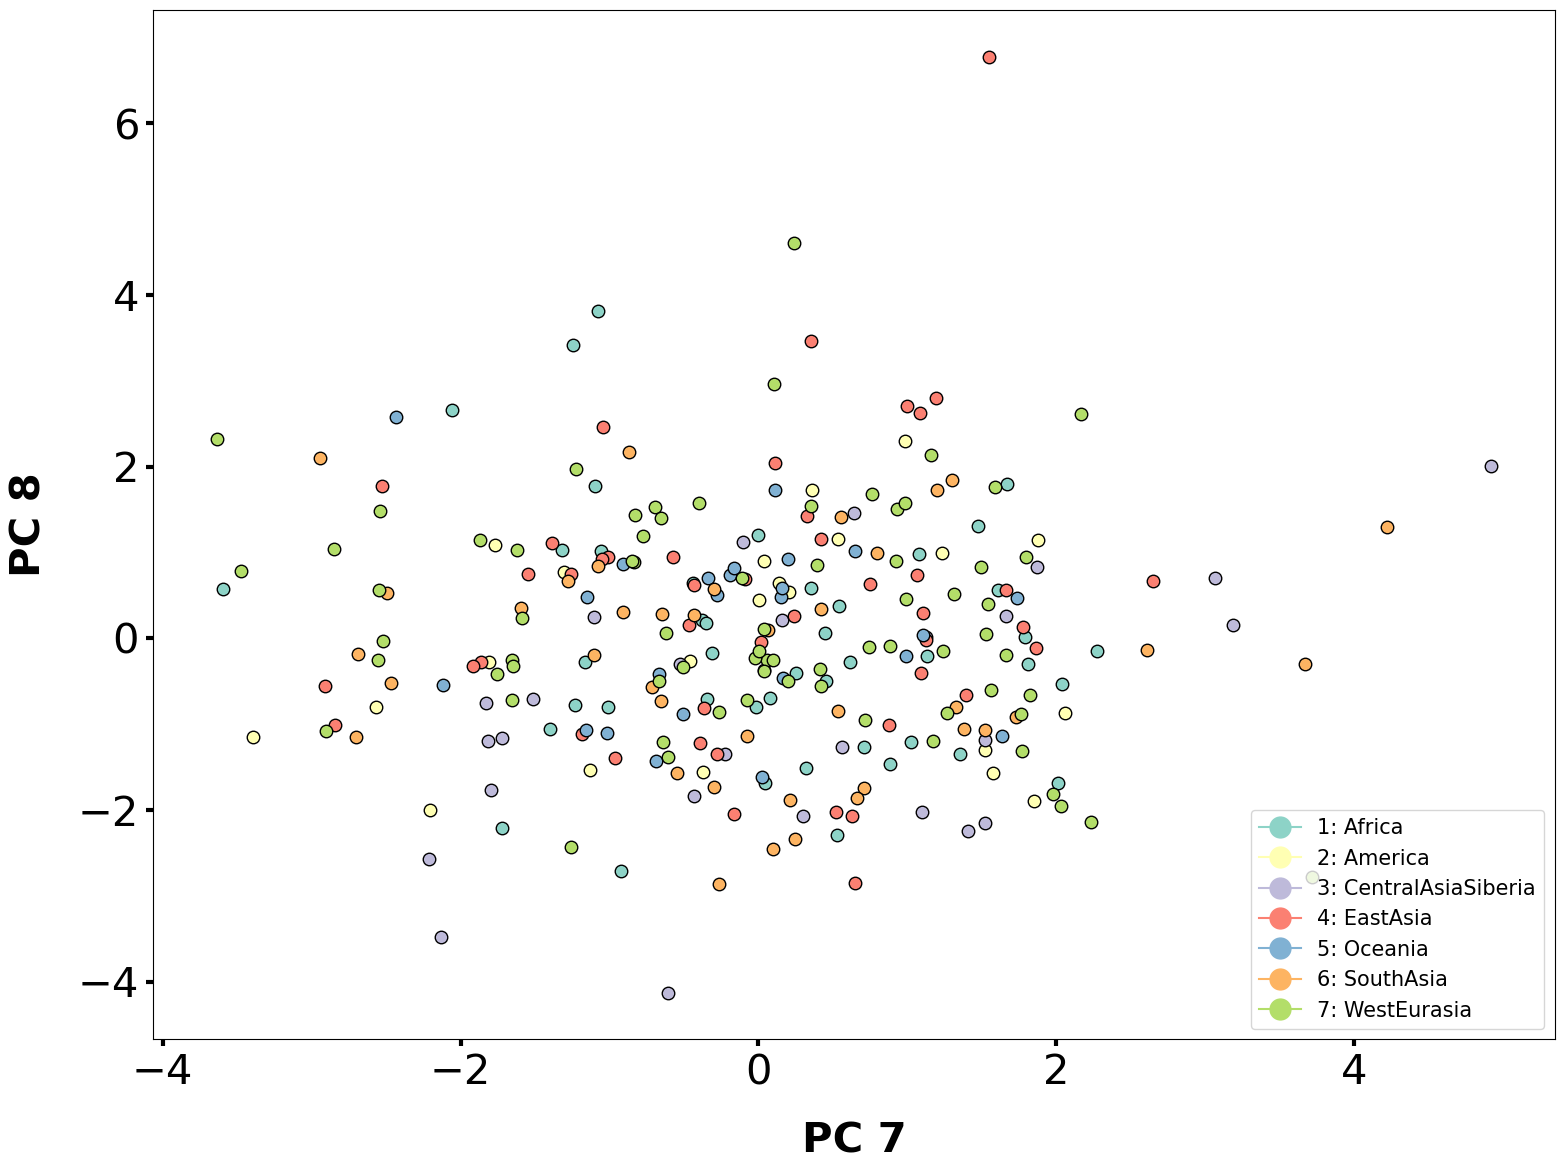

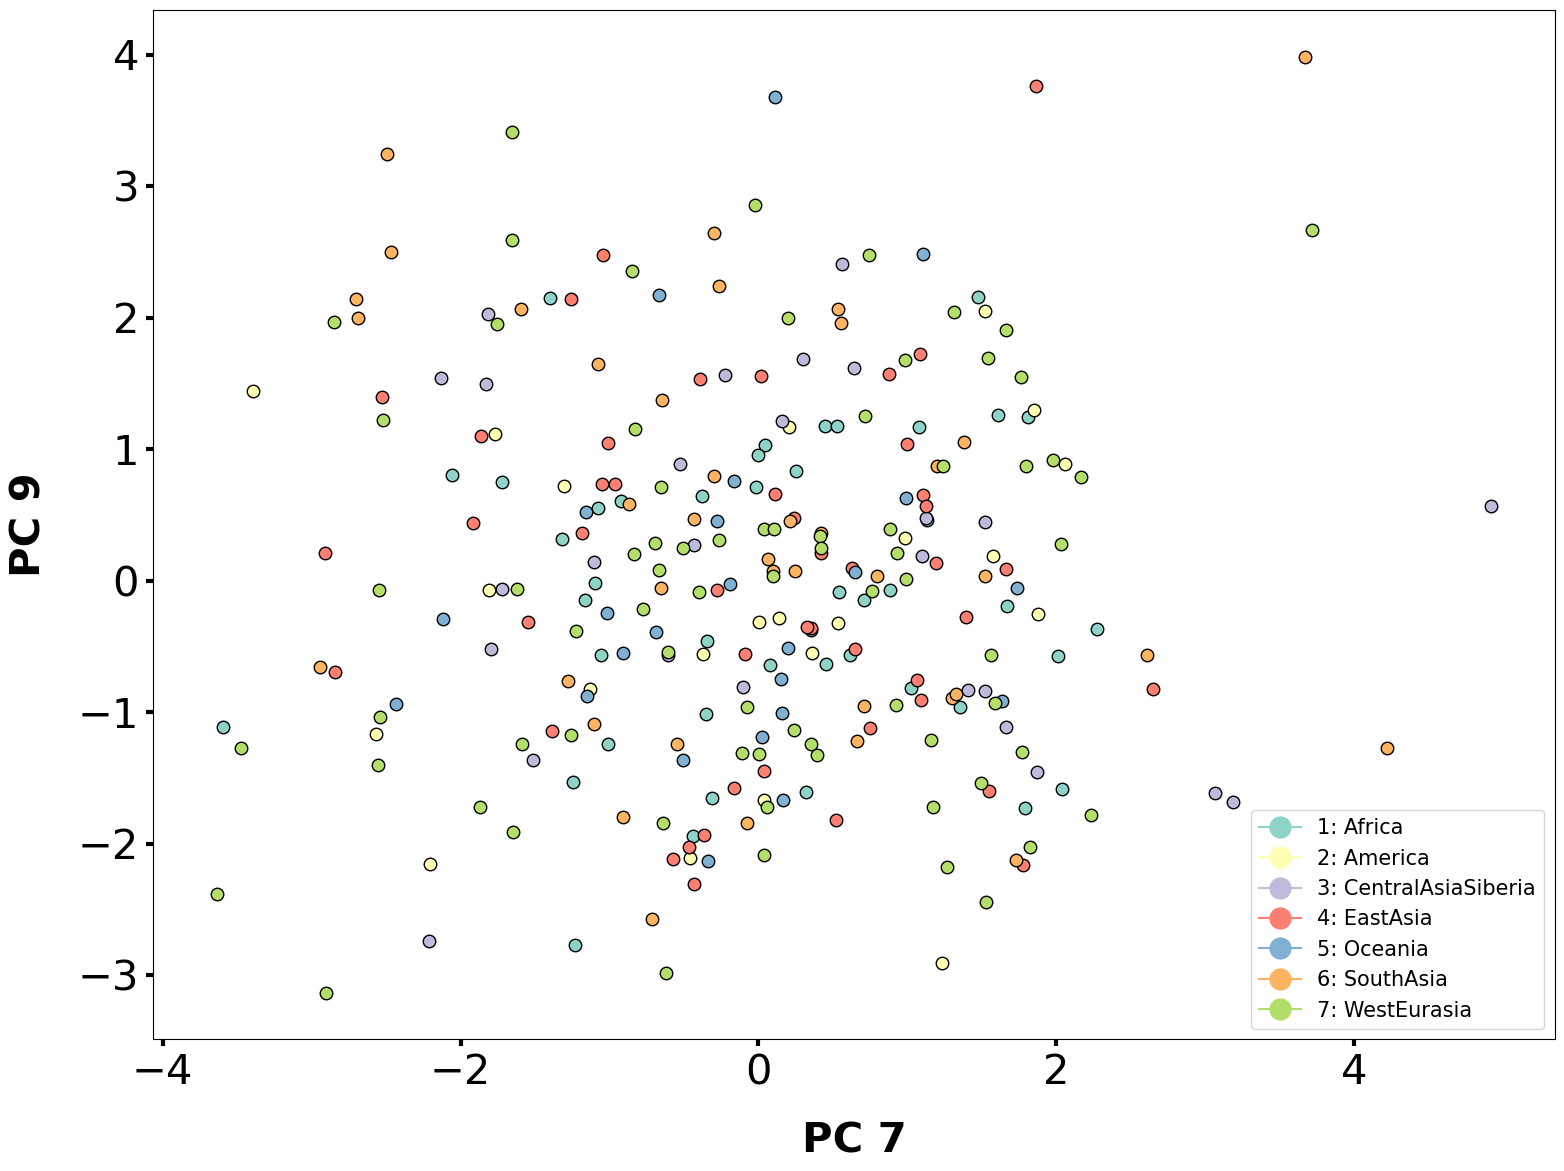

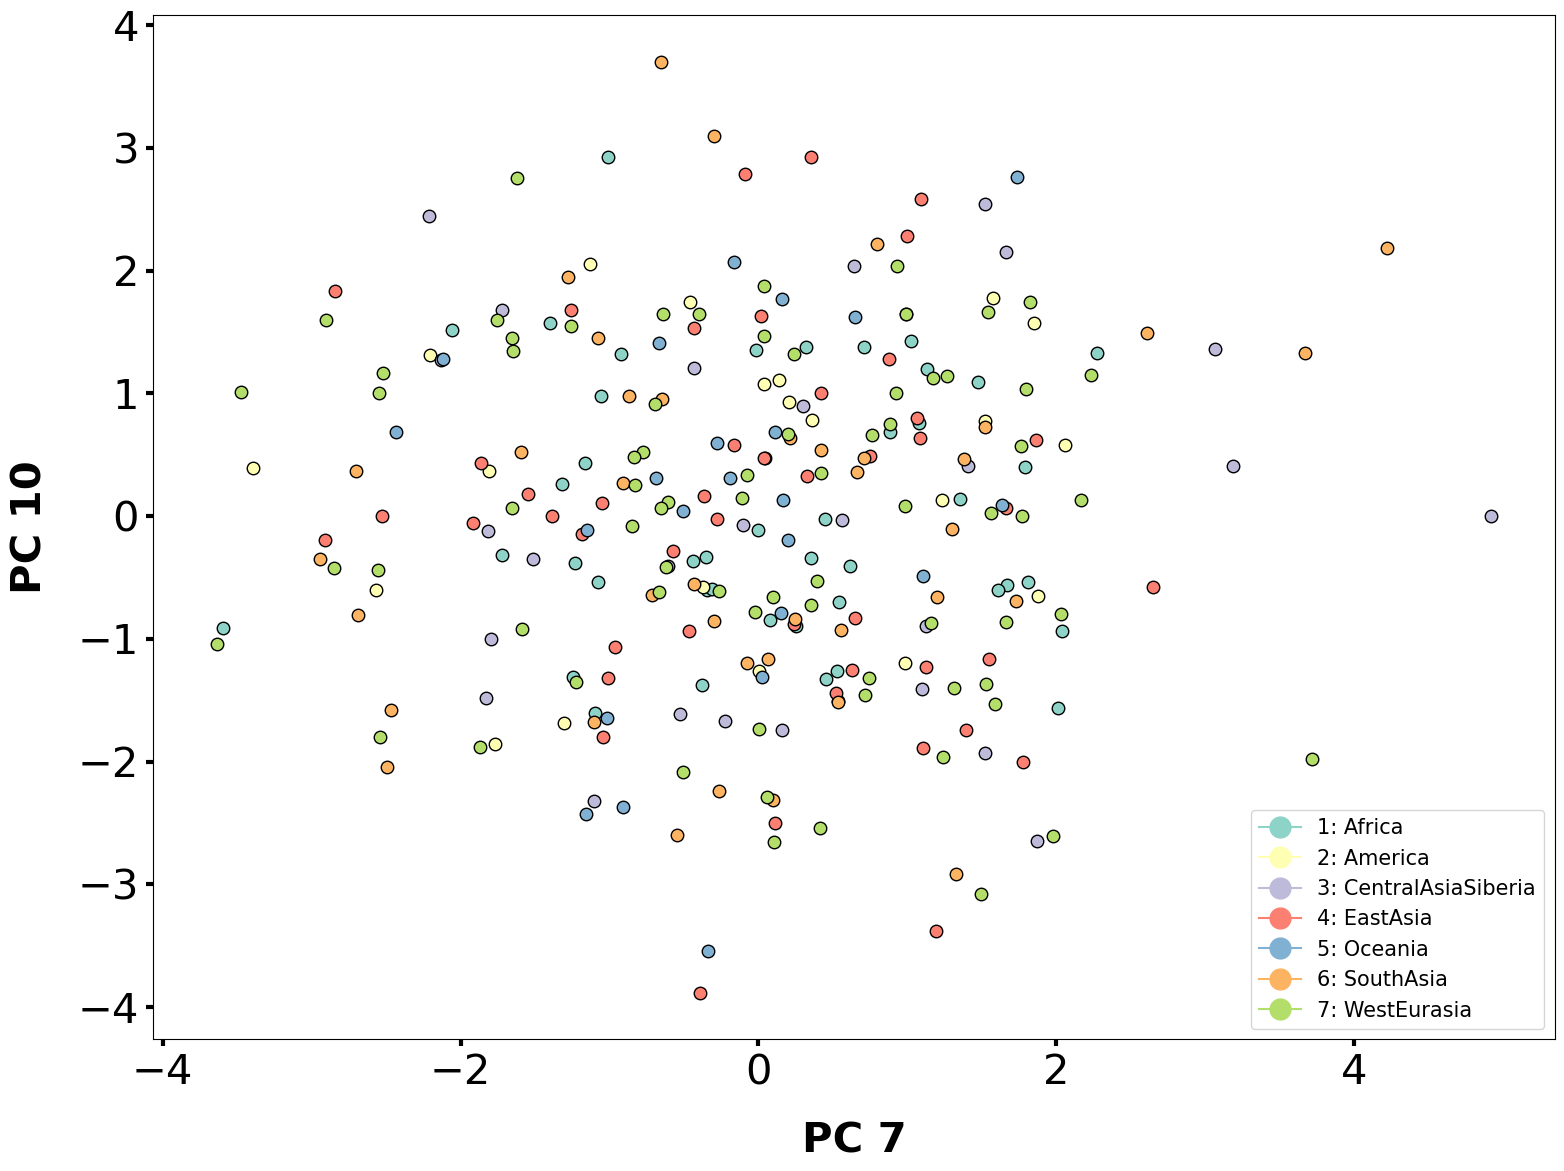

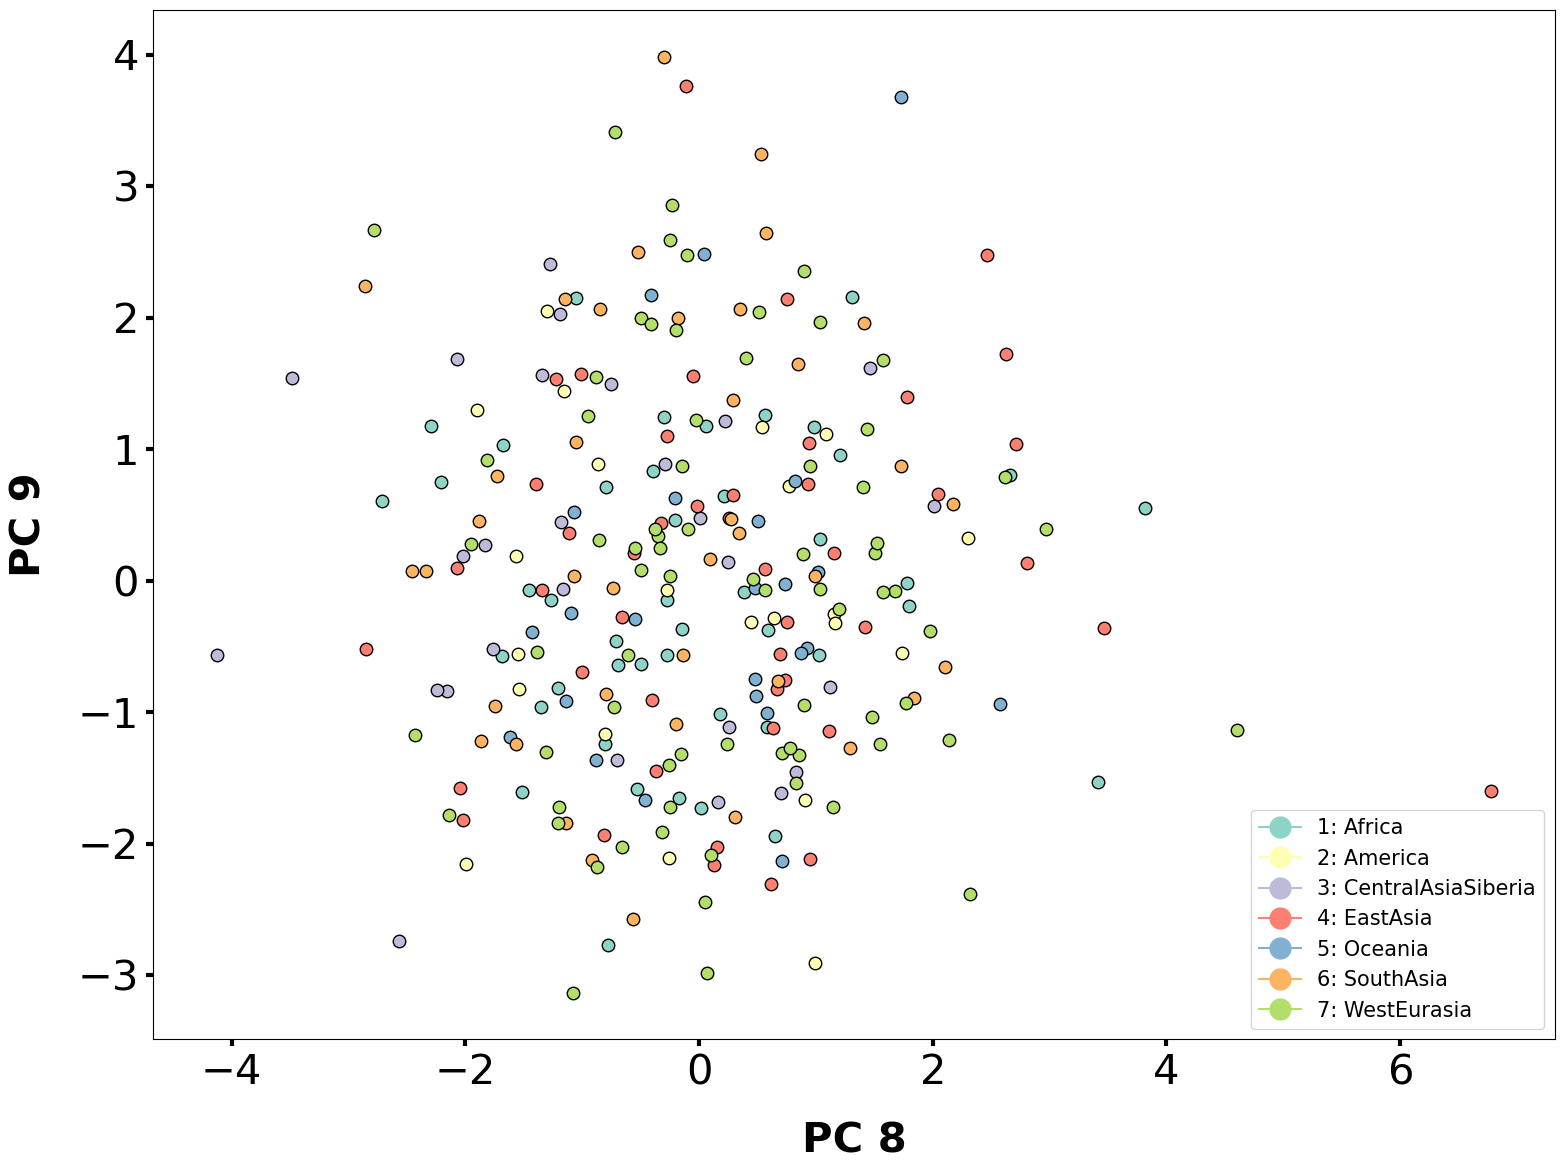

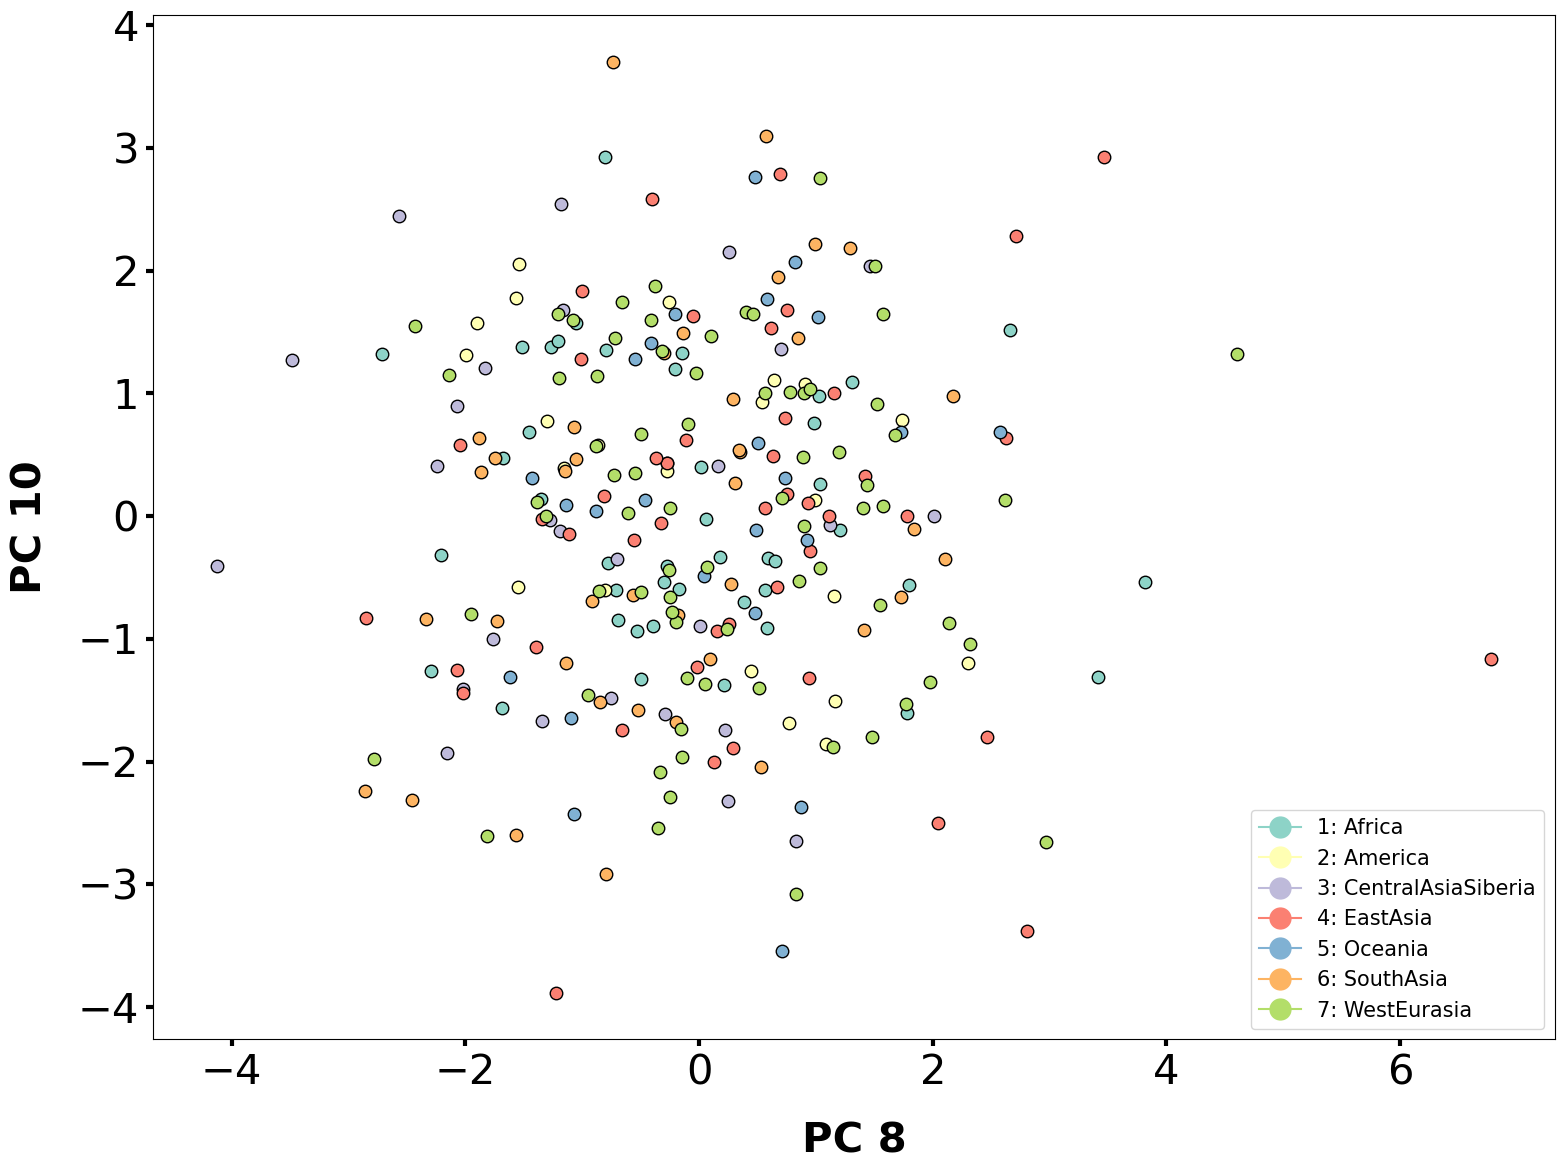

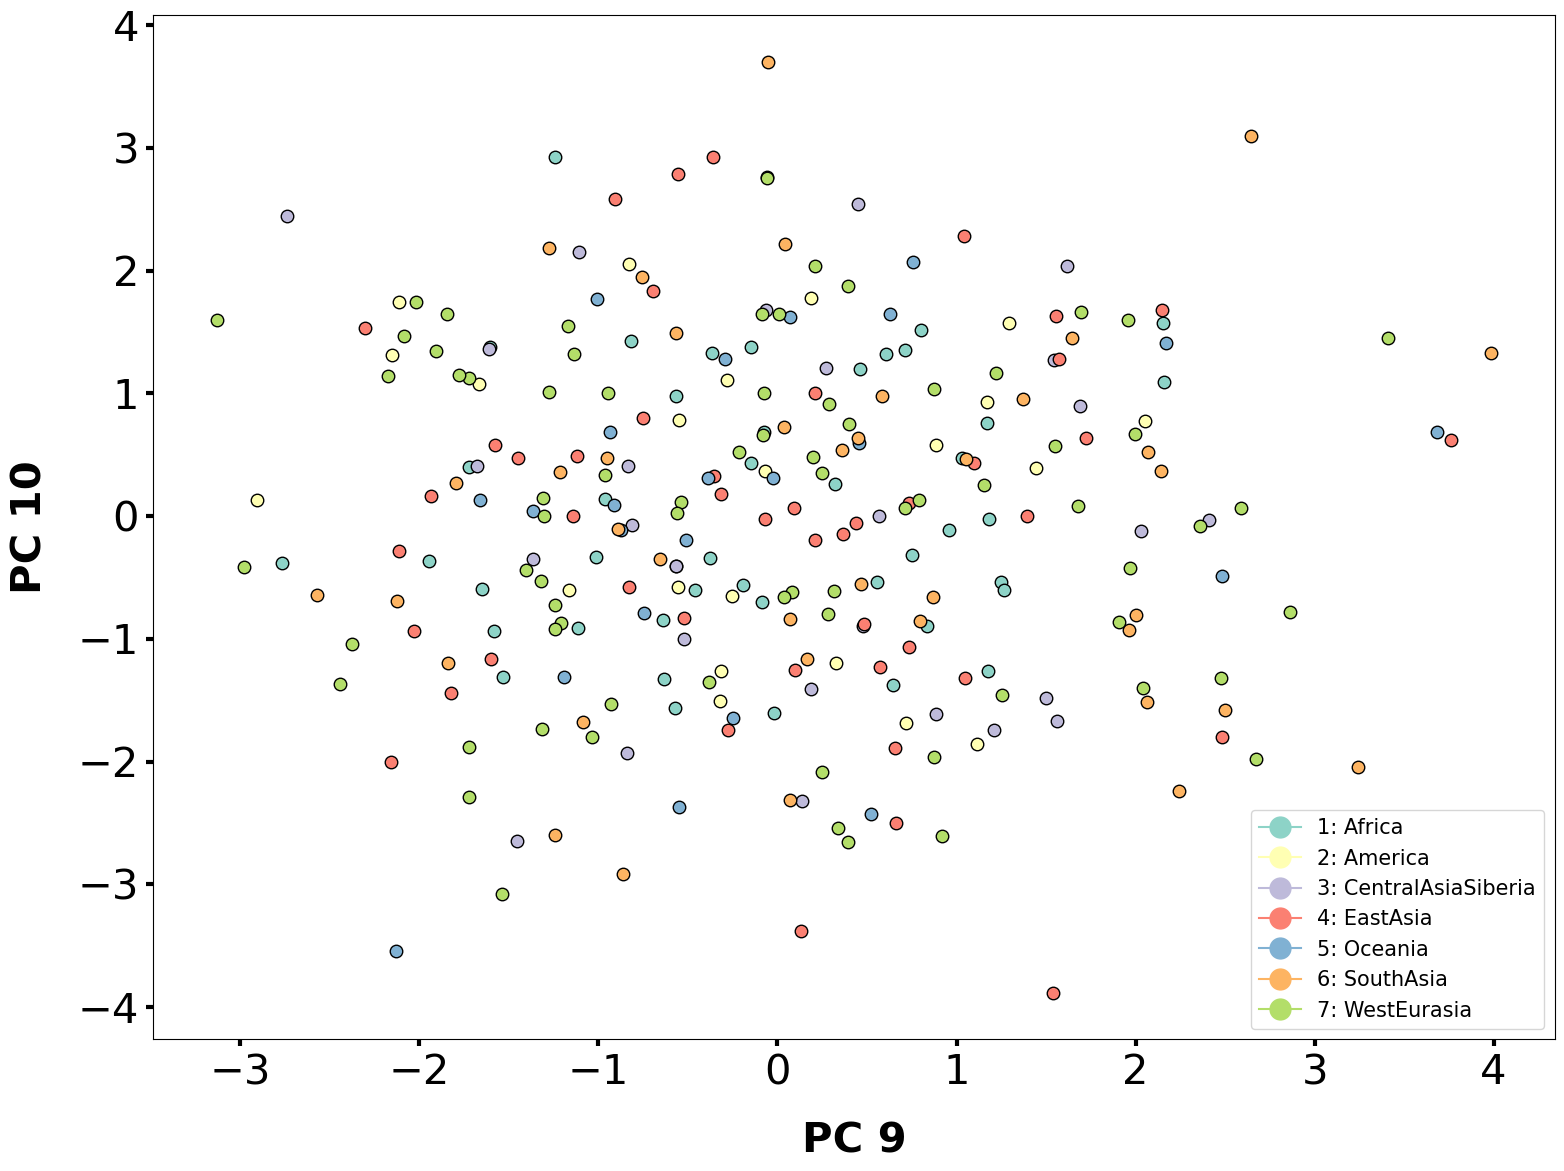

In [48]:
components = [1,2,3,4,5,6,7,8,9,10]

combinations_components = list(combinations(components,2))
for i in combinations_components:
    plot_scatter_cluster(data=df_pca, abscissa='component_'+str(i[0]), ordinate='component_'+str(i[1]), label_horizontal='PC '+ str(i[0]), label_vertical='PC '+str(i[1]), factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
    #print(str(i[0]))

            7-Gender      11-Country  component_1  component_2  component_3  \
10-Region                                                                     
Oceania            F  PapuaNewGuinea    -0.709493    -4.616401    -3.311394   
America            F        Colombia    -4.139471    -0.249102     4.890480   
WestEurasia        M          France    -0.108159     3.658278    -0.835052   
WestEurasia        M  Italy(Bergamo)     0.288656     3.296369    -1.629714   
Africa             M           Congo     9.418528    -1.873549     2.430562   
...              ...             ...          ...          ...          ...   
America            M          Brazil    -3.505509     0.153816     4.605054   
Oceania            M       Australia     1.065919    -6.576702    -5.682091   
Oceania            U       Australia    -0.925270    -5.736379    -4.360503   
America            F          Mexico    -3.992794    -0.324264     4.696945   
Africa             M           Sudan     7.798048   

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/2124056540.py:115: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:
/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/2124056540.py:132: FutureWarning: Creating a Groupby object with a length-1 list-like level parameter will yield indexes as tuples in a future version. To keep indexes as scalars, create Groupby objects with a scalar level parameter instead.
  for name, group in groups:


Text(0.5, 1.0, 'GRCh37 PCA deletions')

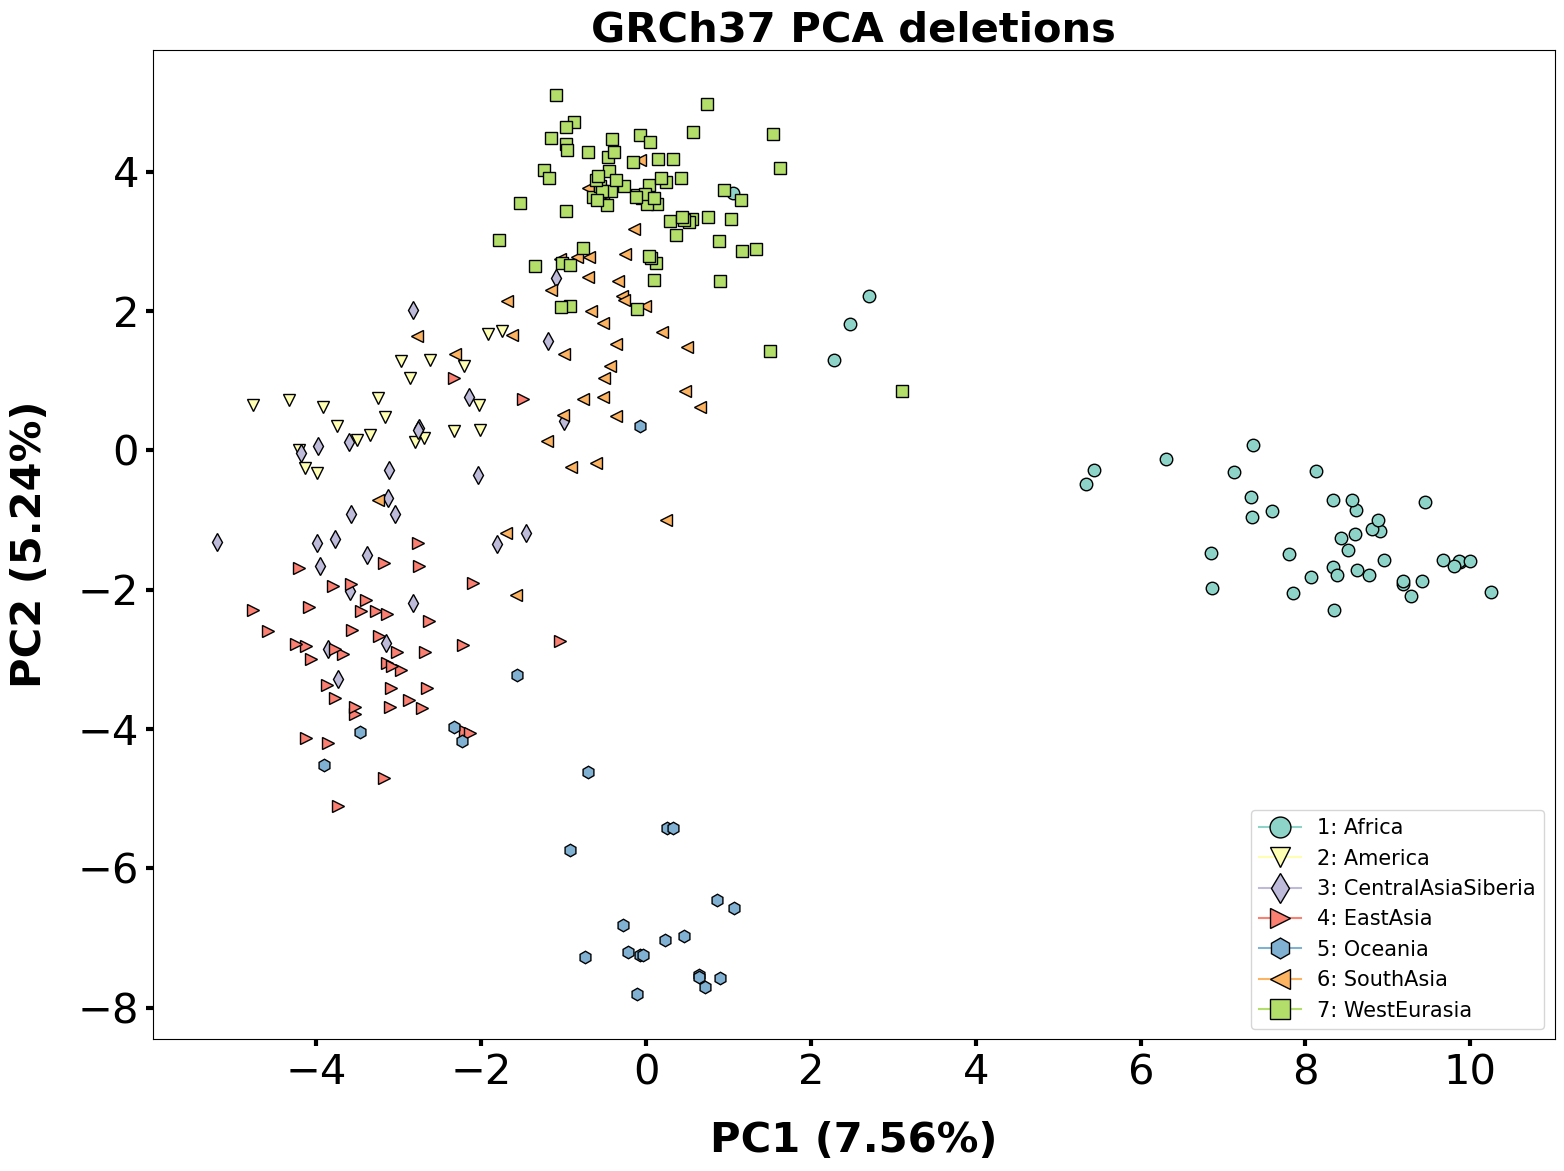

In [49]:
plot_scatter_cluster_shape(data=df_pca, abscissa='component_1', ordinate='component_2', label_horizontal='PC1 (7.56%)', label_vertical='PC2 (5.24%)', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)
plt.title("GRCh37 PCA deletions", size=30, fontweight="bold")

#plt.savefig('../plots/grch37_pca_deletions_pc12.png', transparent=True)

<h2> Vst 

In [10]:
####### Groupby regions #######
dt_group = data_grch37.groupby('10-Region')

dt_groupped = []
regions = anotation['10-Region'].unique()
regions.sort()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    

#### Names to pair-population
regions = data_grch37['10-Region'].unique()
regions.sort()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])
    

for j in dt_groupped:
    j.drop(columns=['10-Region', '11-Country', '7-Gender'], inplace=True)

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/1424340435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j.drop(columns=['10-Region', '11-Country', '7-Gender'], inplace=True)
/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/1424340435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j.drop(columns=['10-Region', '11-Country', '7-Gender'], inplace=True)
/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_9881/1424340435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [11]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        statistic = vst_function((dt_groupped[region[0]]), (dt_groupped[region[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)
vst_dt

0         1         2         3     \
Africa-America                  0.004630       NaN  0.014737  0.001639   
Africa-CentralAsiaSiberia       0.015446  0.023280  0.028582  0.004956   
Africa-EastAsia                 0.004370  0.010747  0.009661  0.000876   
Africa-Oceania                  0.068536  0.027363  0.040874  0.000770   
Africa-SouthAsia                0.003003  0.026760  0.010545  0.033239   
Africa-WestEurasia              0.005233  0.005196  0.005293  0.003879   
America-CentralAsiaSiberia      0.001171  0.016975  0.003030  0.015189   
America-EastAsia                0.013326  0.007138  0.001022  0.005034   
America-Oceania                 0.078340  0.020370  0.110842  0.000180   
America-SouthAsia               0.012387  0.018363  0.003489  0.060092   
America-WestEurasia             0.012200  0.003206  0.007165  0.009901   
CentralAsiaSiberia-EastAsia     0.030045  0.004810  0.005721  0.001974   
CentralAsiaSiberia-Oceania      0.129010  0.000283  0.156583  0.011721   
CentralAsiaSiberia-SouthAsia    0.030770  0.000228  0.019469  0.045139   
CentralAsiaSiberia-WestEurasia  0.024821  0.014633  0.021691  0.000114   
EastAsia-Oceania                0.037190  0.003224  0.090146  0.003345   
EastAsia-SouthAsia              0.000188  0.003941  0.000115  0.028643   
EastAsia-WestEurasia            0.000146  0.003156  0.002231  0.001102   
Oceania-SouthAsia               0.046185  0.000007  0.116416  0.053279   
Oceania-WestEurasia             0.026396  0.013503  0.093126  0.007596   
SouthAsia-WestEurasia           0.000598  0.015597  0.002012  0.017743   

                                    4         5     6     7         8     \
Africa-America                  0.025654  0.001316   NaN   NaN       NaN   
Africa-CentralAsiaSiberia       0.000424  0.035011   NaN   NaN       NaN   
Africa-EastAsia                 0.005281  0.014054   NaN   NaN       NaN   
Africa-Oceania                  0.007135  0.000306   NaN   NaN  0.027363   
Africa-SouthAsia                0.016419  0.047915   NaN   NaN  0.013759   
Africa-WestEurasia              0.006149  0.009301   NaN   NaN  0.005196   
America-CentralAsiaSiberia      0.027566  0.029931   NaN   NaN       NaN   
America-EastAsia                0.046012  0.005763   NaN   NaN       NaN   
America-Oceania                 0.068651  0.002993   NaN   NaN  0.020370   
America-SouthAsia               0.078569  0.039938   NaN   NaN  0.009402   
America-WestEurasia             0.037761  0.002494   NaN   NaN  0.003206   
CentralAsiaSiberia-EastAsia     0.008152  0.011638   NaN   NaN       NaN   
CentralAsiaSiberia-Oceania      0.012448  0.047865   NaN   NaN  0.022500   
CentralAsiaSiberia-SouthAsia    0.022104  0.001068   NaN   NaN  0.010651   
CentralAsiaSiberia-WestEurasia  0.008023  0.008625   NaN   NaN  0.003736   
EastAsia-Oceania                0.000157  0.018233   NaN   NaN  0.027778   
EastAsia-SouthAsia              0.002718  0.019216   NaN   NaN  0.014042   
EastAsia-WestEurasia            0.000077  0.000269   NaN   NaN  0.005340   
Oceania-SouthAsia               0.001466  0.061189   NaN   NaN  0.010181   
Oceania-WestEurasia             0.000013  0.010869   NaN   NaN  0.007213   
SouthAsia-WestEurasia           0.001685  0.014168   NaN   NaN  0.000016   

                                9     ...      7770          7771  7772  \
Africa-America                   NaN  ...  0.004323  0.000000e+00   NaN   
Africa-CentralAsiaSiberia        NaN  ...  0.024985  2.840813e-02   NaN   
Africa-EastAsia                  NaN  ...  0.008887  9.327668e-03   NaN   
Africa-Oceania                   NaN  ...  0.001161  1.535241e-02   NaN   
Africa-SouthAsia                 NaN  ...  0.030691  9.332906e-03   NaN   
Africa-WestEurasia               NaN  ...  0.005829  1.805146e-03   NaN   
America-CentralAsiaSiberia       NaN  ...  0.052224  3.917379e-02   NaN   
America-EastAsia                 NaN  ...  0.024830  9.553977e-03   NaN   
America-Oceania                  NaN  ...  0.009925  2.1042

In [12]:
filtering_vst = pd.DataFrame(vst_dt)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)
filtering_vst


28     29     38     43     66     169   \
Africa-America                   True   True  False  False  False   True   
Africa-CentralAsiaSiberia       False  False  False  False  False  False   
Africa-EastAsia                 False  False  False  False   True  False   
Africa-Oceania                  False  False  False  False   True  False   
Africa-SouthAsia                False  False  False  False  False  False   
Africa-WestEurasia              False  False  False  False  False  False   
America-CentralAsiaSiberia      False  False   True  False  False  False   
America-EastAsia                 True  False  False  False   True  False   
America-Oceania                  True  False  False  False   True  False   
America-SouthAsia                True  False  False  False  False   True   
America-WestEurasia              True  False  False  False  False   True   
CentralAsiaSiberia-EastAsia      True  False  False  False  False  False   
CentralAsiaSiberia-Oceania      False  False  False   True   True  False   
CentralAsiaSiberia-SouthAsia    False  False  False  False  False  False   
CentralAsiaSiberia-WestEurasia   True  False  False  False  False  False   
EastAsia-Oceania                False  False  False   True  False  False   
EastAsia-SouthAsia              False  False  False  False  False  False   
EastAsia-WestEurasia            False  False  False  False  False  False   
Oceania-SouthAsia               False  False  False  False   True  False   
Oceania-WestEurasia             False  False  False  False   True  False   
SouthAsia-WestEurasia           False  False  False  False  False  False   

                                 170    171    202    228   ...   7691   7723  \
Africa-America                   True   True  False  False  ...   True   True   
Africa-CentralAsiaSiberia       False   True  False  False  ...  False   True   
Africa-EastAsia                 False   True  False  False  ...  False   True   
Africa-Oceania                  False   True   True  False  ...  False   True   
Africa-SouthAsia                False  False  False  False  ...  False  False   
Africa-WestEurasia              False  False  False  False  ...  False  False   
America-CentralAsiaSiberia      False  False  False   True  ...   True  False   
America-EastAsia                 True  False  False   True  ...  False  False   
America-Oceania                  True  False  False   True  ...  False  False   
America-SouthAsia                True  False  False   True  ...   True  False   
America-WestEurasia             False   True  False   True  ...   True  False   
CentralAsiaSiberia-EastAsia     False  False  False  False  ...  False  False   
CentralAsiaSiberia-Oceania      False  False  False  False  ...  False  False   
CentralAsiaSiberia-SouthAsia    False  False  False  False  ...  False  False   
CentralAsiaSiberia-WestEurasia  False   True  False  False  ...  False  False   
EastAsia-Oceania                False  False  False  False  ...  False  False   
EastAsia-SouthAsia              False  False  False  False  ...  False  False   
EastAsia-WestEurasia            False   True  False  False  ...  False  False   
Oceania-SouthAsia               False   True  False  False  ...  False  False   
Oceania-WestEurasia             False   True  False  False  ...  False  False   
SouthAsia-WestEurasia           False  False  False  False  ...  False  False   

                                 7731   7752   7753   7758   7762   7765  \
Africa-America                  False  False   True  False   True   True   
Africa-CentralAsiaSiberia       False   True   True  False  False   True   
Africa-EastAsia                 False   True  False  False  False   True   
Africa-Oceania                   True  False  False  False  False  False   
Africa-SouthAsia                False  False   True  False  False  False   
Africa-WestEurasia              False  False  False   True  False  False   
America-CentralAsiaSiberia      False  False 

In [13]:
## Coordinates anotation 
vst_dt = vst_dt.T
vst_dt.insert (0, 'Chromosome', cnv['Chromosome'])
vst_dt.insert (1, 'Start', cnv['Start'])
vst_dt.insert (2, 'End', cnv['End'])
#vst_dt.insert (3, 'Type', cnv['Type'])
vst_dt = vst_dt.round(5)
vst_dt = vst_dt.replace(np.NaN, 0)
#vst_dt.to_csv('../data/vst_results_grch37.csv', index=False)
vst_dt

Chromosome      Start        End  Africa-America  \
0          chr1     176101     176101         0.00463   
1          chr1     449901     449901         0.00000   
2          chr1     665601     665601         0.01474   
3          chr1     891701     891701         0.00164   
4          chr1    1007801    1007801         0.02565   
...         ...        ...        ...             ...   
7775       chr9  140136301  140136301         0.00769   
7776       chr9  140197201  140197201         0.00769   
7777       chr9  140245301  140245301         0.24272   
7778       chr9  140387601  140387601         0.01742   
7779       chr9  140737201  140737201         0.00000   

      Africa-CentralAsiaSiberia  Africa-EastAsia  Africa-Oceania  \
0                       0.01545          0.00437         0.06854   
1                       0.02328          0.01075         0.02736   
2                       0.02858          0.00966         0.04087   
3                       0.00496          0.00088         0.00077   
4                       0.00042          0.00528         0.00714   
...                         ...              ...             ...   
7775                    0.00176          0.02968         0.00287   
7776                    0.00877          0.01175         0.00814   
7777                    0.20920          0.43720         0.24604   
7778                    0.01311          0.02784         0.05795   
7779                    0.00000          0.00000         0.00000   

      Africa-SouthAsia  Africa-WestEurasia  America-CentralAsiaSiberia  ...  \
0              0.00300             0.00523                     0.00117  ...   
1              0.02676             0.00520                     0.01698  ...   
2              0.01054             0.00529                     0.00303  ...   
3              0.03324             0.00388                     0.01519  ...   
4              0.01642             0.00615                     0.02757  ...   
...                ...                 ...                         ...  ...   
7775           0.04227             0.01833                     0.01698  ...   
7776           0.01081             0.01430                     0.00000  ...   
7777           0.35019             0.18928                     0.00332  ...   
7778           0.01615             0.03492                     0.00503  ...   
7779           0.00000             0.00520                     0.00000  ...   

      CentralAsiaSiberia-EastAsia  CentralAsiaSiberia-Oceania  \
0                         0.03004                     0.12901   
1                         0.00481                     0.00028   
2                         0.00572                     0.15658   
3                         0.00197                     0.01172   
4                         0.00815                     0.01245   
...                           ...                         ...   
7775                      0.01586                     0.00014   
7776                      0.00000                     0.00000   
7777                      0.06365                     0.00252   
7778                      0.00815                     0.04592   
7779                      0.00000                     0.00000   

      CentralAsiaSiberia-SouthAsia  CentralAsiaSiberia-WestEurasia  \
0                          0.03077                         0.02482   
1                          0.00023                         0.01463   
2                          0.01947                         0.02169   
3                          0.04514                         0.00011   
4                          0.02210                         0.00802   
...                            ...                             ...   
7775                       0.02636                         0.00978   
7776                       0.00000                         0.00000   
7777                       0.02572                         0.00140   
7778                       0.00000                         0.01057   
777

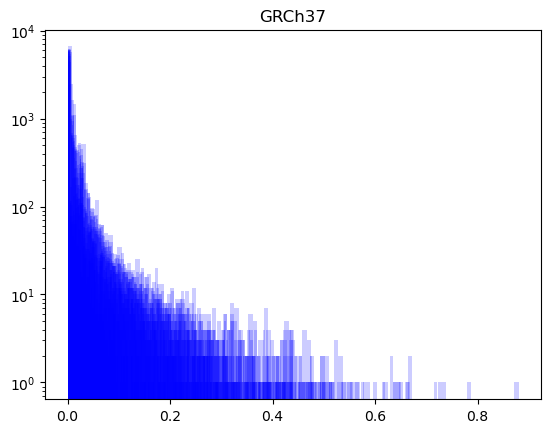

In [14]:
#sns.set_palette("bright")
for i in vst_dt.iloc[:,4:27].columns:
    plt.hist(vst_dt[i], bins=100, alpha=0.2, log=True, color="blue")
    plt.title('GRCh37')
    plt.savefig('../plots/grch37_vst_values_distribution.png.png', transparent=True)

In [15]:
vst_dt_filtering_location = vst_dt.iloc[filtering_vst.columns]
vst_dt_filtering_location#[vst_dt_filtering_location['chr'] == '8'].sort_values(by='WestEurasia-Oceania', ascending=False).head(50)

Chromosome      Start        End  Africa-America  \
28         chr1    8360201    8360201         0.32161   
29         chr1    9846201    9846201         0.27586   
38         chr1   13219701   13219701         0.12209   
43         chr1   16150401   16150401         0.00136   
66         chr1   24377601   24377601         0.00769   
...         ...        ...        ...             ...   
7758       chr9  131183401  131183401         0.08988   
7762       chr9  134074401  134074401         0.24892   
7765       chr9  136453701  136453701         0.26558   
7766       chr9  137097701  137097701         0.00357   
7777       chr9  140245301  140245301         0.24272   

      Africa-CentralAsiaSiberia  Africa-EastAsia  Africa-Oceania  \
28                      0.19993          0.00000         0.00000   
29                      0.04239          0.04981         0.02736   
38                      0.03194          0.00035         0.01716   
43                      0.01265          0.02431         0.16701   
66                      0.11063          0.25742         0.66625   
...                         ...              ...             ...   
7758                    0.07894          0.00025         0.00037   
7762                    0.00807          0.00186         0.06963   
7765                    0.21090          0.25679         0.01753   
7766                    0.09135          0.09335         0.42325   
7777                    0.20920          0.43720         0.24604   

      Africa-SouthAsia  Africa-WestEurasia  America-CentralAsiaSiberia  ...  \
28             0.00000             0.00000                     0.00956  ...   
29             0.09376             0.01048                     0.12424  ...   
38             0.00461             0.03145                     0.25941  ...   
43             0.07339             0.06031                     0.02660  ...   
66             0.13524             0.15024                     0.10092  ...   
...                ...                 ...                         ...  ...   
7758           0.11241             0.33761                     0.00243  ...   
7762           0.01037             0.02543                     0.17743  ...   
7765           0.19511             0.06390                     0.00612  ...   
7766           0.21517             0.18116                     0.05796  ...   
7777           0.35019             0.18928                     0.00332  ...   

      CentralAsiaSiberia-EastAsia  CentralAsiaSiberia-Oceania  \
28                        0.20261                     0.15949   
29                        0.00196                     0.01078   
38                        0.03815                     0.09418   
43                        0.00097                     0.28660   
66                        0.06285                     0.38182   
...                           ...                         ...   
7758                      0.07787                     0.07081   
7762                      0.00206                     0.03050   
7765                      0.00577                     0.10340   
7766                      0.00000                     0.20208   
7777                      0.06365                     0.00252   

      CentralAsiaSiberia-SouthAsia  CentralAsiaSiberia-WestEurasia  \
28                         0.19242                         0.22741   
29                         0.02217                         0.00500   
38                         0.06579                         0.10193   
43                         0.13966                         0.10306   
66                         0.00497                         0.01891   
...                            ...                             ...   
7758                       0.00267                         0.11757   
7762                       0.02831                         0.05123   
7765                       0.00031                         0.03493   
7766                       0.03162                         0.01917   
777

In [16]:
vst_dt_filtered = vst_dt.iloc[filtering_vst.T.index]
vst_dt_filtered.to_csv('vst_candidates_grch37.csv', index=False)
vst_dt_filtered 

Chromosome      Start        End  Africa-America  \
28         chr1    8360201    8360201         0.32161   
29         chr1    9846201    9846201         0.27586   
38         chr1   13219701   13219701         0.12209   
43         chr1   16150401   16150401         0.00136   
66         chr1   24377601   24377601         0.00769   
...         ...        ...        ...             ...   
7758       chr9  131183401  131183401         0.08988   
7762       chr9  134074401  134074401         0.24892   
7765       chr9  136453701  136453701         0.26558   
7766       chr9  137097701  137097701         0.00357   
7777       chr9  140245301  140245301         0.24272   

      Africa-CentralAsiaSiberia  Africa-EastAsia  Africa-Oceania  \
28                      0.19993          0.00000         0.00000   
29                      0.04239          0.04981         0.02736   
38                      0.03194          0.00035         0.01716   
43                      0.01265          0.02431         0.16701   
66                      0.11063          0.25742         0.66625   
...                         ...              ...             ...   
7758                    0.07894          0.00025         0.00037   
7762                    0.00807          0.00186         0.06963   
7765                    0.21090          0.25679         0.01753   
7766                    0.09135          0.09335         0.42325   
7777                    0.20920          0.43720         0.24604   

      Africa-SouthAsia  Africa-WestEurasia  America-CentralAsiaSiberia  ...  \
28             0.00000             0.00000                     0.00956  ...   
29             0.09376             0.01048                     0.12424  ...   
38             0.00461             0.03145                     0.25941  ...   
43             0.07339             0.06031                     0.02660  ...   
66             0.13524             0.15024                     0.10092  ...   
...                ...                 ...                         ...  ...   
7758           0.11241             0.33761                     0.00243  ...   
7762           0.01037             0.02543                     0.17743  ...   
7765           0.19511             0.06390                     0.00612  ...   
7766           0.21517             0.18116                     0.05796  ...   
7777           0.35019             0.18928                     0.00332  ...   

      CentralAsiaSiberia-EastAsia  CentralAsiaSiberia-Oceania  \
28                        0.20261                     0.15949   
29                        0.00196                     0.01078   
38                        0.03815                     0.09418   
43                        0.00097                     0.28660   
66                        0.06285                     0.38182   
...                           ...                         ...   
7758                      0.07787                     0.07081   
7762                      0.00206                     0.03050   
7765                      0.00577                     0.10340   
7766                      0.00000                     0.20208   
7777                      0.06365                     0.00252   

      CentralAsiaSiberia-SouthAsia  CentralAsiaSiberia-WestEurasia  \
28                         0.19242                         0.22741   
29                         0.02217                         0.00500   
38                         0.06579                         0.10193   
43                         0.13966                         0.10306   
66                         0.00497                         0.01891   
...                            ...                             ...   
7758                       0.00267                         0.11757   
7762                       0.02831                         0.05123   
7765                       0.00031                         0.03493   
7766                       0.03162                         0.01917   
777

In [42]:
data_grch37.drop(columns=['7-Gender', '10-Region', '11-Country'], inplace=True)

In [44]:
vst_dt_sb = vst_dt_filtered.drop(columns=['Chromosome', 'Start','End'])
data_grch37 = data_grch37.T.iloc[vst_dt_filtering_location.index]

In [43]:
data_grch37.T.iloc[vst_dt_filtering_location.index]

LP6005443-DNA_B06  LP6005442-DNA_D08  LP6005441-DNA_D07  \
28             2.000000                2.0           2.000000   
29             2.000000                2.0           2.000000   
38             0.666667                0.5           0.333333   
43             2.000000                0.0           1.000000   
66             0.000000                1.0           2.000000   
...                 ...                ...                ...   
7758           0.000000                0.0           0.000000   
7762           2.000000                2.0           3.000000   
7765           1.000000                2.0           0.000000   
7766           1.000000                0.0           1.000000   
7777           0.000000                1.0           1.000000   

      LP6005441-DNA_C07  LP6005442-DNA_G11  LP6005442-DNA_H11  \
28                  2.0           2.000000                2.0   
29                  2.0           2.000000                2.0   
38                  0.5           0.333333                0.5   
43                  0.0           2.000000                2.0   
66                  2.0           2.000000                2.0   
...                 ...                ...                ...   
7758                1.0           0.000000                0.0   
7762                2.0           2.000000                0.0   
7765                1.0           2.000000                2.0   
7766                2.0           0.000000                1.0   
7777                0.0           1.000000                2.0   

      LP6005442-DNA_F12  LP6005442-DNA_E12  LP6005442-DNA_G12  \
28             2.000000           2.000000           0.000000   
29             2.000000           2.000000           2.000000   
38             0.666667           0.333333           0.333333   
43             2.000000           0.000000           2.000000   
66             0.000000           0.000000           2.000000   
...                 ...                ...                ...   
7758           0.000000           0.000000           1.000000   
7762           2.000000           2.000000           2.000000   
7765           1.000000           2.000000           0.000000   
7766           0.000000           0.000000           0.000000   
7777           0.000000           0.000000           0.000000   

      LP6005442-DNA_H12  ...  LP6005443-DNA_A02  LP6005677-DNA_F01  \
28             2.000000  ...           2.000000                2.0   
29             1.000000  ...           2.000000                2.0   
38             0.333333  ...           0.666667                0.5   
43             0.000000  ...           2.000000                2.0   
66             2.000000  ...           2.000000                2.0   
...                 ...  ...                ...                ...   
7758           1.000000  ...           0.000000                0.0   
7762           2.000000  ...           2.000000                2.0   
7765           0.000000  ...           2.000000                0.0   
7766           2.000000  ...           2.000000                1.0   
7777           0.000000  ...           0.000000                0.0   

      LP6005441-DNA_G10  LP6005441-DNA_G06  LP6005441-DNA_H06  \
28             2.000000           2.000000           2.000000   
29             2.000000           2.000000           2.000000   
38             0.333333           0.666667           0.333333   
43             2.000000           2.000000           2.000000   
66             2.000000           2.000000           2.000000   
...                 ...                ...                ...   
7758           0.000000           0.000000           0.000000   
7762           2.000000           0.000000           0.000000   
7765           1.000000           1.000000           1.000000   
7766           1.000000           0.000000           0.000000   
7777           0.000000           0.000000           0.000000   

      LP6005441-DNA_H10  LP6005519-DNA_A0

In [38]:
vst_dt_filtering_location.index

Index([  28,   29,   38,   43,   66,  169,  170,  171,  202,  228,
       ...
       7691, 7723, 7731, 7752, 7753, 7758, 7762, 7765, 7766, 7777],
      dtype='object', length=458)